## **Supply and demand analysis of the labour market in the Data environment: Global wages and conditions**.

   
**Data sources**:
 
- Kaggle and Glassdoor for data on Data profiles.

**Summary**:

- **Hypothesis**: 'The United States is the best country to work in the data environment'

- **Questions to answer**:   

    - Are there specific regions of the world where Data Scientists have better salaries and working conditions compared to others?   

- **Objective**: To identify the regions of the world that offer the best salaries and working conditions for data environment employees.

- **EDA**:
    
    - Collect data on Data profiles and skills from Kaggle and Glassdoor.
    - Analyse the geographical distribution of job offers and data environment professionals.
    - Compare salaries offered in different regions and sectors.
    - Visualise trends in salary and working conditions for data environment globally.

- **Potential for ML**:
    - Forecasting: Predict the evolution of salaries and working conditions for data environment in different parts of the world.   
    
    - Ranking models: Develop models to rank regions according to competitive pay and working conditions for data environment.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import display_functions as dpf

import plotly.express as px
import folium
import json
import requests
import folium
from folium.plugins import MarkerCluster

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

import importlib
importlib.reload(dpf)

import warnings
warnings.filterwarnings('ignore');

# 1. First part

In [121]:
# Loads the DataFrames we are going to work with.
df1 = pd.read_csv("../data/1_DataScience_salaries_2024.csv")
df2 = pd.read_csv("../data/2_ds_salaries.csv")
df3 = pd.read_csv("../data/3_jobs_in_data.csv")

# Configures pandas to display all columns
pd.set_option('display.max_columns', None)

## 1.1. Data cleansing

### 1.1. Visualisation of the 3 datasets

##### DF1

In [122]:
print(df1.info()) # Shows if there are nulls and the type of data in each column
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB
None


work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0               CL            L  
1               US            L  
2               HU            L  
3               JP            S  
4               IN            L

##### DF2

In [123]:
print(df2.info()) # Shows if there are nulls and the type of data in each column
df2.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

##### DF3

In [124]:
print(df3.info()) # Shows if there are nulls and the type of data in each column
df3.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None


work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

### 1.2. DataFrames adaptation

Before unifying, I make some modifications to the DataFrames to avoid having NaNs when I put them together.

First of all, I think about the columns I am interested in and edit each DataFrame to keep that data and match the name of the columns and the type of representation of each one in the 3 datasets.

#### DF1

In [125]:
# Modify the columns that I think are convenient for a better understanding.

# Edit column 'experience_level'
df1['experience_level'] = df1['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_experience_level_1(level): # Function to edit the column 'experience_level'.
    if level == 'EN':
        return 'Junior'
    elif level == 'MI':
        return 'Intermediate'
    elif level == 'SE':
        return 'Senior'
    return 'Expert'

df1['experience_level'] = df1['experience_level'].apply(cat_experience_level_1) # Modification of the column 'experience_level'


# Edit column 'employment_type'
df1['employment_type'] = df1['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_employment_type(type): # Function to edit the column 'employment_type'
    if type == 'FT':
        return 'Full-time'
    elif type == 'PT':
        return 'Part-time'
    elif type == 'CT':
        return 'Contract'
    return 'Freelance'

df1['employment_type'] = df1['employment_type'].apply(cat_employment_type) # Modification of the column 'employment_type'


# Edit column 'remote_ratio'
def cat_remote_ratio(ratio): # Function to edit the column 'remote_ratio'
    if ratio == 0:
        return 'In-person'
    elif ratio == 50:
        return 'Hybrid'
    return 'Remote'

df1['remote_ratio'] = df1['remote_ratio'].apply(cat_remote_ratio) # Modification of the column 'remote_ratio'
df1['work_setting'] = df1['remote_ratio'] # Creation of a column equivalent to 'work_setting' with the name we want to use
df1.drop(columns = 'remote_ratio', inplace = True) # Removal of the old column

In [126]:
df1.head(5)

work_year experience_level employment_type                       job_title  \
0       2021     Intermediate       Full-time                  Data Scientist   
1       2021     Intermediate       Full-time                 BI Data Analyst   
2       2020     Intermediate       Full-time                  Data Scientist   
3       2021     Intermediate       Full-time                     ML Engineer   
4       2022           Senior       Full-time  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  \
0  30400000             CLP          40038                 CL   
1  11000000             HUF          36259                 HU   
2  11000000             HUF          35735                 HU   
3   8500000             JPY          77364                 JP   
4   7500000             INR          95386                 IN   

  company_location company_size work_setting  
0               CL            L       Remote  
1               US            L       Hybrid  
2               HU            L       Hybrid  
3               JP            S       Hybrid  
4               IN            L       Hybrid

#### DF2

In [127]:
# Edit column 'experience_level'
df2['experience_level'] = df2['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end
df2['experience_level'] = df2['experience_level'].apply(cat_experience_level_1)

# Edit column 'employment_type'
df2['employment_type'] = df2['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end
df2['employment_type'] = df2['employment_type'].apply(cat_employment_type)

# Edit column 'remote_ratio'
df2['remote_ratio'] = df2['remote_ratio'].apply(cat_remote_ratio)
df2['work_setting'] = df2['remote_ratio'] # Creation of a column equivalent to 'work_setting' with the name we want to use
df2.drop(columns = 'remote_ratio', inplace = True) # Removal of the old column

In [128]:
df2.head(5)

work_year experience_level employment_type                 job_title  \
0       2023           Senior       Full-time  Principal Data Scientist   
1       2023     Intermediate        Contract               ML Engineer   
2       2023     Intermediate        Contract               ML Engineer   
3       2023           Senior       Full-time            Data Scientist   
4       2023           Senior       Full-time            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence company_location  \
0   80000             EUR          85847                 ES               ES   
1   30000             USD          30000                 US               US   
2   25500             USD          25500                 US               US   
3  175000             USD         175000                 CA               CA   
4  120000             USD         120000                 CA               CA   

  company_size work_setting  
0            L       Remote  
1            S       Remote  
2            S       Remote  
3            M       Remote  
4            M       Remote

#### DF3

In [129]:
df3.experience_level.value_counts()

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [130]:
df3.employment_type.value_counts()

employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64

In [131]:
# Edit column 'experience_level'
df3['experience_level'] = df3['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_experience_level_2(level): # Function to edit the column 'experience_level'
    if level == 'Entry-level':
        return 'Junior'
    elif level == 'Mid-level':
        return 'Intermediate'
    elif level == 'Executive':
        return 'Expert'
    return 'Senior'

df3['experience_level'] = df3['experience_level'].apply(cat_experience_level_2) # Modification of the column 'experience_level'


# Edit column 'employment_type'
df3['employment_type'] = df3['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end

In [132]:
df3.head(5)

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany     Intermediate   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

### 1.3. DataFrames unification

In [133]:
# Join datasets
df_combined = pd.concat([df1, df2, df3], ignore_index = True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27948 entries, 0 to 27947
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           27948 non-null  int64 
 1   experience_level    27948 non-null  object
 2   employment_type     27948 non-null  object
 3   job_title           27948 non-null  object
 4   salary              27948 non-null  int64 
 5   salary_currency     27948 non-null  object
 6   salary_in_usd       27948 non-null  int64 
 7   employee_residence  27948 non-null  object
 8   company_location    27948 non-null  object
 9   company_size        27948 non-null  object
 10  work_setting        27948 non-null  object
 11  job_category        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 2.6+ MB


In [134]:
# Arrange the columns in the order I think is appropriate
new_order = ['job_title', 'job_category', 'experience_level', 'salary', 'salary_currency', 'salary_in_usd', 'company_location', 'employee_residence',
             'work_setting', 'employment_type', 'company_size', 'work_year']

# Rearrange the columns
df_combined = df_combined[new_order]

df_combined

job_title                  job_category  \
0                      Data Scientist                           NaN   
1                     BI Data Analyst                           NaN   
2                      Data Scientist                           NaN   
3                         ML Engineer                           NaN   
4      Lead Machine Learning Engineer                           NaN   
...                               ...                           ...   
27943                 Data Specialist  Data Management and Strategy   
27944                  Data Scientist     Data Science and Research   
27945        Principal Data Scientist     Data Science and Research   
27946                  Data Scientist     Data Science and Research   
27947           Business Data Analyst                 Data Analysis   

      experience_level    salary salary_currency  salary_in_usd  \
0         Intermediate  30400000             CLP          40038   
1         Intermediate  11000000             HUF          36259   
2         Intermediate  11000000             HUF          35735   
3         Intermediate   8500000             JPY          77364   
4               Senior   7500000             INR          95386   
...                ...       ...             ...            ...   
27943           Senior    165000             USD         165000   
27944           Senior    412000             USD         412000   
27945     Intermediate    151000             USD         151000   
27946           Junior    105000             USD         105000   
27947           Junior    100000             USD         100000   

      company_location employee_residence work_setting employment_type  \
0                   CL                 CL       Remote       Full-time   
1                   US                 HU       Hybrid       Full-time   
2                   HU                 HU       Hybrid       Full-time   
3                   JP                 JP       Hybrid       Full-time   
4                   IN                 IN       Hybrid       Full-time   
...                ...                ...          ...             ...   
27943    United States      United States       Remote       Full-time   
27944    United States      United States       Remote       Full-time   
27945    United States      United States       Remote       Full-time   
27946    United States      United States       Remote       Full-time   
27947    United States      United States       Remote        Contract   

      company_size  work_year  
0                L       2021  
1                L       2021  
2                L       2020  
3                S       2021  
4                L       2022  
...            ...        ...  
27943            L       2021  
27944            L       2020  
27945            L       2021  
27946            S       2020  
27947            L       2020  

[27948 rows x 12 columns]

In [135]:
# Modification of the columns 'company_location' and 'employee_residence'
set_company_location = set(df_combined.company_location.to_list())
set_employee_residence = set(df_combined.employee_residence.to_list())

# Join the sets to obtain all unique items
set_combined = set_company_location.union(set_employee_residence)

print(set_combined)

{'Canada', 'Philippines', 'LB', 'Thailand', 'South Africa', 'Latvia', 'Bulgaria', 'Czech Republic', 'New Zealand', 'United Arab Emirates', 'IR', 'AU', 'IQ', 'IN', 'EE', 'UZ', 'SG', 'AT', 'Serbia', 'CO', 'Poland', 'AL', 'Argentina', 'CL', 'GB', 'Bahamas', 'BA', 'South Korea', 'IT', 'KE', 'CY', 'CF', 'PE', 'PK', 'Iran', 'Ukraine', 'Cyprus', 'FR', 'TN', 'Portugal', 'PH', 'HR', 'Mauritius', 'AD', 'NL', 'Slovenia', 'NG', 'US', 'Central African Republic', 'Ireland', 'DE', 'IL', 'Israel', 'ES', 'Kuwait', 'Qatar', 'MD', 'Lithuania', 'KR', 'Spain', 'Croatia', 'JP', 'GR', 'JE', 'Colombia', 'Germany', 'Armenia', 'Bolivia', 'Peru', 'CA', 'Australia', 'Ghana', 'Romania', 'EG', 'Singapore', 'Honduras', 'SK', 'Mexico', 'QA', 'GE', 'AR', 'Italy', 'MT', 'BG', 'Puerto Rico', 'SI', 'Bosnia and Herzegovina', 'PL', 'Chile', 'SE', 'EC', 'Belgium', 'CH', 'Egypt', 'CR', 'DK', 'Greece', 'UA', 'Turkey', 'MX', 'Japan', 'Jersey', 'Hong Kong', 'Uzbekistan', 'GH', 'Malta', 'United Kingdom', 'Estonia', 'Algeria', 'L

In [136]:
# Me quedo solo con los países que están reflejados con su diminutivo (dos caracteres)
diminutives = {country for country in set_combined if len(country) == 2}
diminutives

{'AD',
 'AE',
 'AL',
 'AM',
 'AR',
 'AS',
 'AT',
 'AU',
 'BA',
 'BE',
 'BG',
 'BO',
 'BR',
 'BS',
 'CA',
 'CF',
 'CH',
 'CL',
 'CN',
 'CO',
 'CR',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'ES',
 'FI',
 'FR',
 'GB',
 'GE',
 'GH',
 'GI',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'KR',
 'KW',
 'LB',
 'LT',
 'LU',
 'LV',
 'MA',
 'MD',
 'MK',
 'MT',
 'MU',
 'MX',
 'MY',
 'NG',
 'NL',
 'NO',
 'NZ',
 'OM',
 'PE',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'QA',
 'RO',
 'RS',
 'RU',
 'SA',
 'SE',
 'SG',
 'SI',
 'SK',
 'TH',
 'TN',
 'TR',
 'UA',
 'UG',
 'US',
 'UZ',
 'VN',
 'ZA'}

In [137]:
country_mapping = {
    'AD': 'Andorra',
    'AE': 'United Arab Emirates',
    'AL': 'Albania',
    'AM': 'Armenia',
    'AR': 'Argentina',
    'AS': 'American Samoa',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BS': 'Bahamas',
    'CA': 'Canada',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'DZ': 'Algeria',
    'EC': 'Ecuador',
    'EE': 'Estonia',
    'EG': 'Egypt',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GE': 'Georgia',
    'GH': 'Ghana',
    'GI': 'Gibraltar',
    'GR': 'Greece',
    'HK': 'Hong Kong',
    'HN': 'Honduras',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IQ': 'Iraq',
    'IR': 'Iran',
    'IT': 'Italy',
    'JE': 'Jersey',
    'JP': 'Japan',
    'KE': 'Kenya',
    'KR': 'South Korea',
    'KW': 'Kuwait',
    'LB': 'Lebanon',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MA': 'Morocco',
    'MD': 'Moldova',
    'MK': 'North Macedonia',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NG': 'Nigeria',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'NZ': 'New Zealand',
    'OM': 'Oman',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'QA': 'Qatar',
    'RO': 'Romania',
    'RS': 'Serbia',
    'RU': 'Russia',
    'SA': 'Saudi Arabia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'TH': 'Thailand',
    'TN': 'Tunisia',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'UG': 'Uganda',
    'US': 'United States',
    'UZ': 'Uzbekistan',
    'VN': 'Vietnam',
    'ZA': 'South Africa'
}


df_combined['company_location'] = df_combined['company_location'].replace(country_mapping)
df_combined['employee_residence'] = df_combined['employee_residence'].replace(country_mapping)
df_combined.head(5)

job_title job_category experience_level    salary  \
0                  Data Scientist          NaN     Intermediate  30400000   
1                 BI Data Analyst          NaN     Intermediate  11000000   
2                  Data Scientist          NaN     Intermediate  11000000   
3                     ML Engineer          NaN     Intermediate   8500000   
4  Lead Machine Learning Engineer          NaN           Senior   7500000   

  salary_currency  salary_in_usd company_location employee_residence  \
0             CLP          40038            Chile              Chile   
1             HUF          36259    United States            Hungary   
2             HUF          35735          Hungary            Hungary   
3             JPY          77364            Japan              Japan   
4             INR          95386            India              India   

  work_setting employment_type company_size  work_year  
0       Remote       Full-time            L       2021  
1       Hybrid       Full-time            L       2021  
2       Hybrid       Full-time            L       2020  
3       Hybrid       Full-time            S       2021  
4       Hybrid       Full-time            L       2022

In [138]:
set(df_combined.job_title.to_list())

{'3D Computer Vision Researcher',
 'AI Architect',
 'AI Developer',
 'AI Engineer',
 'AI Product Manager',
 'AI Programmer',
 'AI Research Engineer',
 'AI Research Scientist',
 'AI Scientist',
 'AI Software Engineer',
 'AWS Data Architect',
 'Admin & Data Analyst',
 'Analytics Engineer',
 'Analytics Engineering Manager',
 'Applied Data Scientist',
 'Applied Machine Learning Engineer',
 'Applied Machine Learning Scientist',
 'Applied Research Scientist',
 'Applied Scientist',
 'Autonomous Vehicle Technician',
 'Azure Data Engineer',
 'BI Analyst',
 'BI Data Analyst',
 'BI Data Engineer',
 'BI Developer',
 'Big Data Architect',
 'Big Data Developer',
 'Big Data Engineer',
 'Business Data Analyst',
 'Business Intelligence',
 'Business Intelligence Analyst',
 'Business Intelligence Data Analyst',
 'Business Intelligence Developer',
 'Business Intelligence Engineer',
 'Business Intelligence Lead',
 'Business Intelligence Manager',
 'Business Intelligence Specialist',
 'CRM Data Analyst',
 '

In [139]:
df_combined.job_category.value_counts()

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

In [140]:
# Remove the NaNs from the column ‘job_category’ and give it the value that corresponds to it

# Importing the library needed to use regular expressions
import re

def classify_job_title(title): # Sort 'job_category' according to the column 'job_title'
    
    title = title.lower() # Convert title to lowercase to make search case insensitive
    
    # Specific categories based on title patterns
    if re.search(r'\bdata scientist\b|\bdata science\b|\bresearch\b', title):
        return 'Data Science and Research'
    elif re.search(r'\bmachine learning\b|\bml\b|\bai\b|\bdeep learning\b', title):
        return 'Machine Learning and AI'
    elif re.search(r'\bbi\b|\bvisualization\b|\breporting\b|\bpower bi\b', title):
        return 'BI and Visualization'
    elif re.search(r'\bdata engineer\b|\bengineer\b|\bengineering\b|\bdata platform\b', title):
        return 'Data Engineering'
    elif re.search(r'\bdata analysis\b|\bdata analyst\b|\banalyst\b|\banalyst\b|\banalysis\b', title):
        return 'Data Analysis'
    elif re.search(r'\bcloud\b|\bdatabase\b|\bdevops\b|\baws\b|\bazure\b', title):
        return 'Cloud and Database'
    elif re.search(r'\bleadership\b|\bmanager\b|\bmanagement\b|\bdirector\b', title):
        return 'Leadership and Management'
    elif re.search(r'\bdata quality\b|\boperations\b|\bdata governance\b', title):
        return 'Data Quality and Operations'
    elif re.search(r'\bdata architecture\b||\bdata architect\b\bmodeling\b|\bdata modeller\b', title):
        return 'Data Architecture and Modeling'
    elif re.search(r'\bstrategy\b|\bdata management\b|\bdata strategy\b', title):
        return 'Data Management and Strategy'
    else:
        return 'Unknown'  # Default category if it does not match any

# Applies the function to fill the NaNs in job_category
df_combined['job_category'] = df_combined.apply(lambda row: classify_job_title(row['job_title']) if pd.isna(row['job_category']) else row['job_category'], axis = 1)

df_combined


job_title                  job_category  \
0                      Data Scientist     Data Science and Research   
1                     BI Data Analyst          BI and Visualization   
2                      Data Scientist     Data Science and Research   
3                         ML Engineer       Machine Learning and AI   
4      Lead Machine Learning Engineer       Machine Learning and AI   
...                               ...                           ...   
27943                 Data Specialist  Data Management and Strategy   
27944                  Data Scientist     Data Science and Research   
27945        Principal Data Scientist     Data Science and Research   
27946                  Data Scientist     Data Science and Research   
27947           Business Data Analyst                 Data Analysis   

      experience_level    salary salary_currency  salary_in_usd  \
0         Intermediate  30400000             CLP          40038   
1         Intermediate  11000000             HUF          36259   
2         Intermediate  11000000             HUF          35735   
3         Intermediate   8500000             JPY          77364   
4               Senior   7500000             INR          95386   
...                ...       ...             ...            ...   
27943           Senior    165000             USD         165000   
27944           Senior    412000             USD         412000   
27945     Intermediate    151000             USD         151000   
27946           Junior    105000             USD         105000   
27947           Junior    100000             USD         100000   

      company_location employee_residence work_setting employment_type  \
0                Chile              Chile       Remote       Full-time   
1        United States            Hungary       Hybrid       Full-time   
2              Hungary            Hungary       Hybrid       Full-time   
3                Japan              Japan       Hybrid       Full-time   
4                India              India       Hybrid       Full-time   
...                ...                ...          ...             ...   
27943    United States      United States       Remote       Full-time   
27944    United States      United States       Remote       Full-time   
27945    United States      United States       Remote       Full-time   
27946    United States      United States       Remote       Full-time   
27947    United States      United States       Remote        Contract   

      company_size  work_year  
0                L       2021  
1                L       2021  
2                L       2020  
3                S       2021  
4                L       2022  
...            ...        ...  
27943            L       2021  
27944            L       2020  
27945            L       2021  
27946            S       2020  
27947            L       2020  

[27948 rows x 12 columns]

In [141]:
# Check for duplicate rows
duplicates = sum(df_combined.duplicated())
print(f'There are {duplicates} duplicate rows')

There are 17981 duplicate rows


In [142]:
# Remove duplicate rows
df_combined.drop_duplicates(inplace = True)

In [143]:
# Verify that there are no more nulls and how the DataFrame looks like after cleaning it.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9967 entries, 0 to 27943
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           9967 non-null   object
 1   job_category        9967 non-null   object
 2   experience_level    9967 non-null   object
 3   salary              9967 non-null   int64 
 4   salary_currency     9967 non-null   object
 5   salary_in_usd       9967 non-null   int64 
 6   company_location    9967 non-null   object
 7   employee_residence  9967 non-null   object
 8   work_setting        9967 non-null   object
 9   employment_type     9967 non-null   object
 10  company_size        9967 non-null   object
 11  work_year           9967 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 1012.3+ KB


In [144]:
df_combined

job_title                  job_category  \
0                      Data Scientist     Data Science and Research   
1                     BI Data Analyst          BI and Visualization   
2                      Data Scientist     Data Science and Research   
3                         ML Engineer       Machine Learning and AI   
4      Lead Machine Learning Engineer       Machine Learning and AI   
...                               ...                           ...   
27888        Computer Vision Engineer       Machine Learning and AI   
27891                 BI Data Analyst                 Data Analysis   
27918        Computer Vision Engineer       Machine Learning and AI   
27920        Computer Vision Engineer       Machine Learning and AI   
27943                 Data Specialist  Data Management and Strategy   

      experience_level    salary salary_currency  salary_in_usd  \
0         Intermediate  30400000             CLP          40038   
1         Intermediate  11000000             HUF          36259   
2         Intermediate  11000000             HUF          35735   
3         Intermediate   8500000             JPY          77364   
4               Senior   7500000             INR          95386   
...                ...       ...             ...            ...   
27888           Junior    180000             DKK          28609   
27891     Intermediate     98000             USD          98000   
27918           Senior     60000             USD          60000   
27920           Senior    102000             BRL          18907   
27943           Senior    165000             USD         165000   

      company_location employee_residence work_setting employment_type  \
0                Chile              Chile       Remote       Full-time   
1        United States            Hungary       Hybrid       Full-time   
2              Hungary            Hungary       Hybrid       Full-time   
3                Japan              Japan       Hybrid       Full-time   
4                India              India       Hybrid       Full-time   
...                ...                ...          ...             ...   
27888          Denmark            Denmark       Hybrid       Part-time   
27891    United States      United States    In-person       Full-time   
27918    United States             Russia       Remote       Freelance   
27920           Brazil             Brazil    In-person       Full-time   
27943    United States      United States       Remote       Full-time   

      company_size  work_year  
0                L       2021  
1                L       2021  
2                L       2020  
3                S       2021  
4                L       2022  
...            ...        ...  
27888            S       2021  
27891            M       2020  
27918            S       2020  
27920            M       2021  
27943            L       2021  

[9967 rows x 12 columns]

In [145]:
df_combined.groupby(['job_category', 'job_title']).count()

experience_level  \
job_category            job_title                                               
BI and Visualization    BI Analyst                                         36   
                        BI Data Analyst                                    23   
                        BI Data Engineer                                    1   
                        BI Developer                                       57   
                        Business Intelligence Analyst                      50   
...                                                                       ...   
Machine Learning and AI Machine Learning Software Engineer                 16   
                        Machine Learning Specialist                         2   
                        NLP Engineer                                       12   
                        Principal Machine Learning Engineer                 3   
                        Staff Machine Learning Engineer                     1   

                                                             salary  \
job_category            job_title                                     
BI and Visualization    BI Analyst                               36   
                        BI Data Analyst                          23   
                        BI Data Engineer                          1   
                        BI Developer                             57   
                        Business Intelligence Analyst            50   
...                                                             ...   
Machine Learning and AI Machine Learning Software Engineer       16   
                        Machine Learning Specialist               2   
                        NLP Engineer                             12   
                        Principal Machine Learning Engineer       3   
                        Staff Machine Learning Engineer           1   

                                                             salary_currency  \
job_category            job_title                                              
BI and Visualization    BI Analyst                                        36   
                        BI Data Analyst                                   23   
                        BI Data Engineer                                   1   
                        BI Developer                                      57   
                        Business Intelligence Analyst                     50   
...                                                                      ...   
Machine Learning and AI Machine Learning Software Engineer                16   
                        Machine Learning Specialist                        2   
                        NLP Engineer                                      12   
                        Principal Machine Learning Engineer                3   
                        Staff Machine Learning Engineer                    1   

                                                             salary_in_usd  \
job_category            job_title                                            
BI and Visualization    BI Analyst                                      36   
                        BI Data Analyst                                 23   
                        BI Data Engineer                                 1   
                        BI Developer                                    57   
                        Business Intelligence Analyst                   50   
...                                                                    ...   
Machine Learning and AI Machine Learning Software Engineer              16   
                        Machine Learning Specialist                      2   
                        NLP Engineer                                    12   
                        Principal Machine Learning Engineer              3   
                        Staff Machine Learning Engineer                  1   

                           

In [146]:
df_combined.to_csv('../data/data_jobs.csv', sep = ',', index = False, encoding = 'utf-8')

## 1.2. Data analysis

### 1.2.1. Description of what each column of the dataset represents:

- *job_title*: Title of the job or position of the employee.    
Example: Data Scientist, Machine Learning Engineer...

- *job_category*: Job category.   
Example: Data Science and Research, Data Management and Strategy...

- *experience_level*: Level of experience of the employee.   
Example: Junior, Senior...

- *salary*: Gross salary of the employee, without currency conversions.

- *salary_currency*: Currency in which the salary is paid.
Example: USD (US Dollar), EUR (Euro), GBP (Pound Sterling)...

- *salary_in_usd*: Salary converted to US dollars (USD) for easy comparison.

- *company_location*: Country where the company's headquarters are located.
Example: US (United States), ES (Spain)...

- *employee_residence*: Country of residence of the employee.
Example: US (United States), ES (Spain)...

- *work_setting*: Proportion of work that is done remotely.   
It is coded as follows:
    - In-person: No remote work.
    - Hybrid: Partial remote work.
    - Remote: Full remote work.

- *employment_type*: Type of employment, indicating whether it is full-time, part-time, etc.    
Example: Full-time, Part-time...

- *company_size*: Company size, usually indicated by the number of employees.
The categories are as follows:
    - S: Small - 1 to 50 employees.
    - M: Medium - 51 to 250 employees.
    - L: Large - Over 250 employees.

- *work_year*: Year in which the work was performed or the registered wage was earned.

### 1.2.2. Univariate analysis

In [147]:
df_typification = pd.DataFrame([df_combined.nunique(), df_combined.nunique()/len(df_combined) * 100, df_combined.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

Card    %_Card    Type
job_title            155  1.555132  object
job_category          10  0.100331  object
experience_level       4  0.040132  object
salary              2380   23.8788   int64
salary_currency       24  0.240795  object
salary_in_usd       2843  28.52413   int64
company_location      83  0.832748  object
employee_residence    91  0.913013  object
work_setting           3  0.030099  object
employment_type        4  0.040132  object
company_size           3  0.030099  object
work_year              5  0.050166   int64

In [148]:
cat_cols = [
    'job_title',
    'job_category',
    'experience_level',
    'salary_currency',
    'company_location',
    'employee_residence',
    'work_setting',
    'employment_type',
    'company_size',
    'work_year'
]

df_combined[cat_cols].mode().T # Get the most common type of job offer.

0
job_title                       Data Engineer
job_category        Data Science and Research
experience_level                       Senior
salary_currency                           USD
company_location                United States
employee_residence              United States
work_setting                        In-person
employment_type                     Full-time
company_size                                M
work_year                                2023

In [149]:
df_combined.salary_in_usd.describe().round(2)

count      9967.00
mean     145113.26
std       73443.39
min        5132.00
25%       93850.00
50%      137000.00
75%      185000.00
max      800000.00
Name: salary_in_usd, dtype: float64

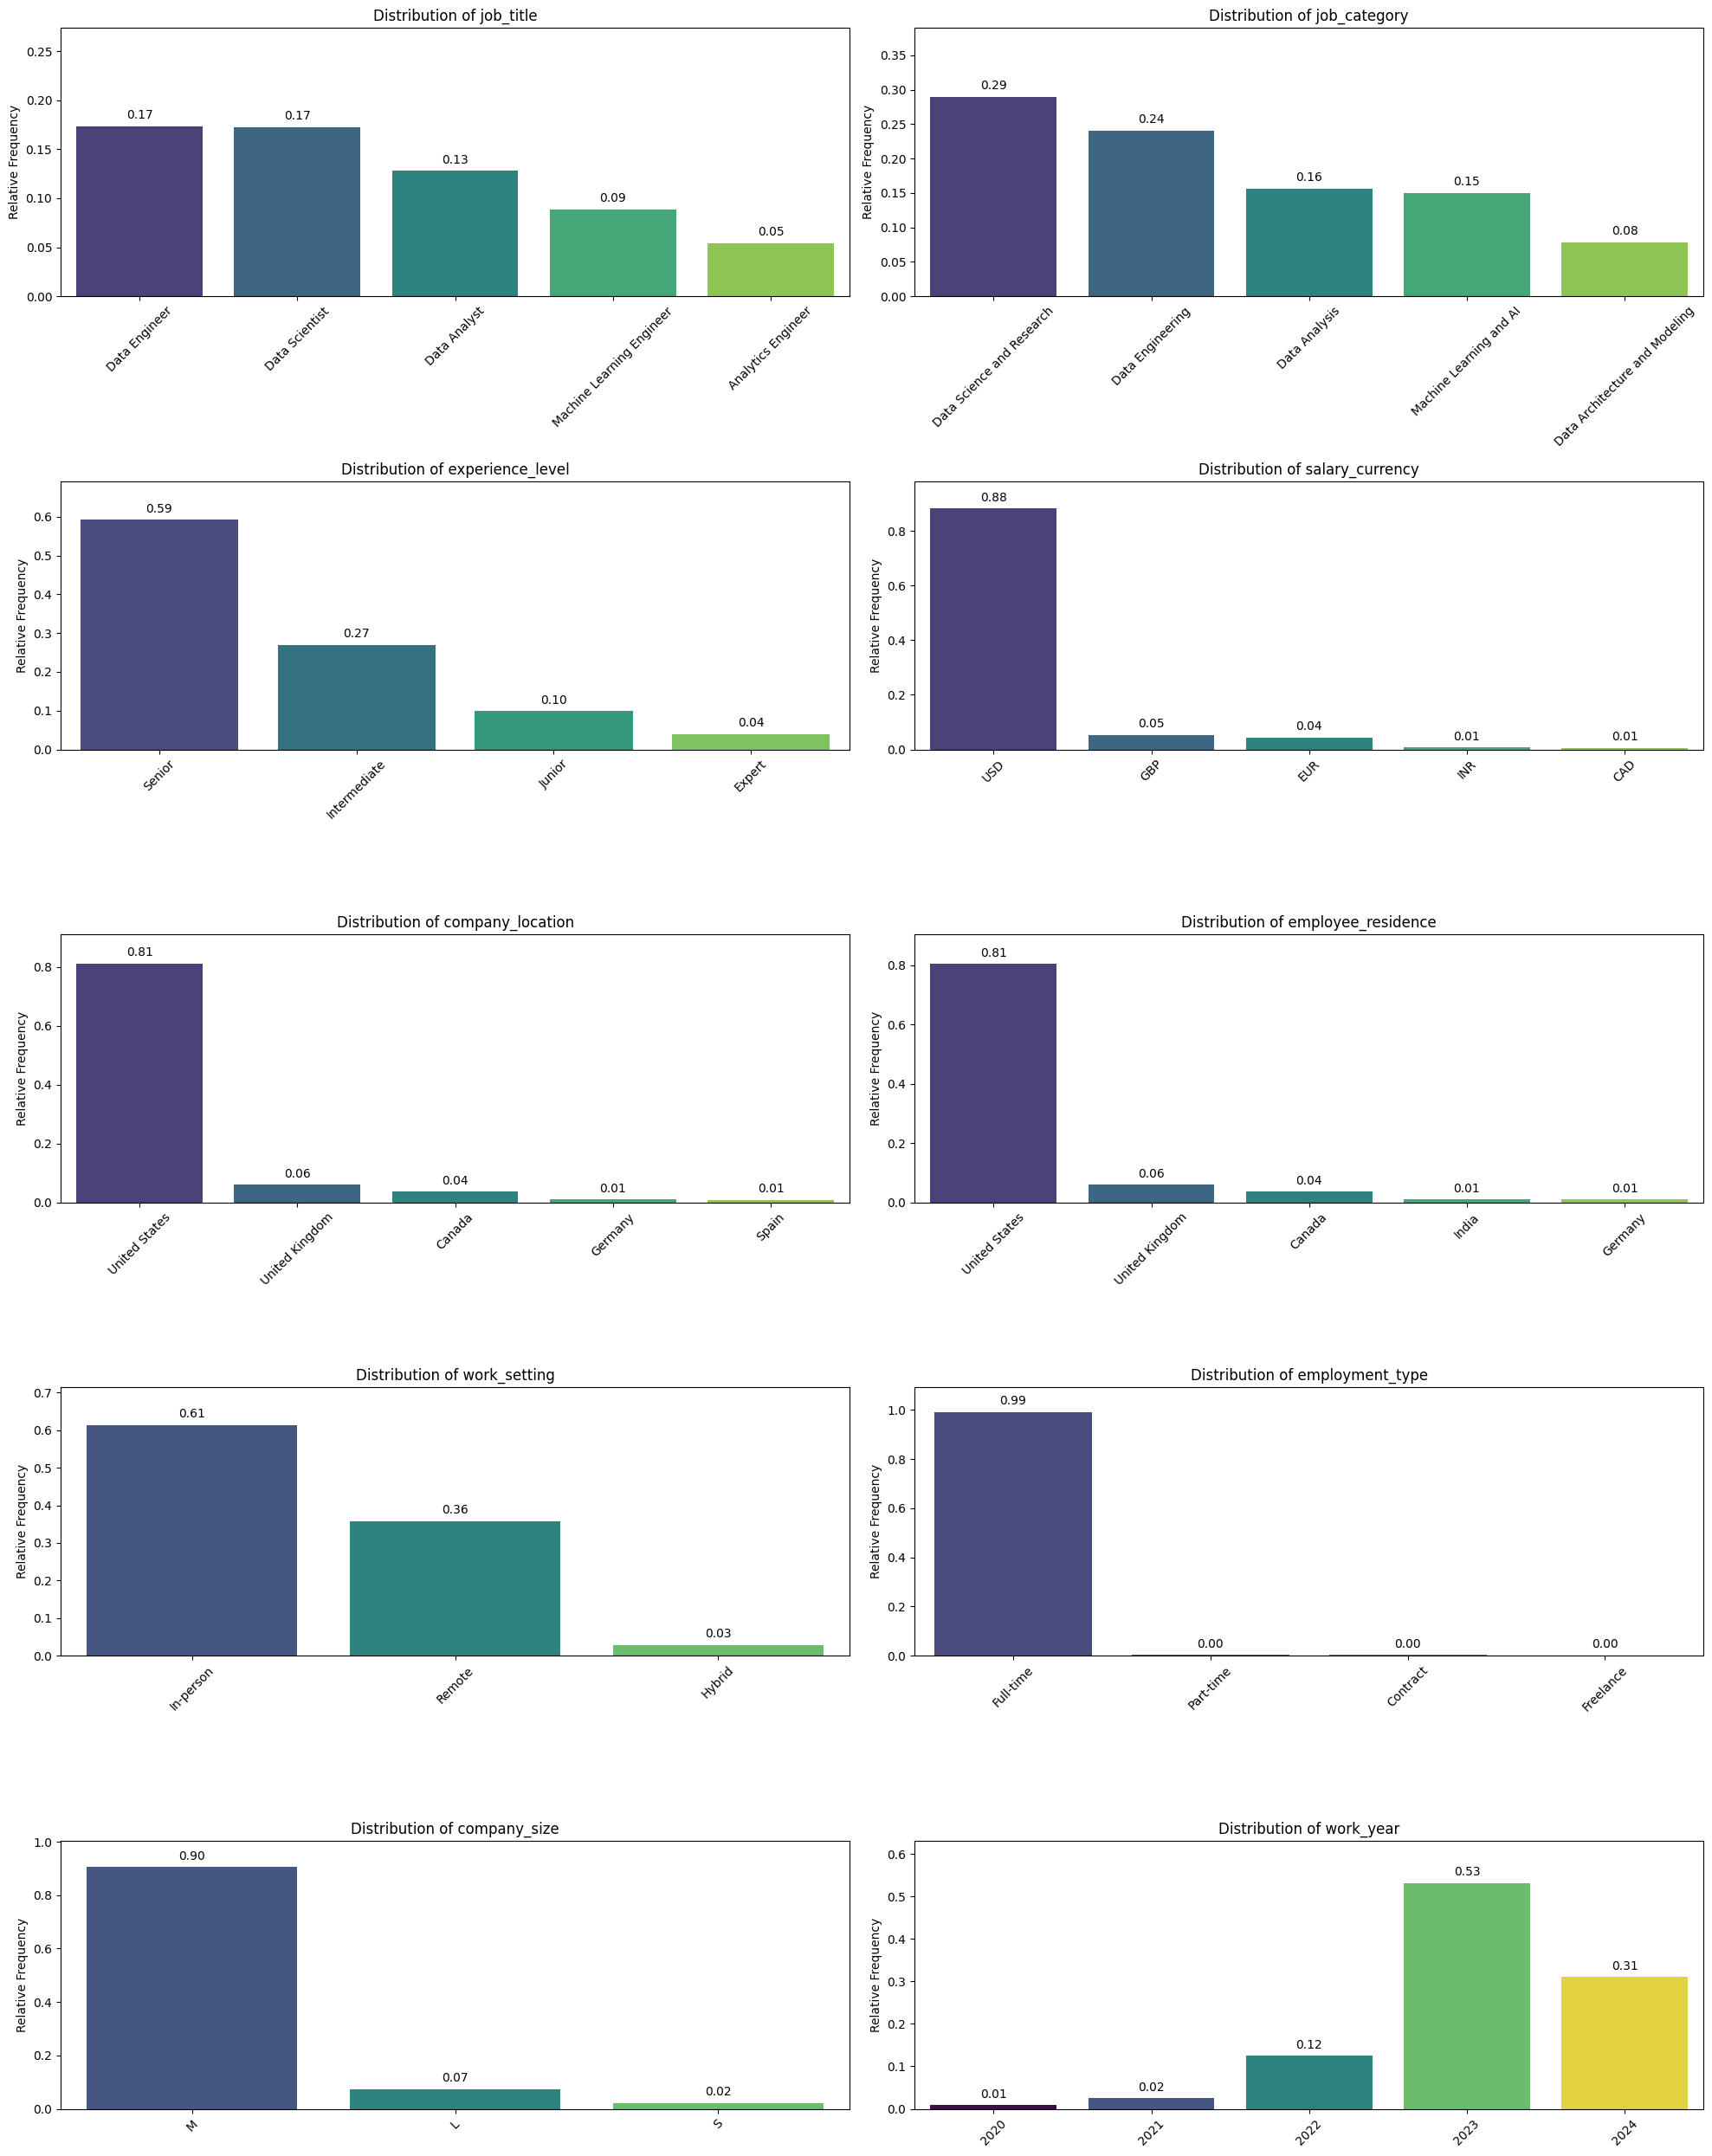

In [150]:
dpf.plot_categorical_distribution(df_combined, cat_cols, relative = True, show_values = True, limit = 5)

<font color='grey'>

- The most in-demand profiles are **Data Engineers and Data Scientists with at least 5 years' experience** (Senior category).

- The country with the most job offers for the data environment is the **United States** (more than 80% of the job offers).

- The work is usually carried out **full-time and on-site**, followed by remote work, and leaving aside the hybrid method.

- The companies that most demand this profile of employees are **medium-sized (50 to 250 employees)** (90% of the offer are from medium-sized companies).

- The demand for this type of job has been growing exponentially since 2020. **Could events such as covid or the collapse of the Sillicon Valley Bank in 2023 have had something to do with this?**

</font>

(2,)


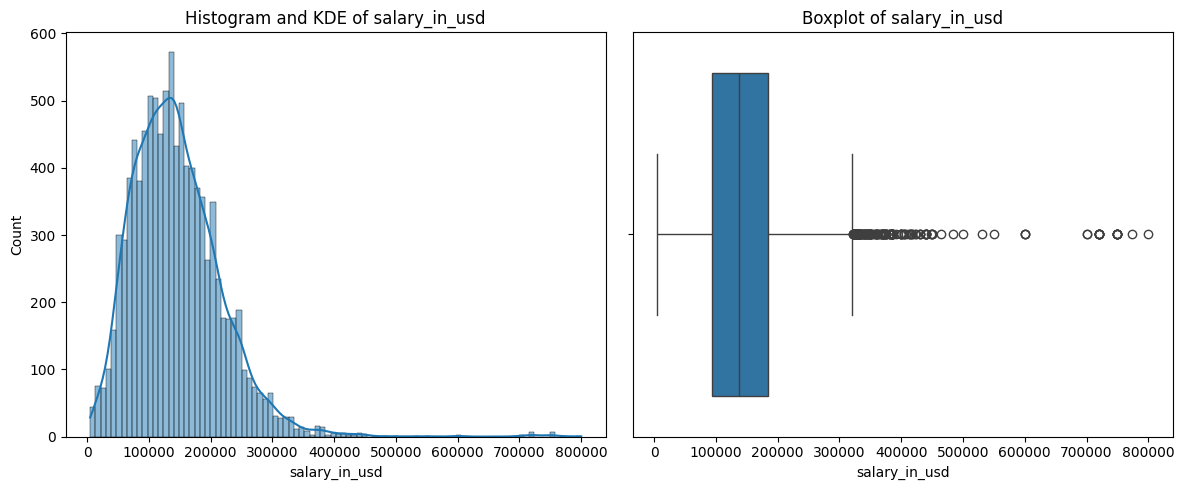

In [151]:
dpf.plot_combined_graphs(df_combined, ['salary_in_usd'])

##### - Treatment of outliers using the Winsorisation method 

In [152]:
from scipy.stats import mstats

# Define Winsorization limits
limits = [0.0, 0.02]  # 0% lower, as there are no outliers below and 2% higher.

# Apply Winsorization
df_combined['salary_in_usd_w'] = mstats.winsorize(df_combined['salary_in_usd'], limits = limits)

(2,)


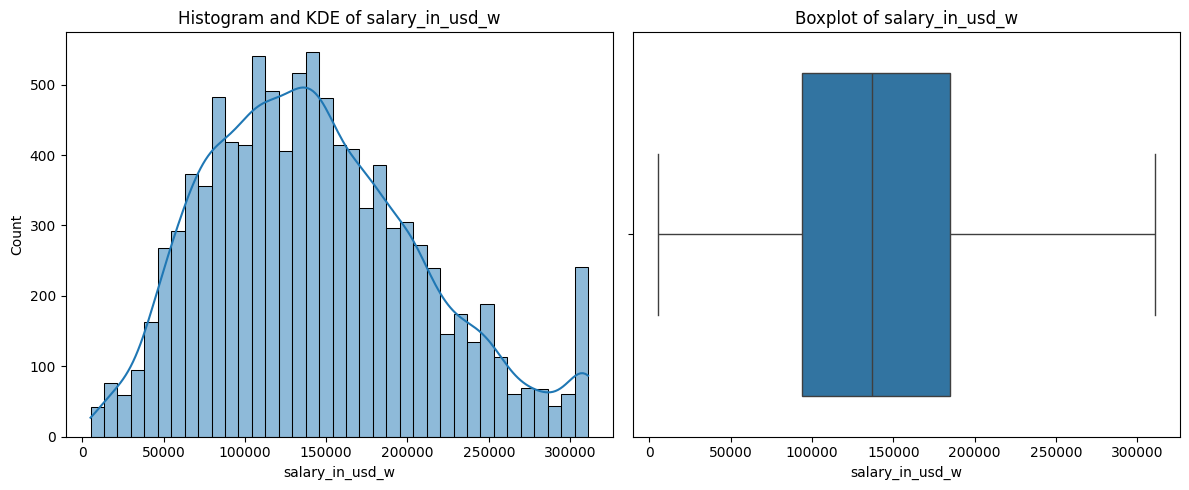

In [153]:
dpf.plot_combined_graphs(df_combined, ['salary_in_usd_w'])

<font color='yellow'>

- Most of the jobs pay between **$80k and $180k per year**.

</font>

### 1.2.3. Bivariate analysis

#### 1.2.3.1. Analysis according to salary

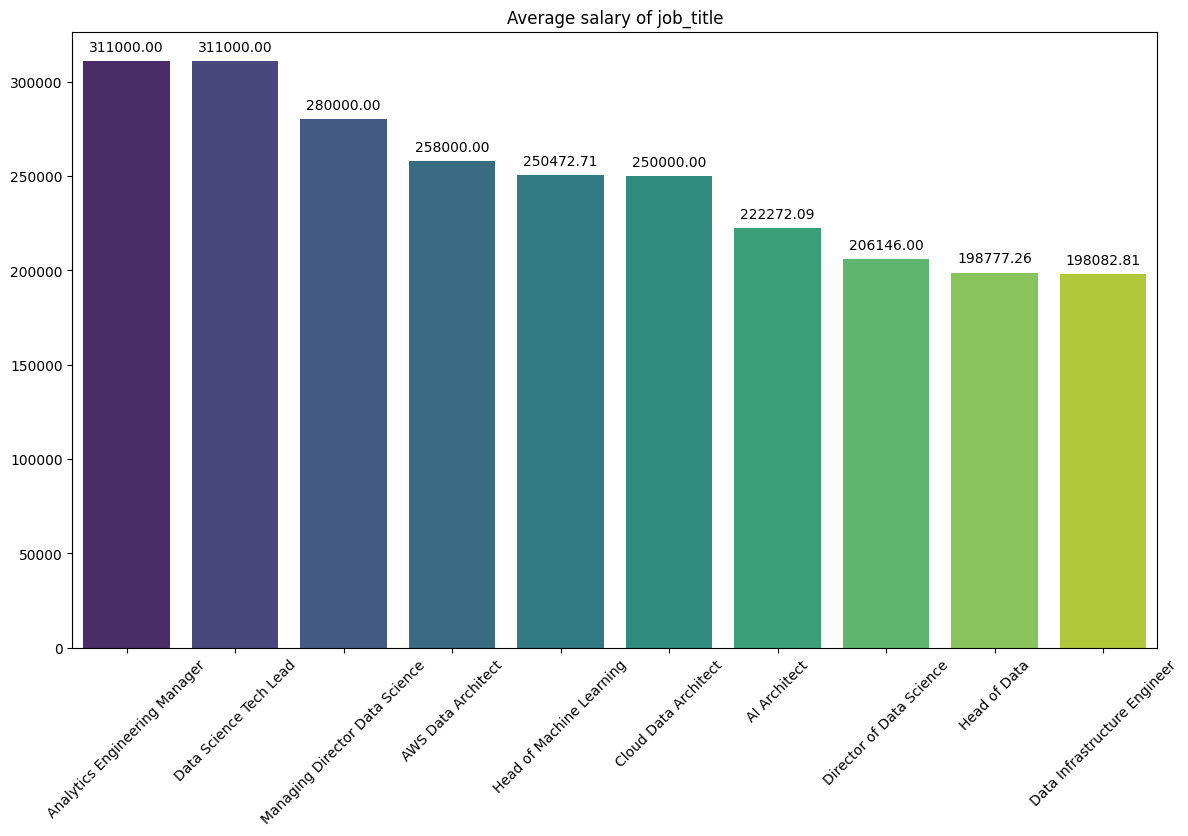

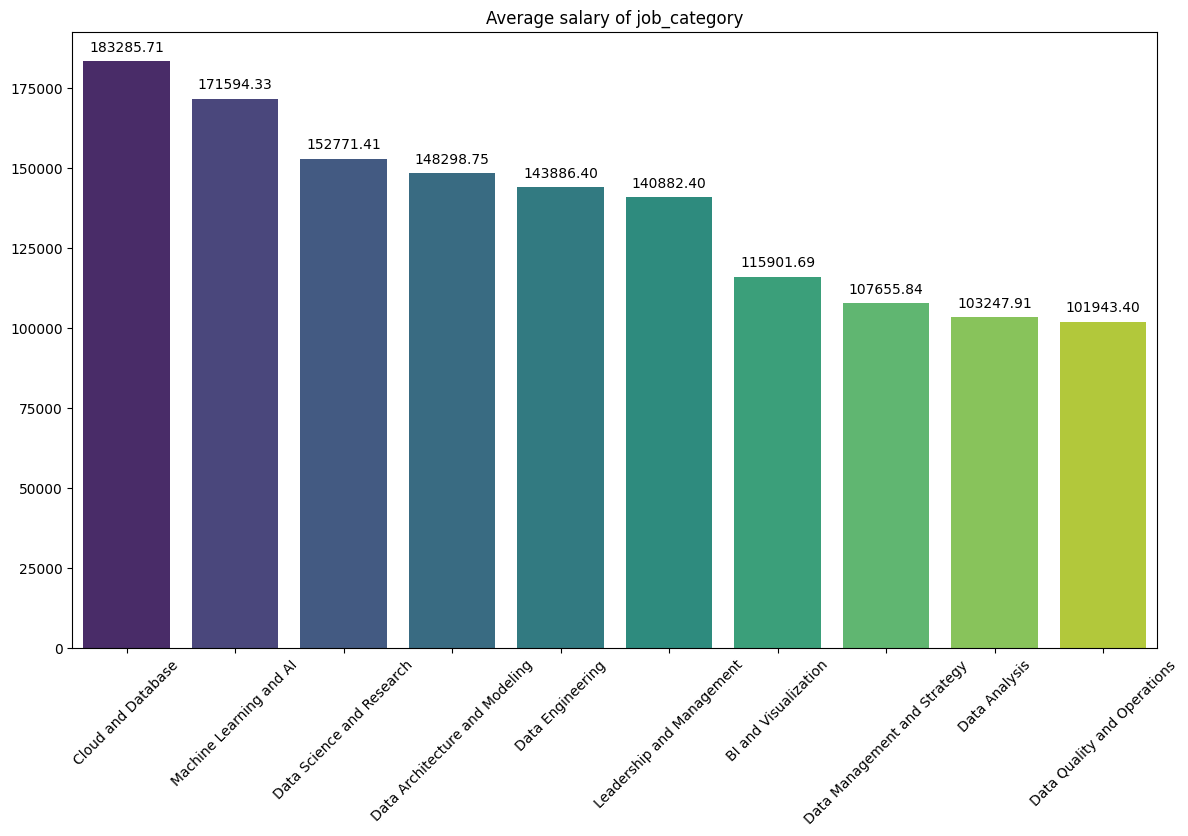

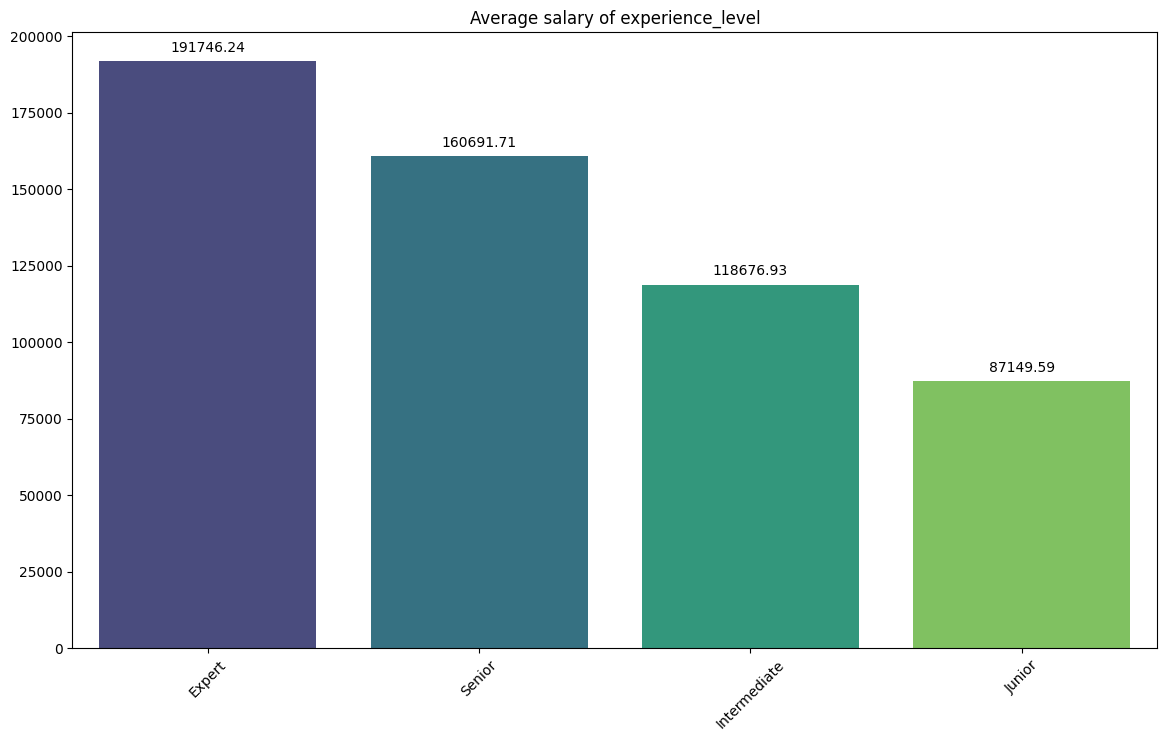

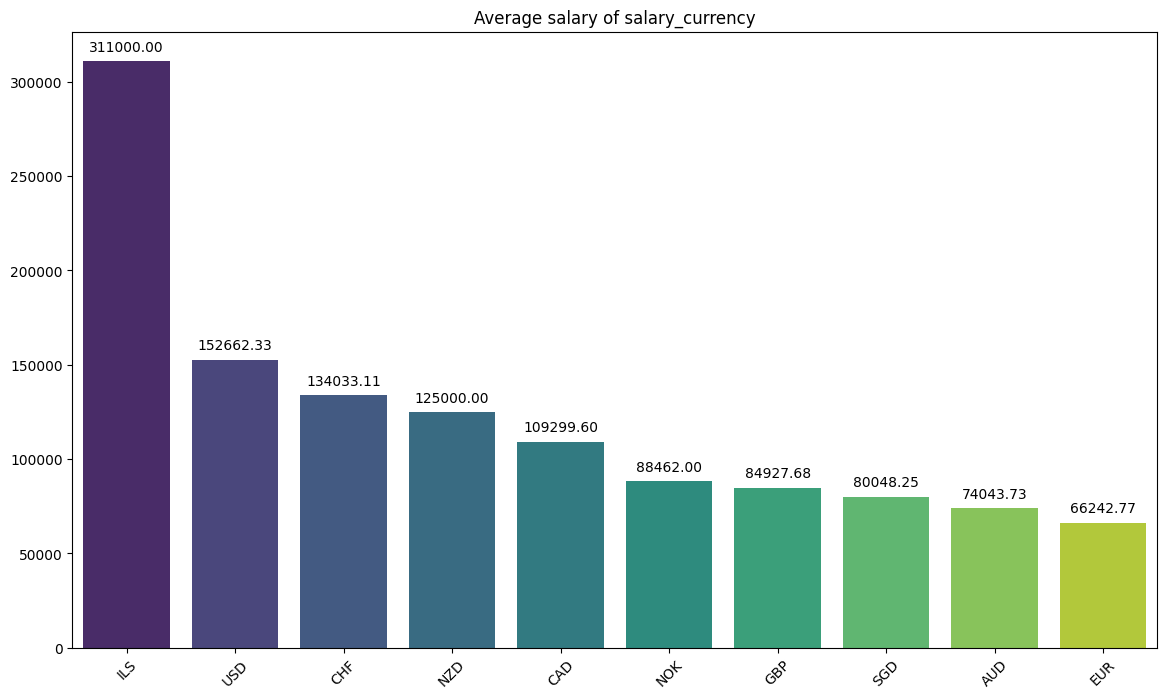

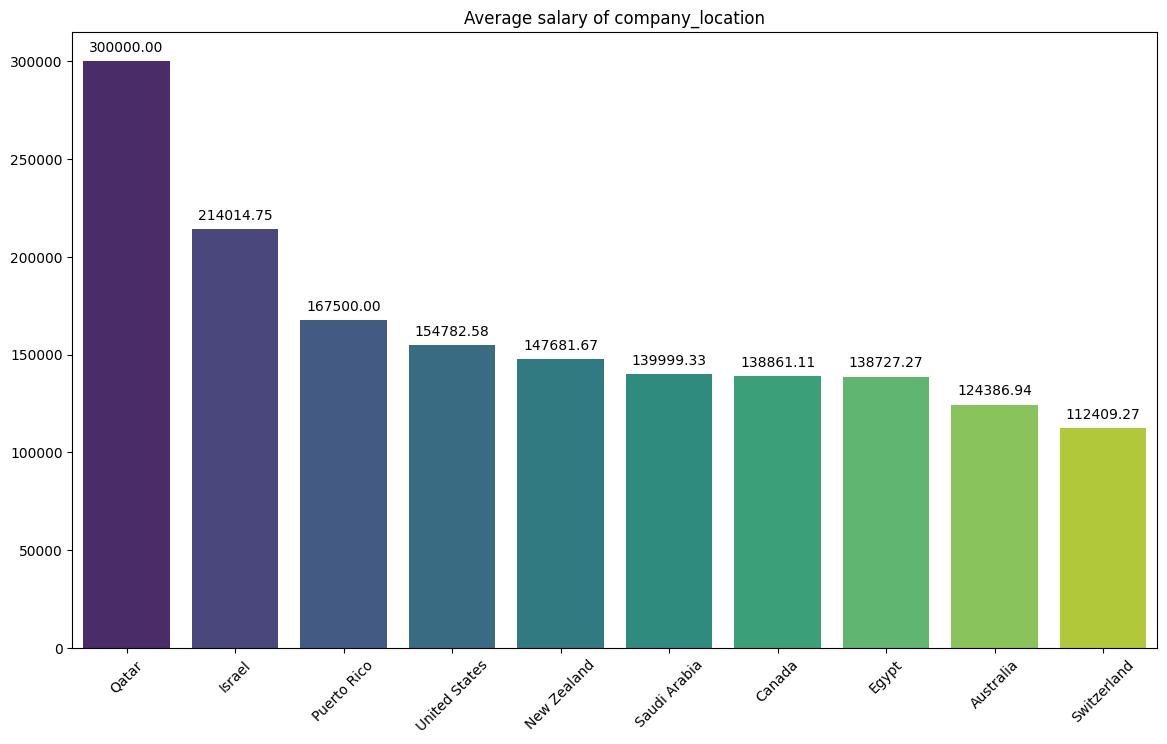

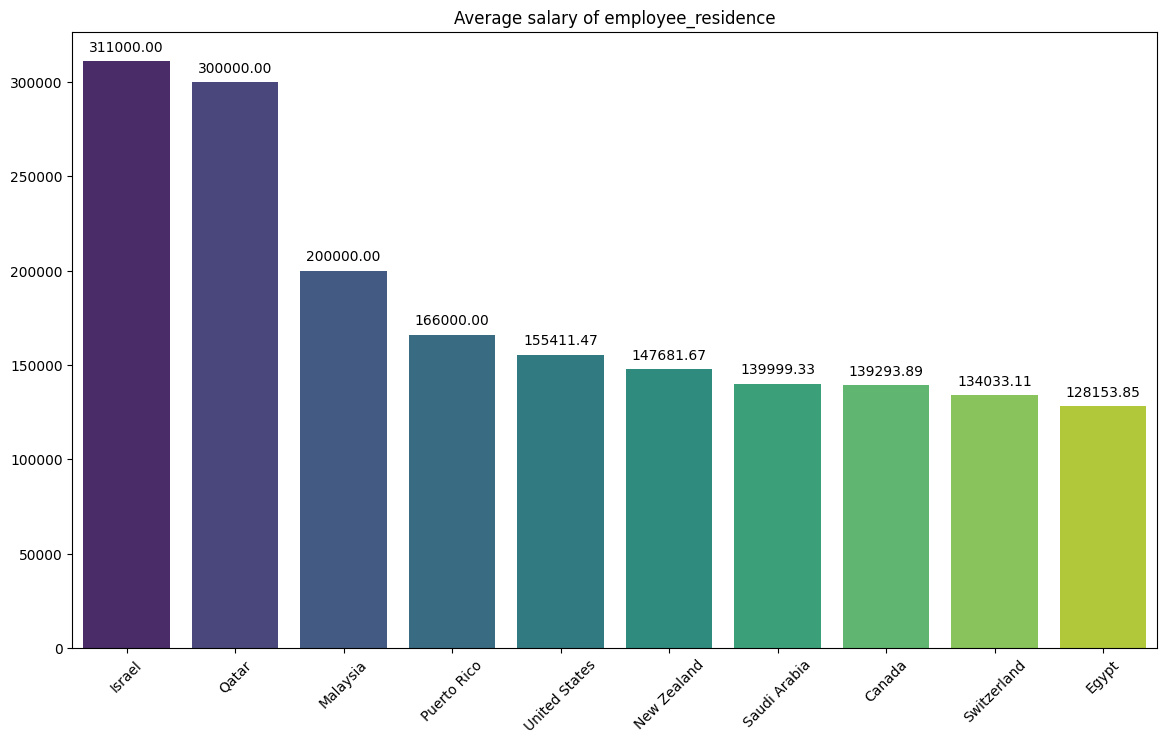

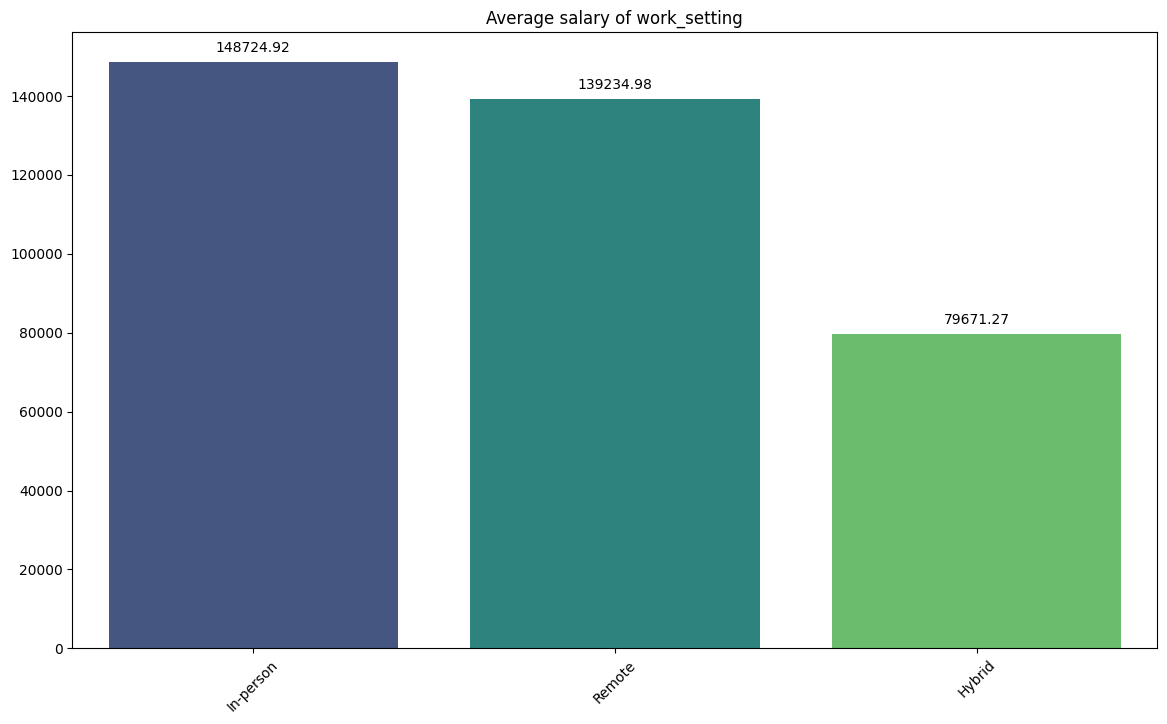

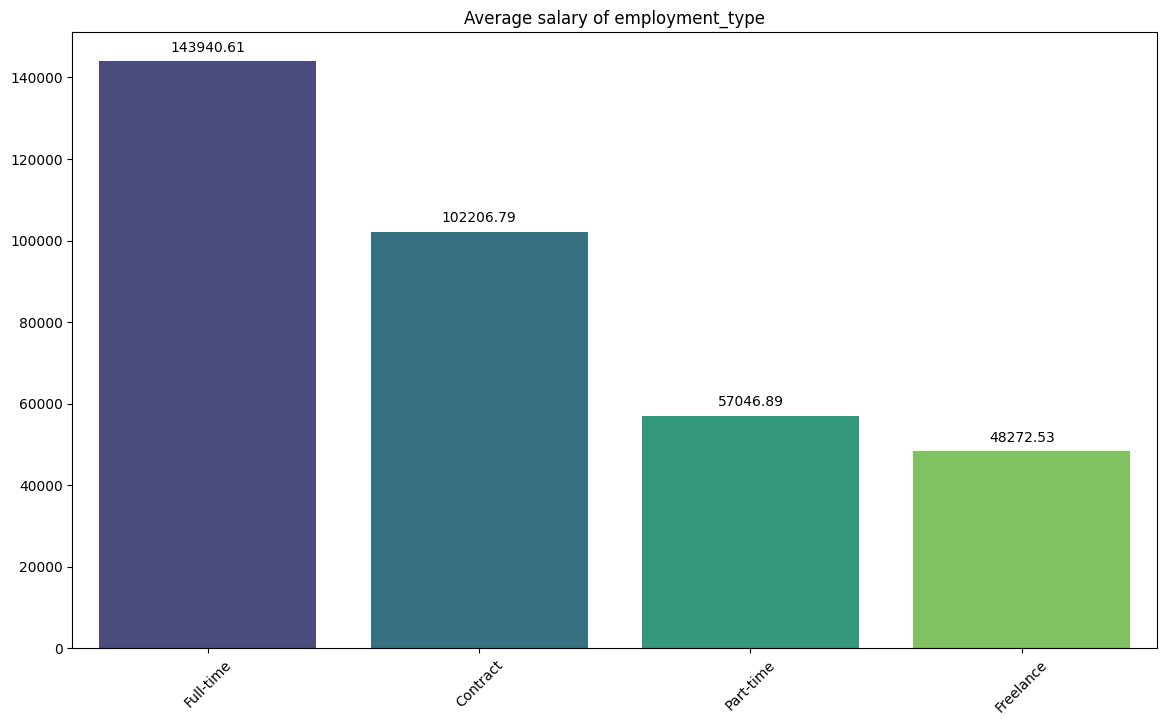

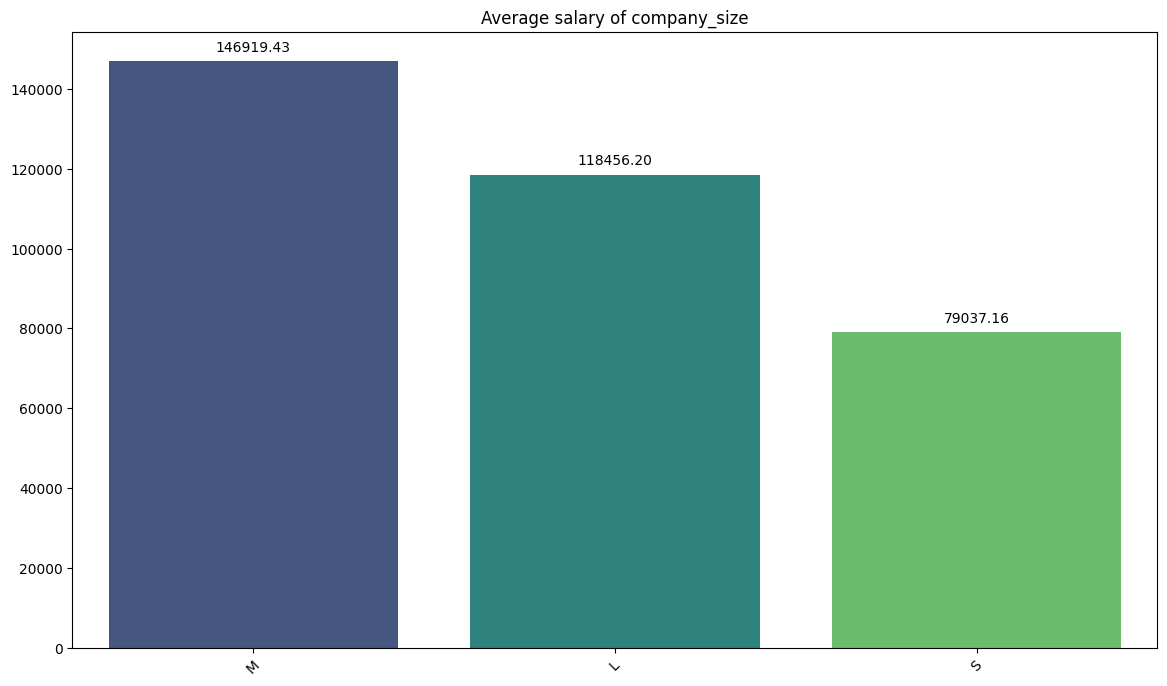

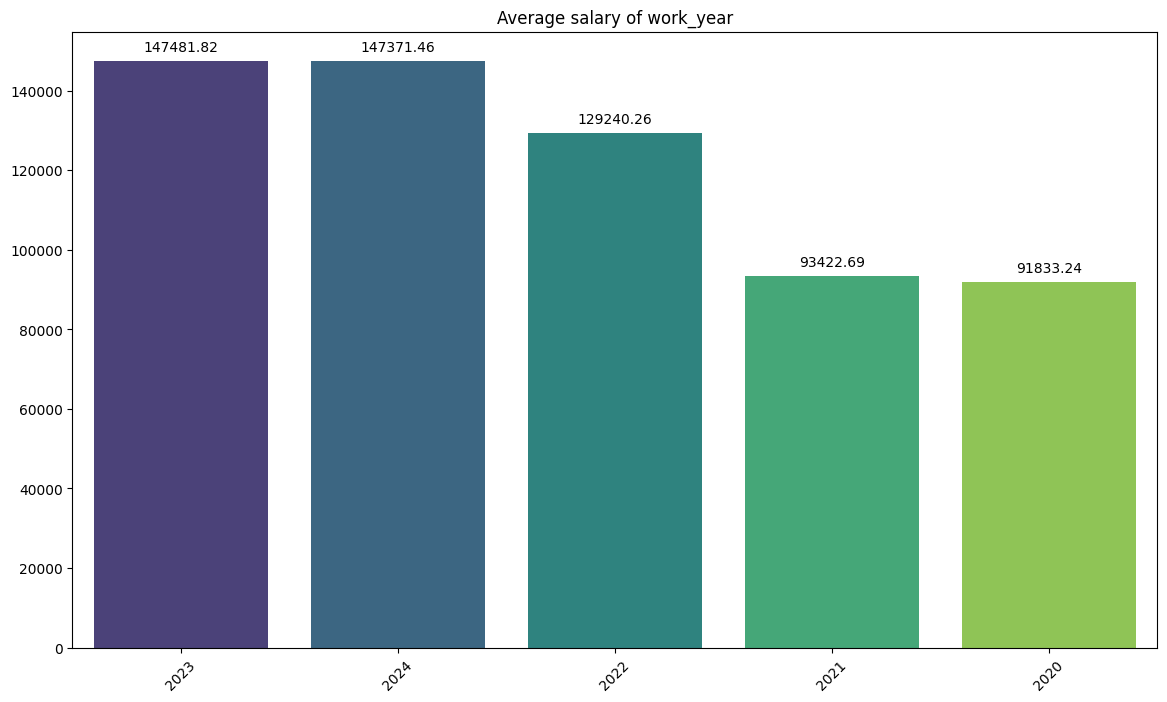

In [154]:
# Calculates the order of the categories based on the average of a specific numeric column.
def mean_order(data, col, num_col):
    return data.groupby(col)[num_col].mean().sort_values(ascending = False).index[:10]

dpf.plot_bar_with_values(data = df_combined, cat_cols = cat_cols, num_col = 'salary_in_usd_w', title = 'Average salary of {}', order_func = mean_order);

<font color='yellow'>

- The highest average salary is paid to **Analytical Engineering Managers in the Cloud and Database branch with more than 10 years of experience** (Experts).

- The highest salary is paid in Israeli New Sherkel (ILS), which does not give us much information, as 1 ILS is equivalent to $0.28. The comparison we are really interested in is in the same currency.

- The countries with the highest salaries are **Qatar and Israel** (around $300k), followed by Puerto Rico, the United States and New Zealand ($155k approx).

- The highest paid employees **live in Israel**, who outstrip those in Qatar and Malaysia by a wide margin.

- Employees who work in **100% face-to-face or 100% hybrid work have a significantly higher salary** than those in a hybrid type of work.

- The best paid jobs are **full-time, and the worst paid are freelance**.

- **Medium-sized** companies pay the best.

- **Salary has increased by almost 60% from 2020 to today**.

</font>

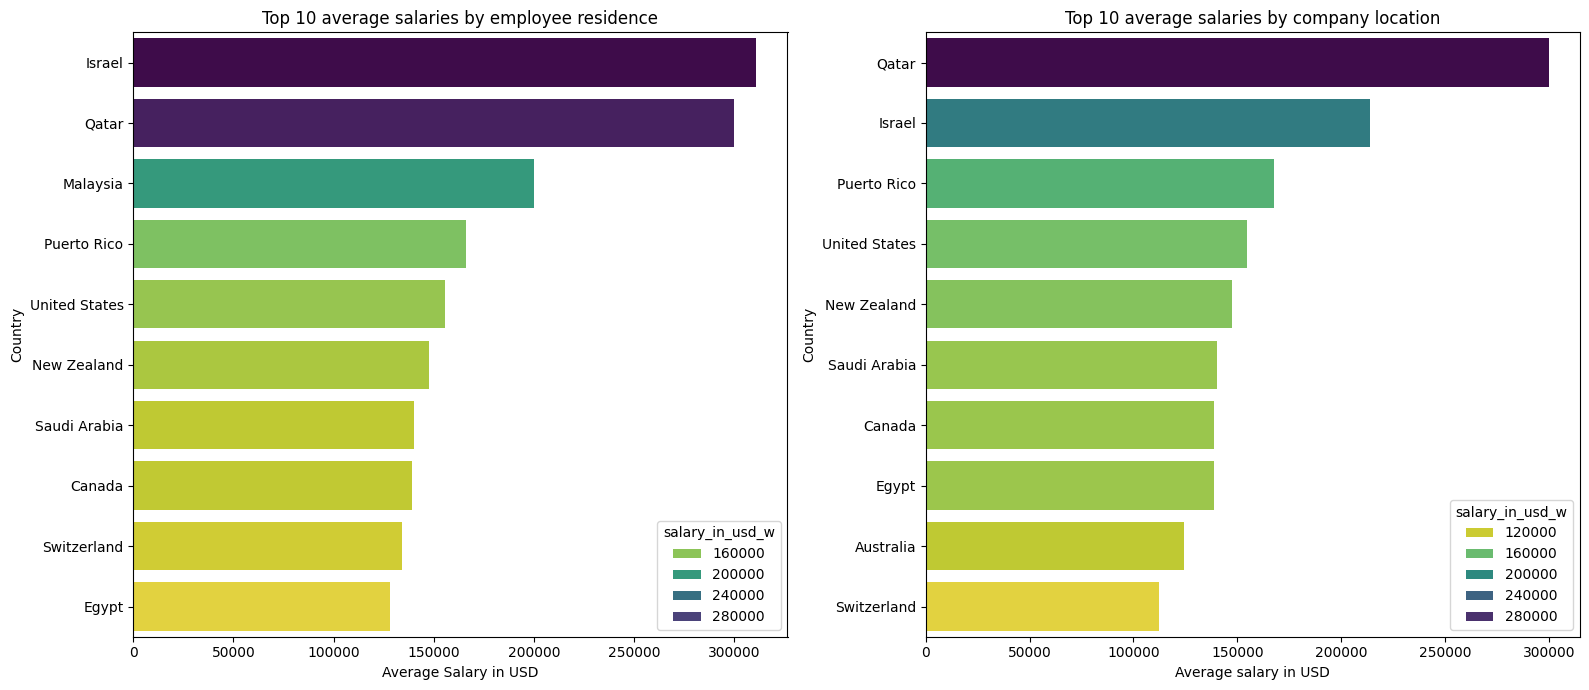

In [155]:
# Calculate the average salary by employee residence, filter for top 10 most common countries
top_employee_residence_salaries = df_combined.groupby('employee_residence')['salary_in_usd_w'].mean().nlargest(10).sort_values(ascending = False)

# Calculate the average salary by company location, filter for top 10 most common locations
top_company_location_salaries = df_combined.groupby('company_location')['salary_in_usd_w'].mean().nlargest(10).sort_values(ascending = False)

# Display the results
top_employee_residence_salaries, top_company_location_salaries

palette = sns.color_palette("viridis", as_cmap = True).reversed()

# Plotting
plt.figure(figsize = (16, 7))

# Average Salary by Employee Residence
plt.subplot(1, 2, 1)
sns.barplot(x = top_employee_residence_salaries.values, y = top_employee_residence_salaries.index, hue = top_employee_residence_salaries, palette = palette)
plt.title('Top 10 average salaries by employee residence')
plt.xlabel('Average Salary in USD')
plt.ylabel('Country')

# Average Salary by Company Location
plt.subplot(1, 2, 2)
sns.barplot(x = top_company_location_salaries.values, y = top_company_location_salaries.index, hue = top_company_location_salaries, palette = palette)
plt.title('Top 10 average salaries by company location')
plt.xlabel('Average salary in USD')
plt.ylabel('Country')

plt.tight_layout()


<font color='yellow'>

- The **10 countries with the highest number of companies** demanding these jobs **do not coincide** with the **10 countries with the highest number of employees** in these jobs.      

    - Is the employee's place of residence a factor that companies play on in order to pay them more or less?
    
    - Or is it the employees who move to live in a country where the cost of living is lower so that their salary appears to be higher?

</font>

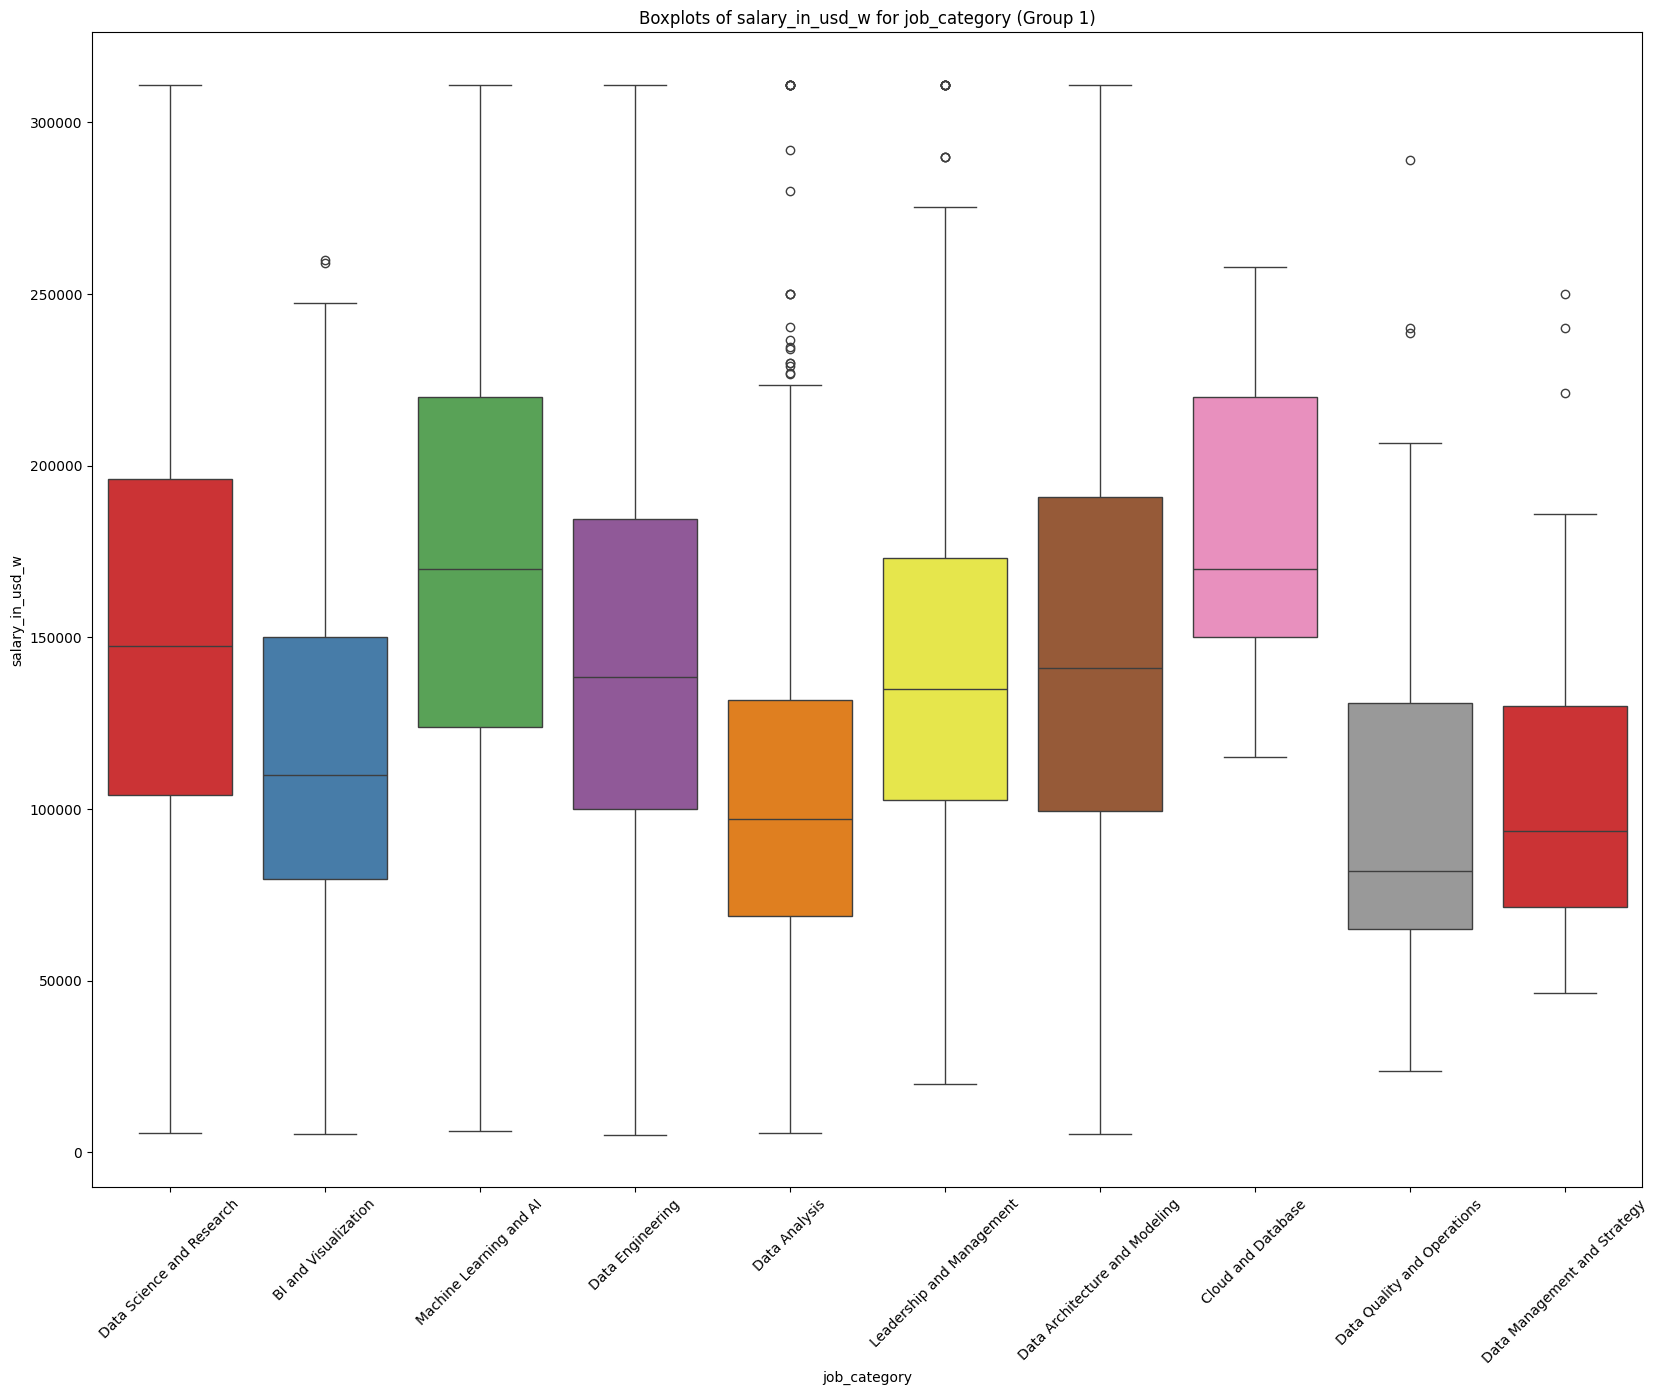

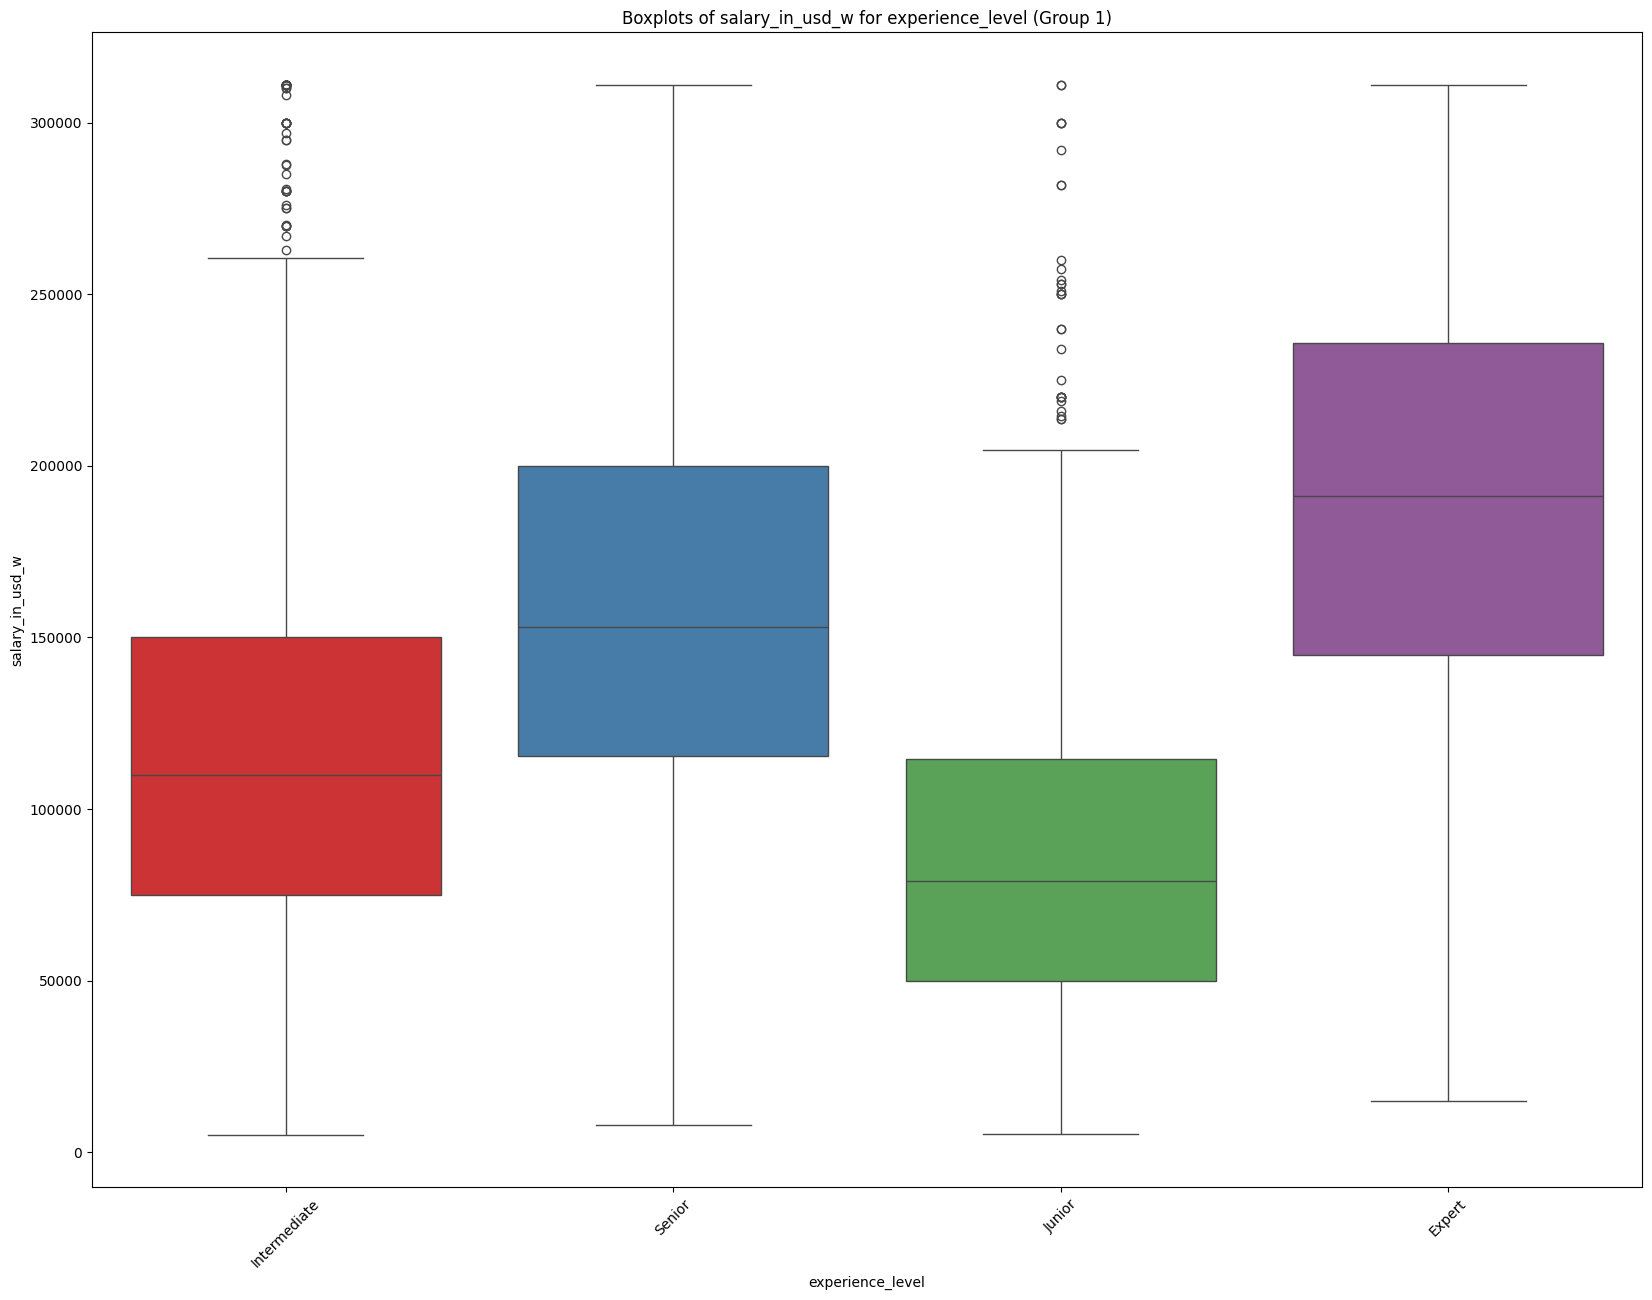

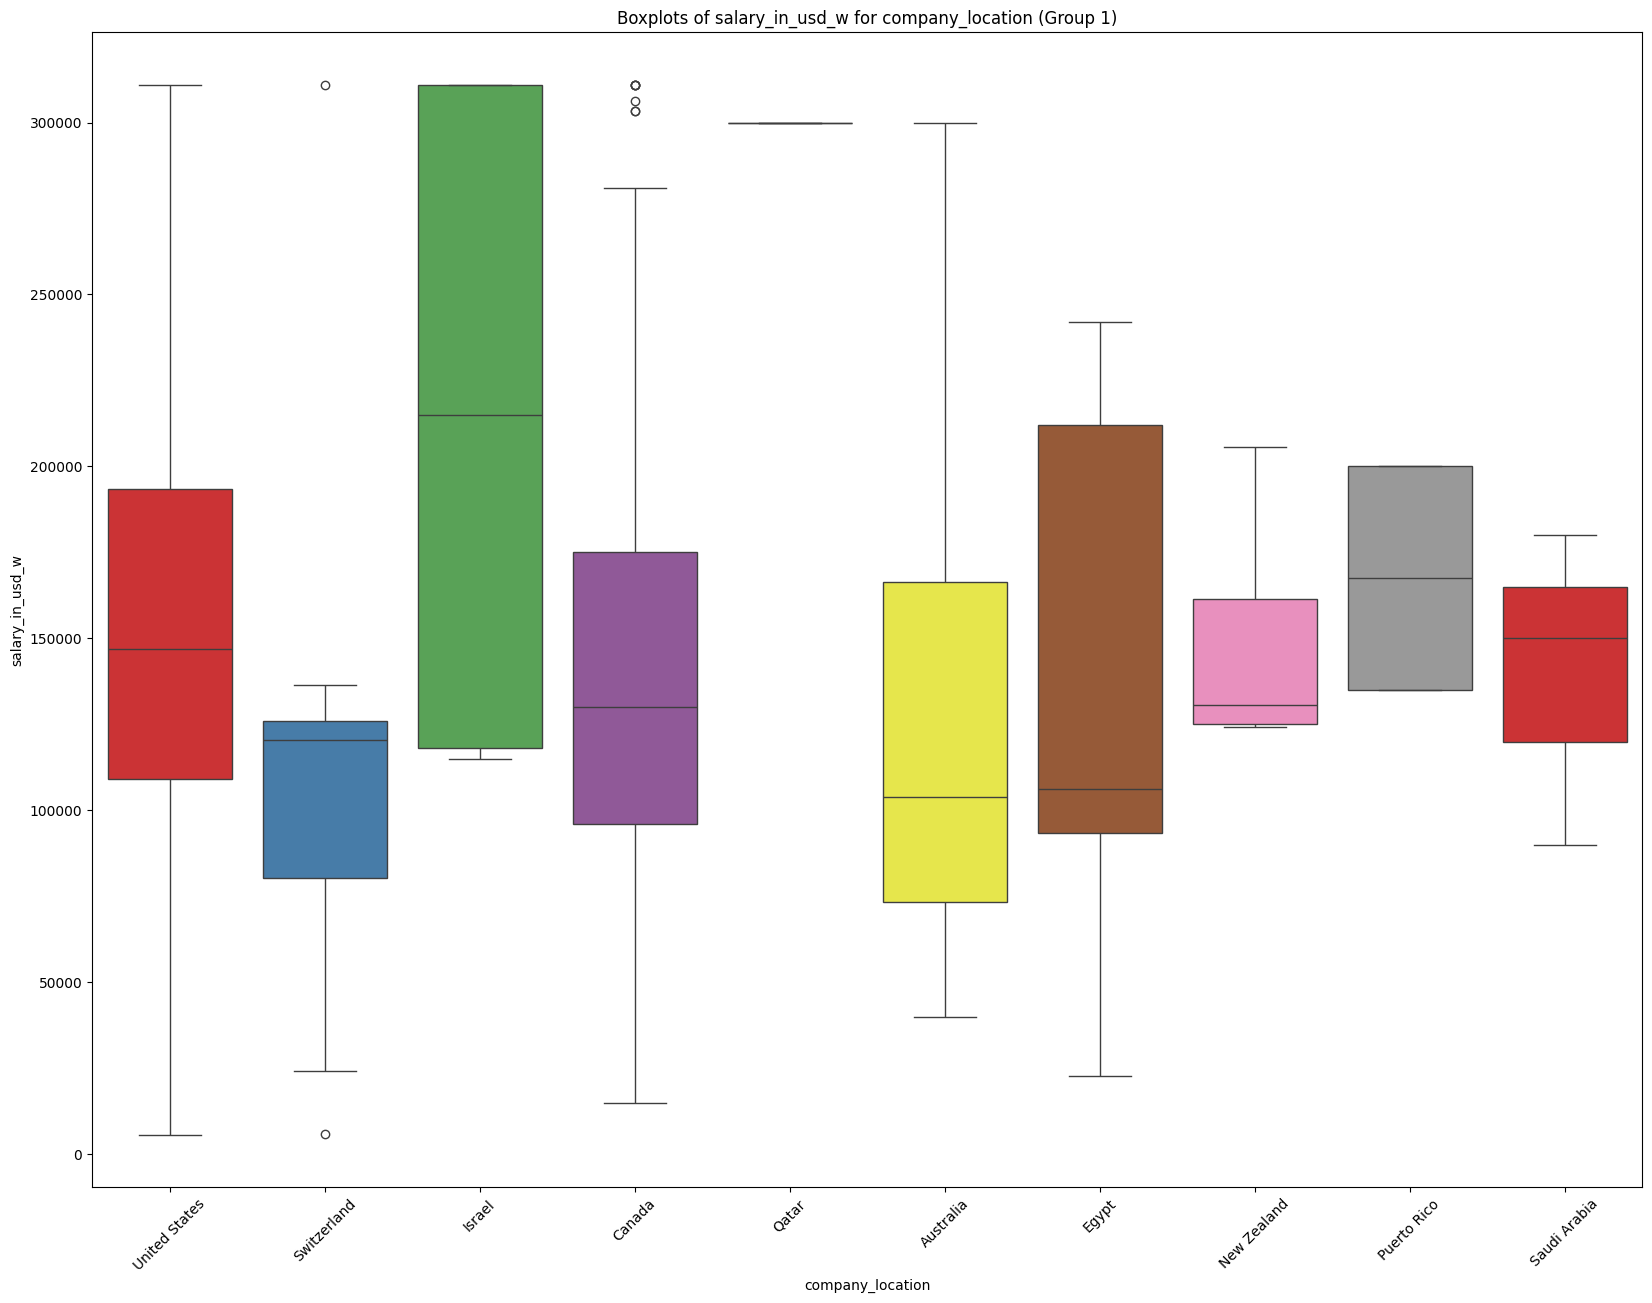

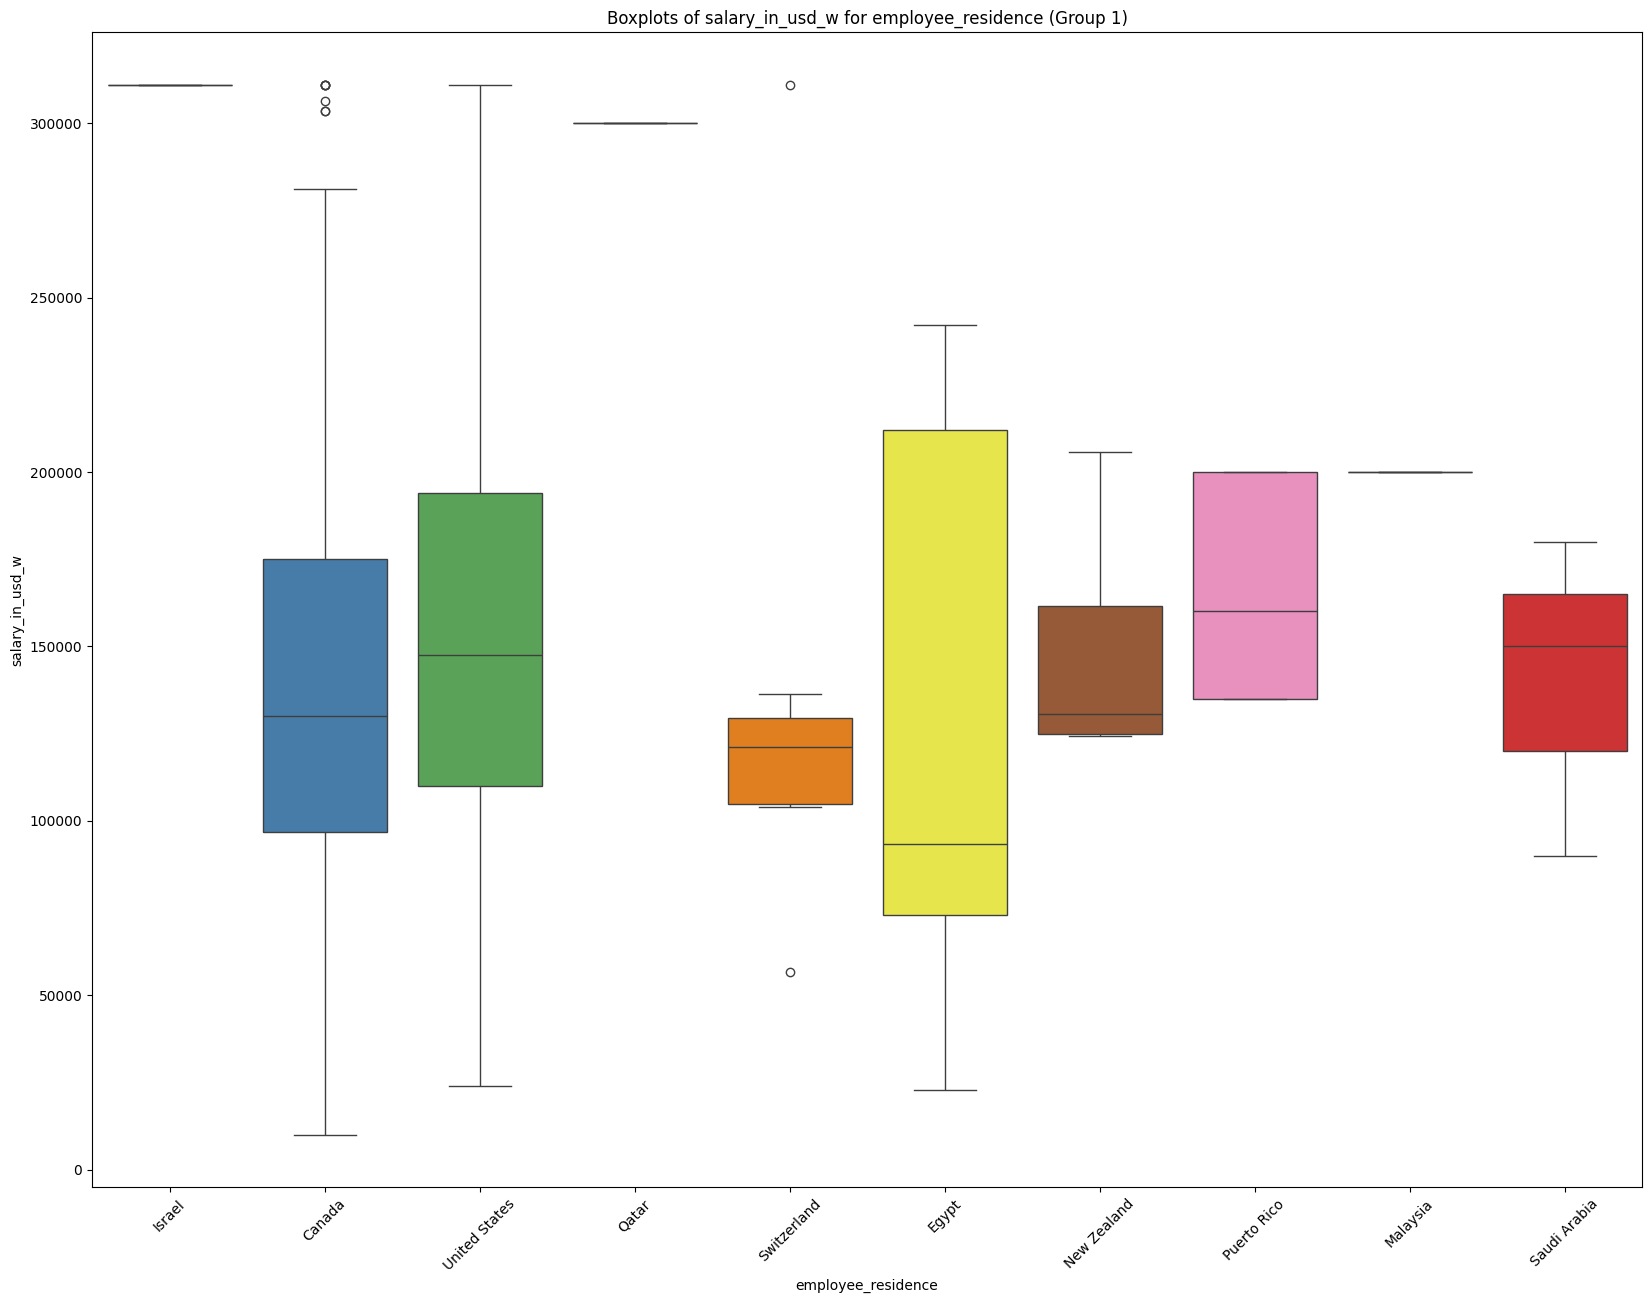

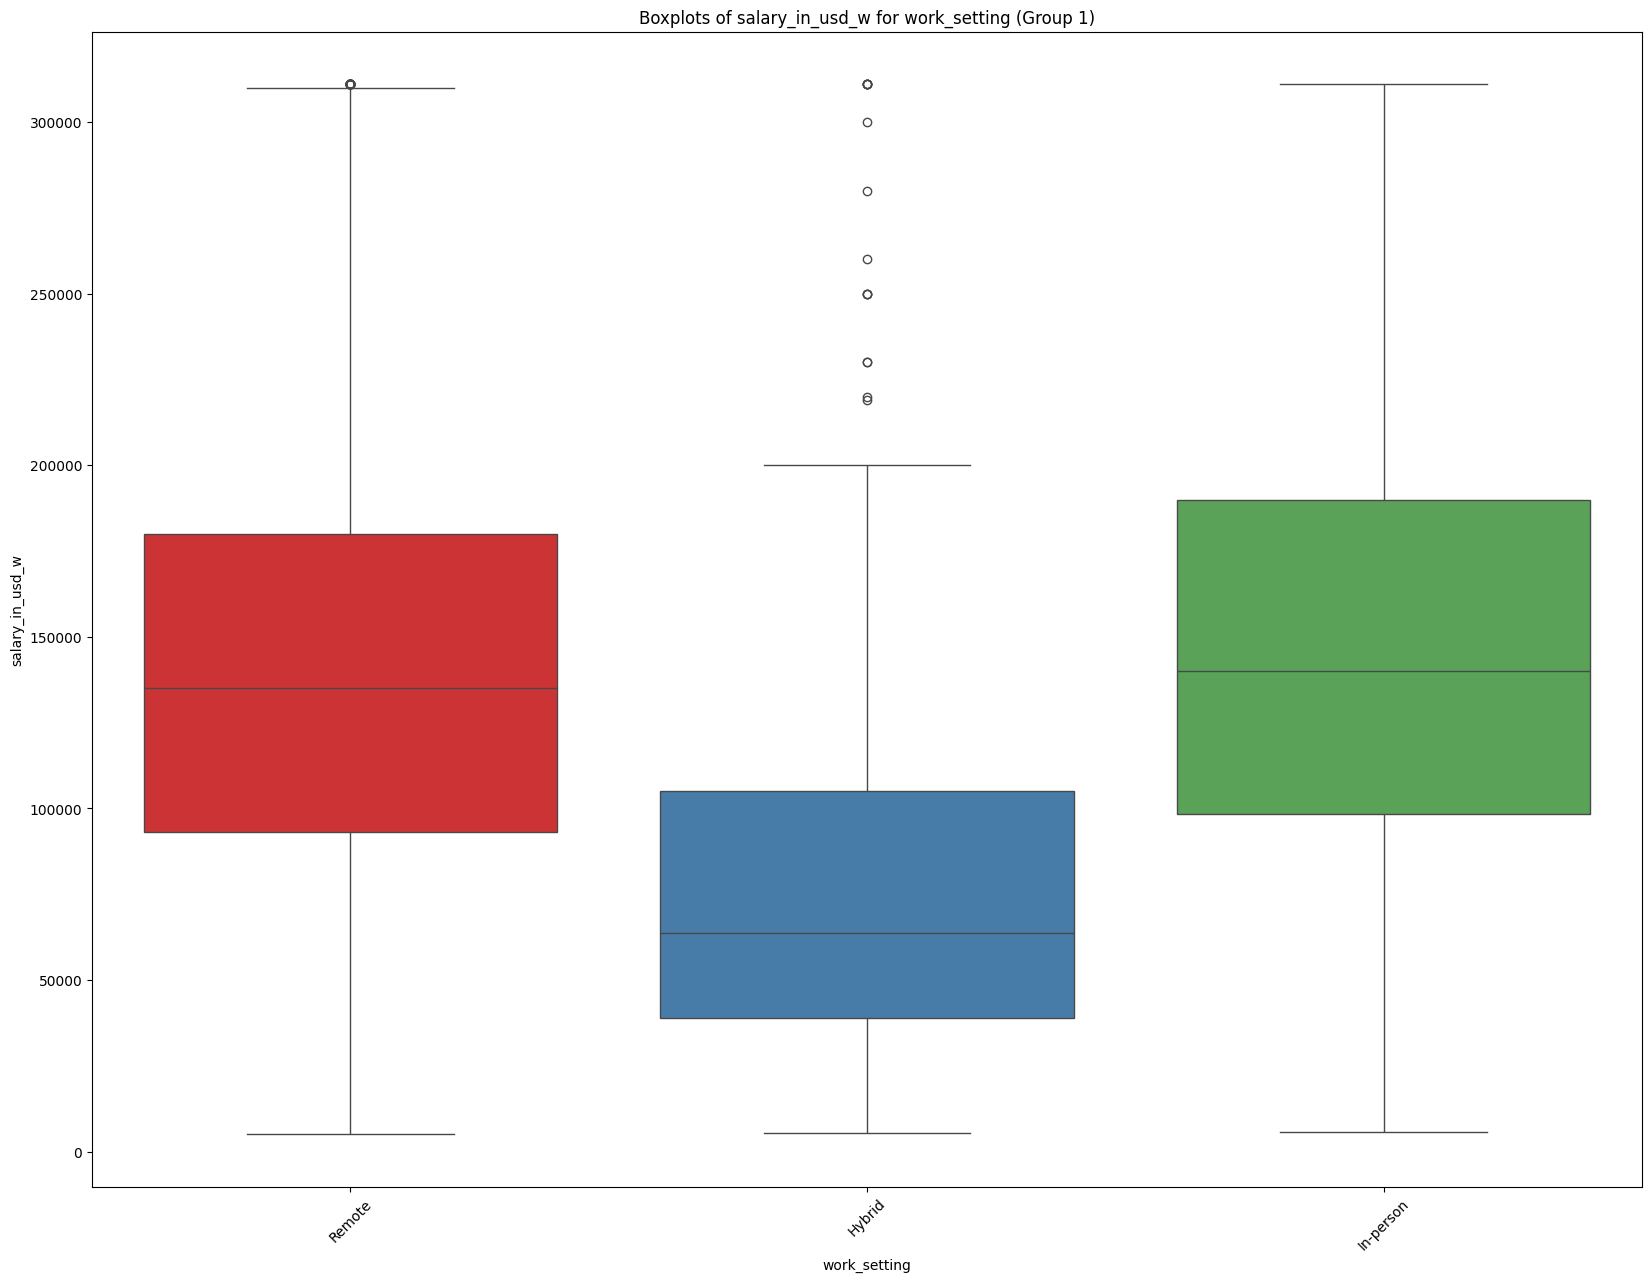

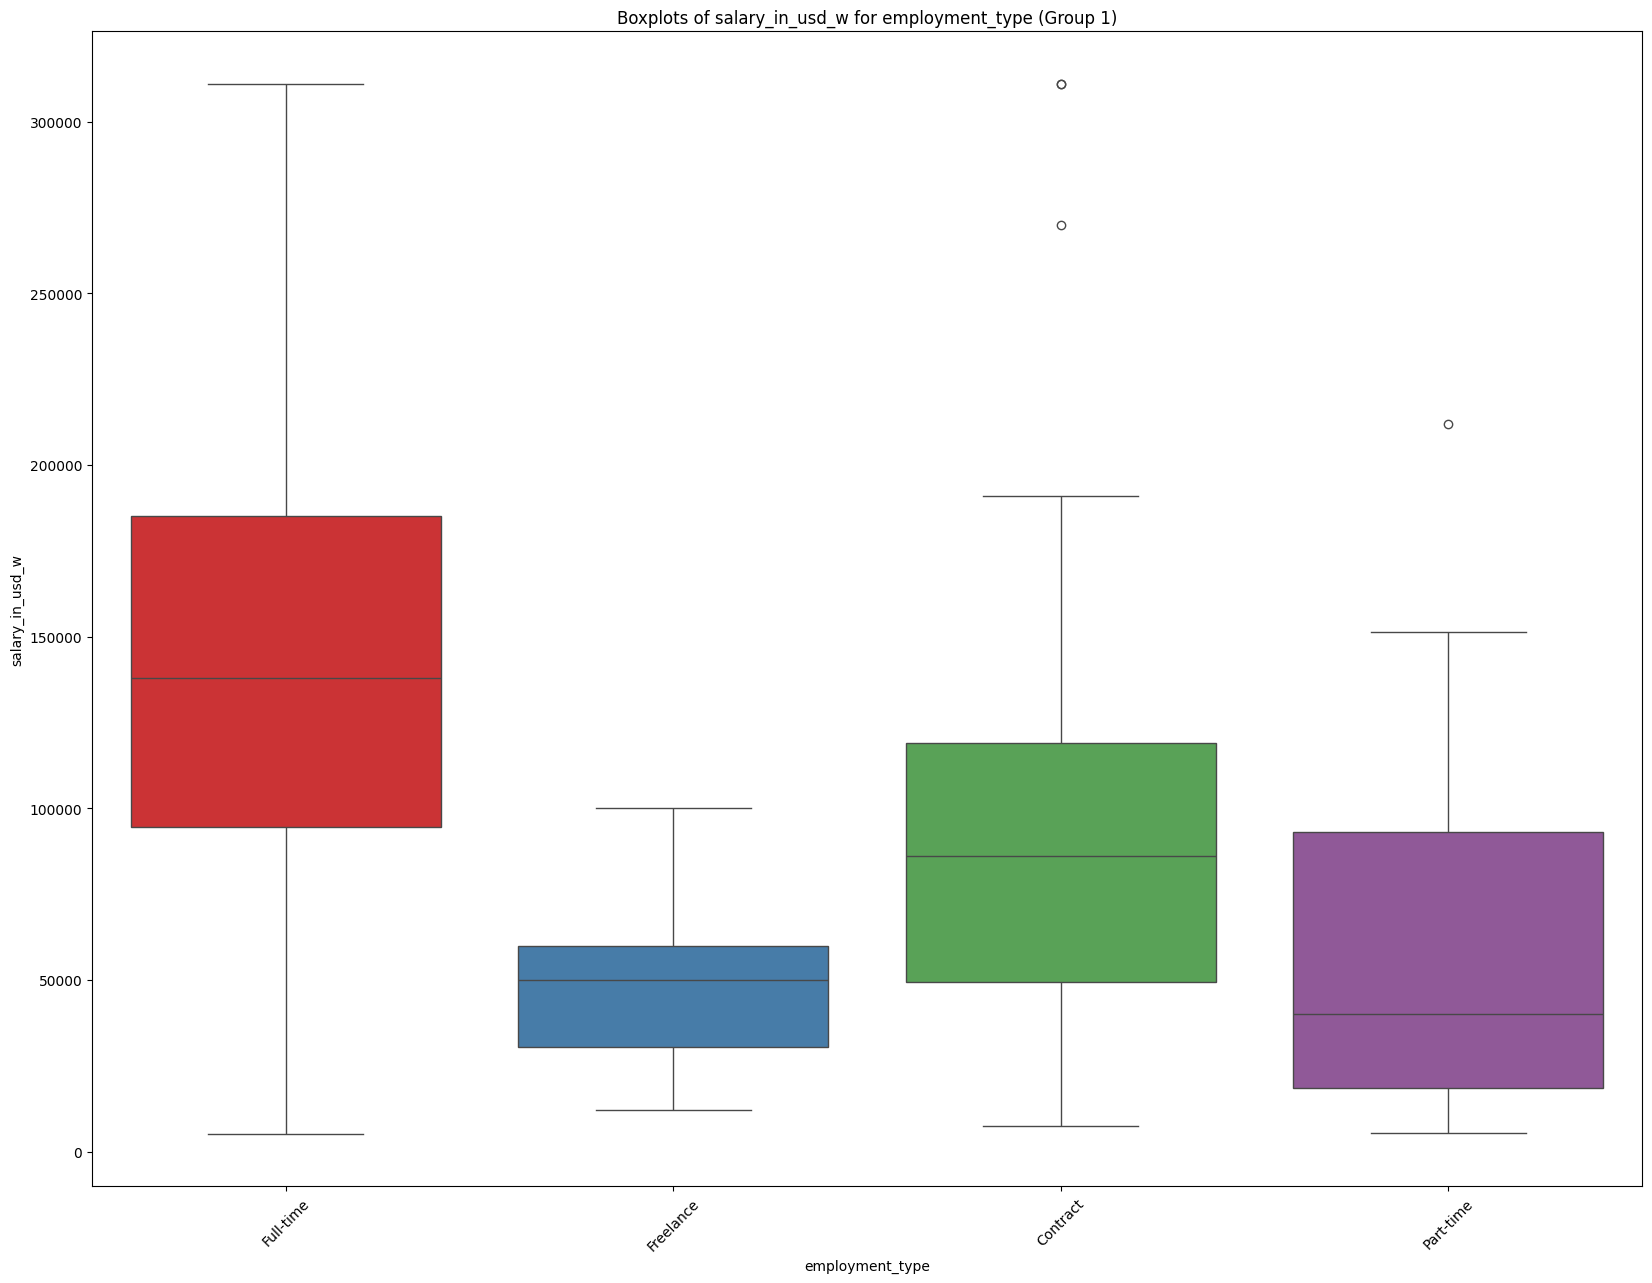

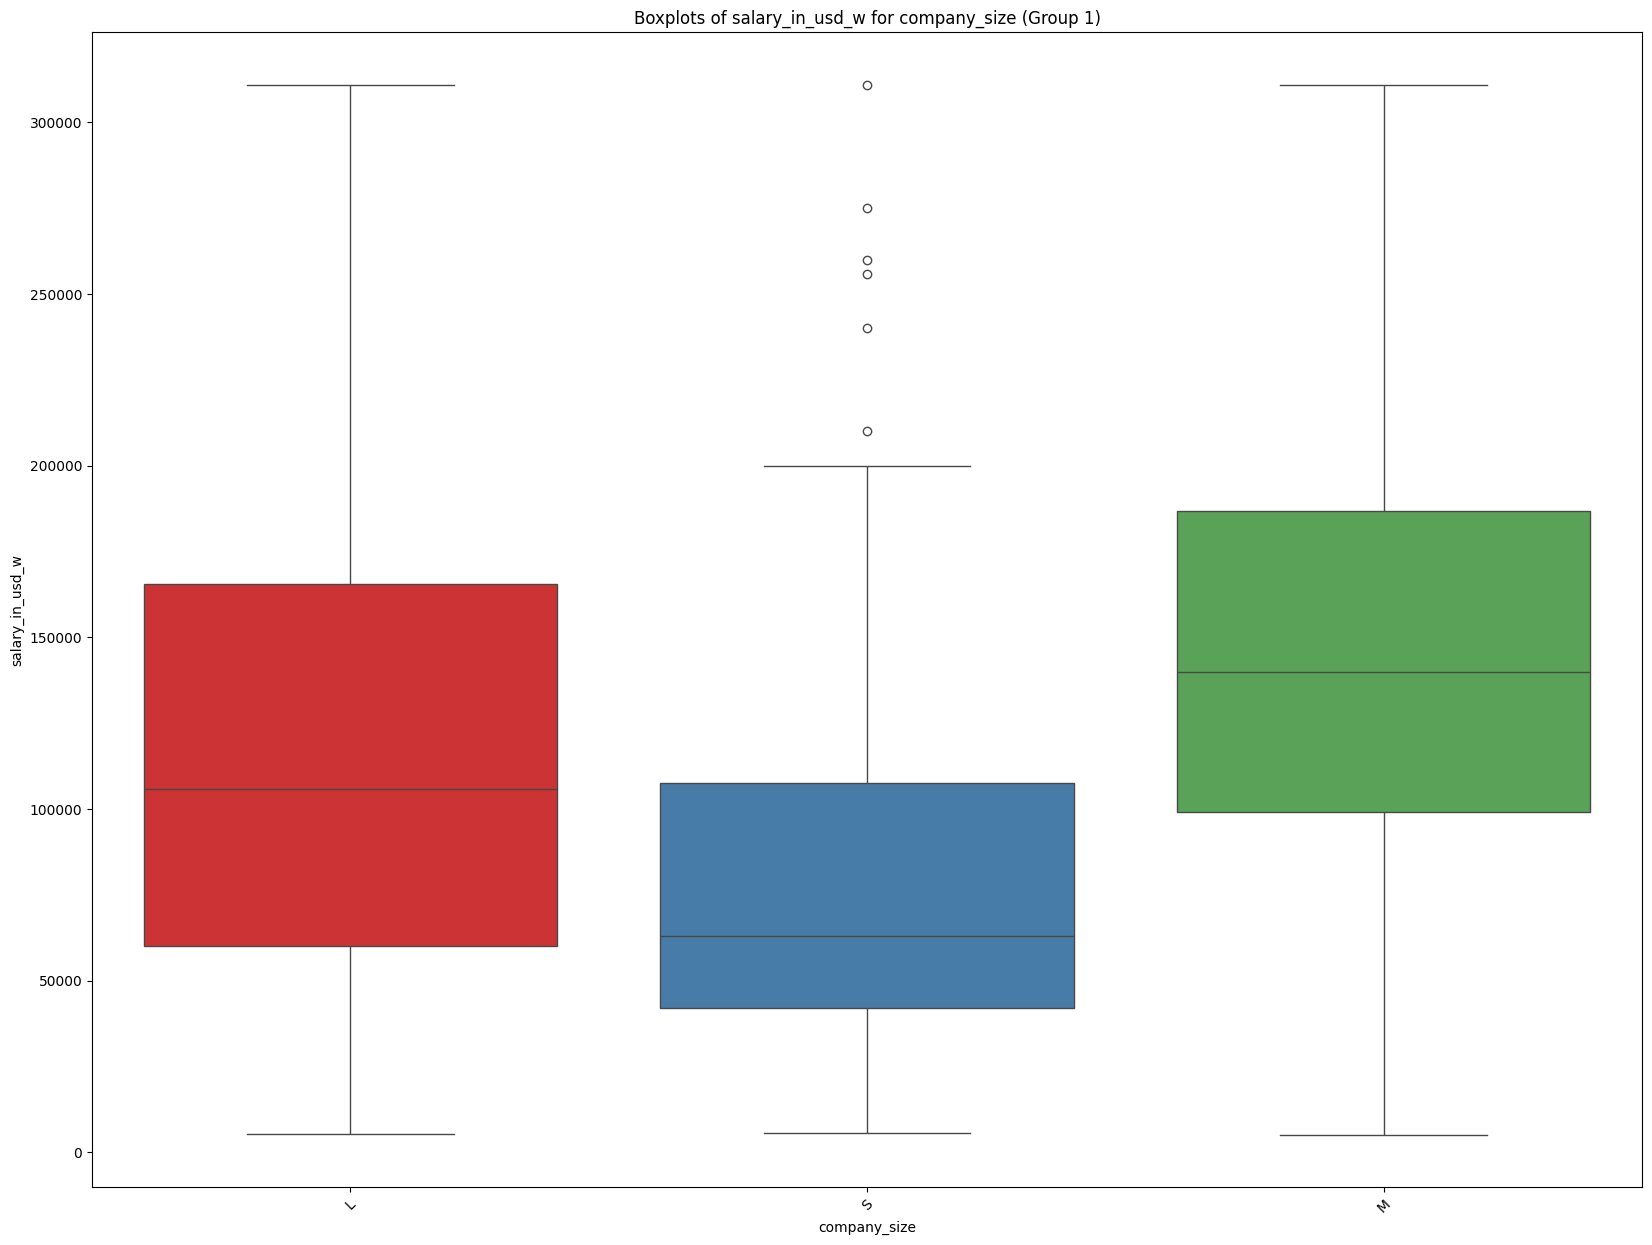

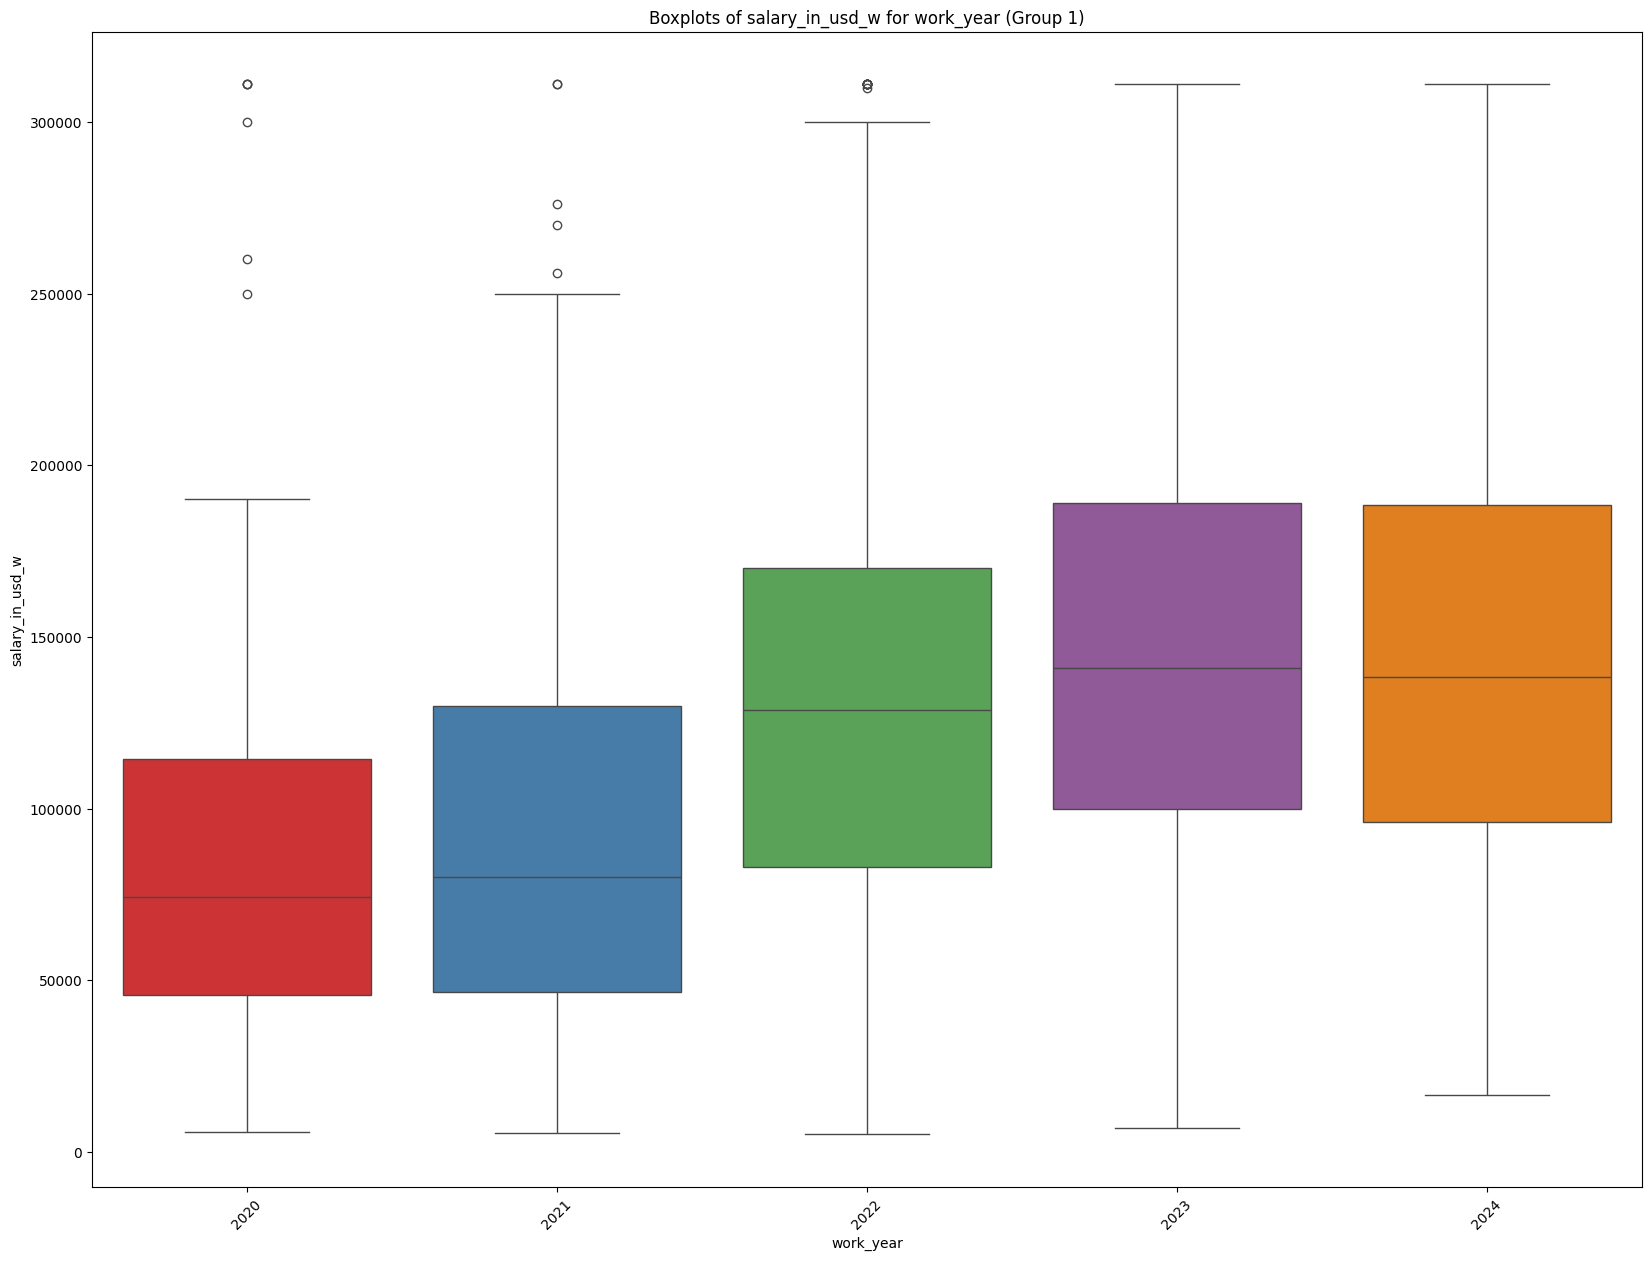

In [156]:
cat_cols2 = [
    'job_category',
    'experience_level',
    'company_location',
    'employee_residence',
    'work_setting',
    'employment_type',
    'company_size',
    'work_year'
]

dpf.plot_grouped_boxplots(df_combined, cat_cols2, num_col = 'salary_in_usd_w')

<font color='yellow'>

- **Israel and Qatar have the highest median wages**, with Israel showing a large variability in wages.   

- **The United States, Australia, Puerto Rico, and Saudi Arabia have similar and relatively high median wages**, with uniform distributions.

- Switzerland and New Zealand have medium-high median wages, but with narrower interquartile ranges, indicating less variability.

- Egypt shows high median wages, but with high variability in wages.

- **Qatar** shows consistently **high wages** but without much dispersion, which could indicate a **very specific labour market or a small sample size**.   

</font>

<font color='yellow'>
    
- 'Machine Learning and AI', 'Data Science and Research' and 'Leadership and Management' offer the highest salaries in the data field, while 'Data Analysis' and 'Data Quality and Operations' tend to offer the lowest salaries.

- The 'Cloud and Database' category shows not very high variability in salaries, with a median indicating good average compensation.

</font>

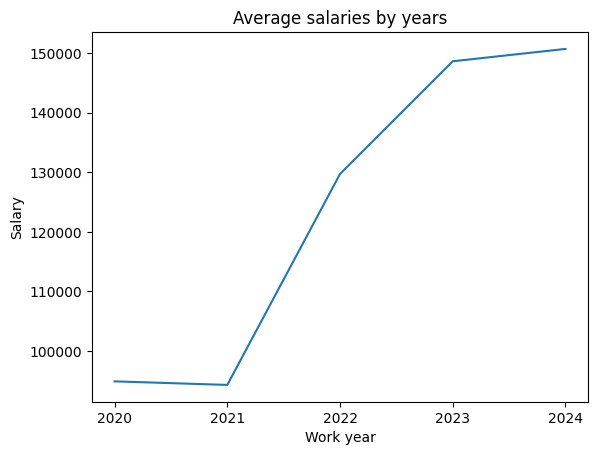

In [157]:
year_based_salary = df_combined.groupby('work_year')['salary_in_usd'].mean()

sns.lineplot(x = ['2020', '2021', '2022', '2023', '2024'], y = year_based_salary)
plt.title("Average salaries by years")
plt.xlabel('Work year')
plt.ylabel('Salary')
plt.show()

In [238]:
# Group the data by 'company_location' and calculate the average wage
salary_data = df_combined.groupby('company_location')['salary_in_usd_w'].mean().reset_index()

# Download the GeoJSON country file
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
geojson_data = requests.get(geojson_url).json()

# Adjust country names
salary_data['company_location'] = salary_data['company_location'].replace({'United States': 'United States of America'})

# Create the map centred on an initial location
map = folium.Map(location = [0, 0], zoom_start = 1.5)

# Add the layer of choropleths
folium.Choropleth(
    geo_data = geojson_data,
    name = 'choropleth',
    data = salary_data,
    columns = ['company_location', 'salary_in_usd_w'],
    key_on = 'feature.properties.name',
    fill_color = 'OrRd',
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = 'Average salary in USD'
).add_to(map)

# Add control layer
folium.LayerControl().add_to(map)

# Save the map
map.save('../img/salary_map.html')

map

#### 1.2.3.2. Analysis according to company location

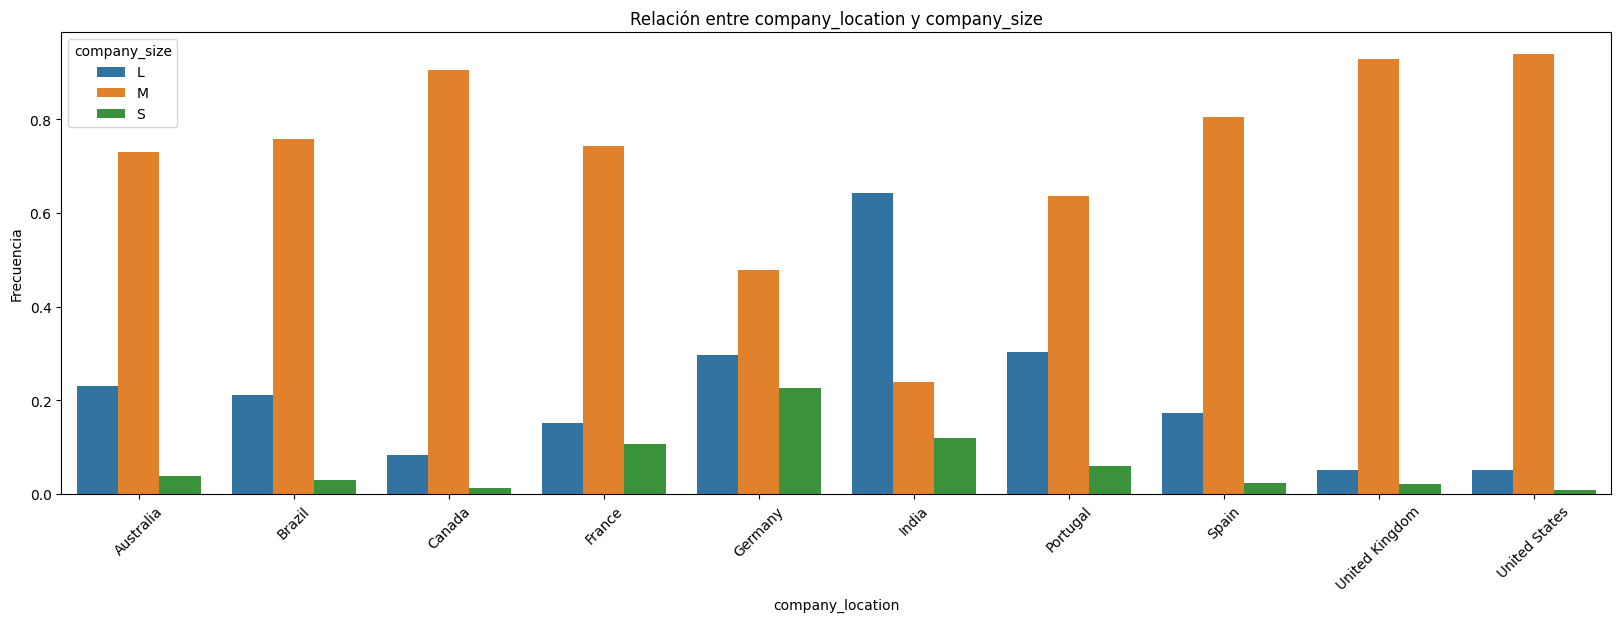

In [159]:
# Filter cat_col1 to include only the top 10 categories if more than 5 exist
top_cat_col1_values_loc = df_combined['company_location'].value_counts().nlargest(10).index
count_data_loc = df_combined[df_combined['company_location'].isin(top_cat_col1_values_loc)]

top_cat_col1_values_res = df_combined['employee_residence'].value_counts().nlargest(10).index
count_data_res = df_combined[df_combined['employee_residence'].isin(top_cat_col1_values_res)]


dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'company_size', relative_freq = True, size_group = 10)

In all cases if P-Value < 0.05 we reject the null hypothesis that there is no difference between the means and conclude that there is a significant difference.

In [160]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['company_size'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 1168.3178013925851
P-Value: 6.85044256627332e-237
Degrees of Freedom: 18
Expected Frequency Table:
 [[3.37839254e+00 4.78478466e+01 7.73760872e-01]
 [2.14397988e+00 3.03649796e+01 4.91040553e-01]
 [2.44283768e+01 3.45976737e+02 5.59488630e+00]
 [4.28795976e+00 6.07299591e+01 9.82081107e-01]
 [7.21156869e+00 1.02136749e+02 1.65168186e+00]
 [5.45740333e+00 7.72926753e+01 1.24992141e+00]
 [2.14397988e+00 3.03649796e+01 4.91040553e-01]
 [5.65231059e+00 8.00531279e+01 1.29456146e+00]
 [3.96961123e+01 5.62212197e+02 9.09169024e+00]
 [5.25599916e+02 7.44402075e+03 1.20379336e+02]]


<font color='yellow'>

- In all cases except in India, the size of company that stands out and which is most in demand for this type of job are **medium-sized companies**, with small companies having the least need for this type of employee.

</font>

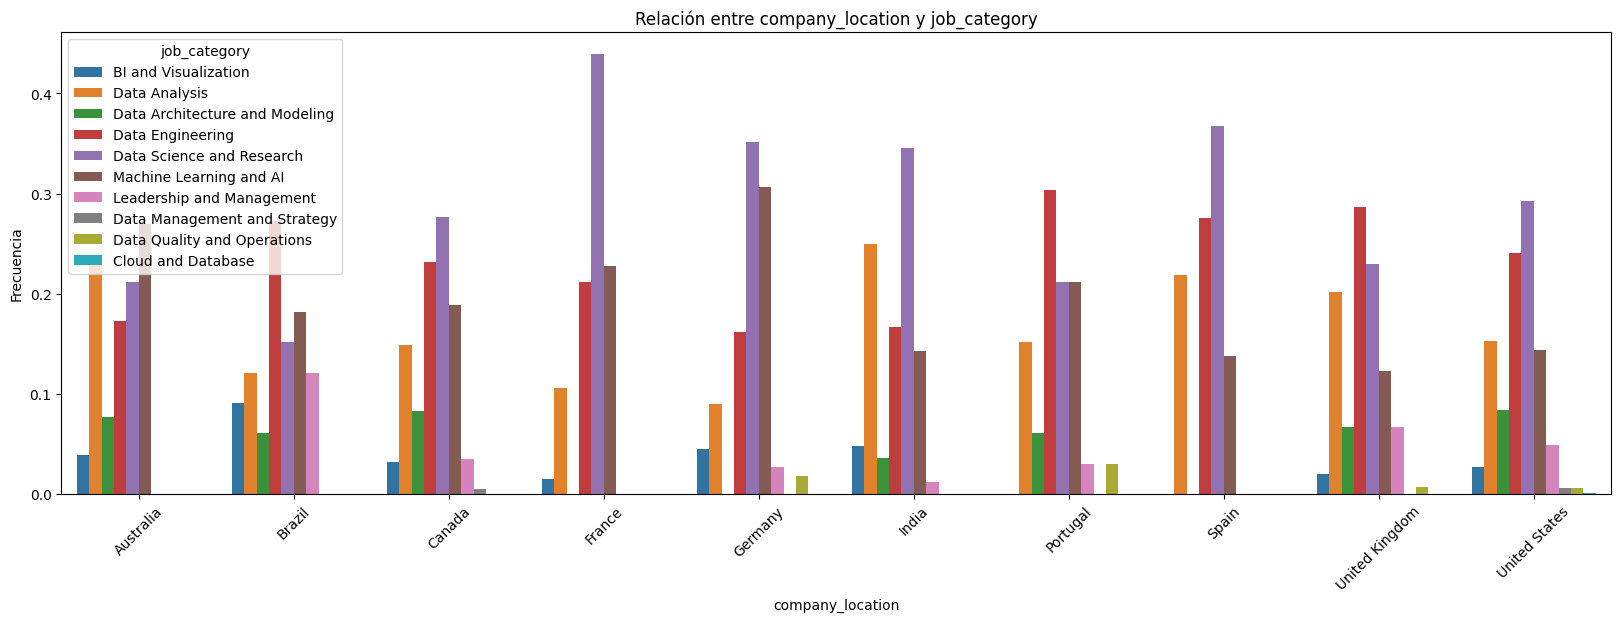

In [161]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'job_category', relative_freq = True, size_group = 10)

In [162]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['job_category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 172.70625548407077
P-Value: 1.3469798882757979e-08
Degrees of Freedom: 81
Expected Frequency Table:
 [[1.38950016e+00 3.81431416e-02 8.11904013e+00 4.14125537e+00
  1.25654406e+01 2.61552971e-01 2.99696112e-01 1.50501939e+01
  2.47930420e+00 7.65587342e+00]
 [8.81798177e-01 2.42062245e-02 5.15246778e+00 2.62810437e+00
  7.97422194e+00 1.65985539e-01 1.90191764e-01 9.55108456e+00
  1.57340459e+00 4.85853505e+00]
 [1.00471550e+01 2.75804254e-01 5.87069056e+01 2.99444619e+01
  9.08578015e+01 1.89122917e+00 2.16703343e+00 1.08824479e+02
  1.79272765e+01 5.53578539e+01]
 [1.76359635e+00 4.84124489e-02 1.03049356e+01 5.25620874e+00
  1.59484439e+01 3.31971078e-01 3.80383527e-01 1.91021691e+01
  3.14680918e+00 9.71707010e+00]
 [2.96604841e+00 8.14209368e-02 1.73310280e+01 8.83998743e+00
  2.68223829e+01 5.58314995e-01 6.39735932e-01 3.21263754e+01
  5.29236089e+00 1.63423452e+01]
 [2.24457718e+00 6.16158441e-02 1.31153725e+01 6.68972021e+00
  2.02980195e+01 4.22508645e-01 

<font color='yellow'>

- In most countries the most in-demand job categories are 'Data Science and Research', 'Data Engineering', 'Machine Learning and AI' and 'Data Analysis'.

</font>

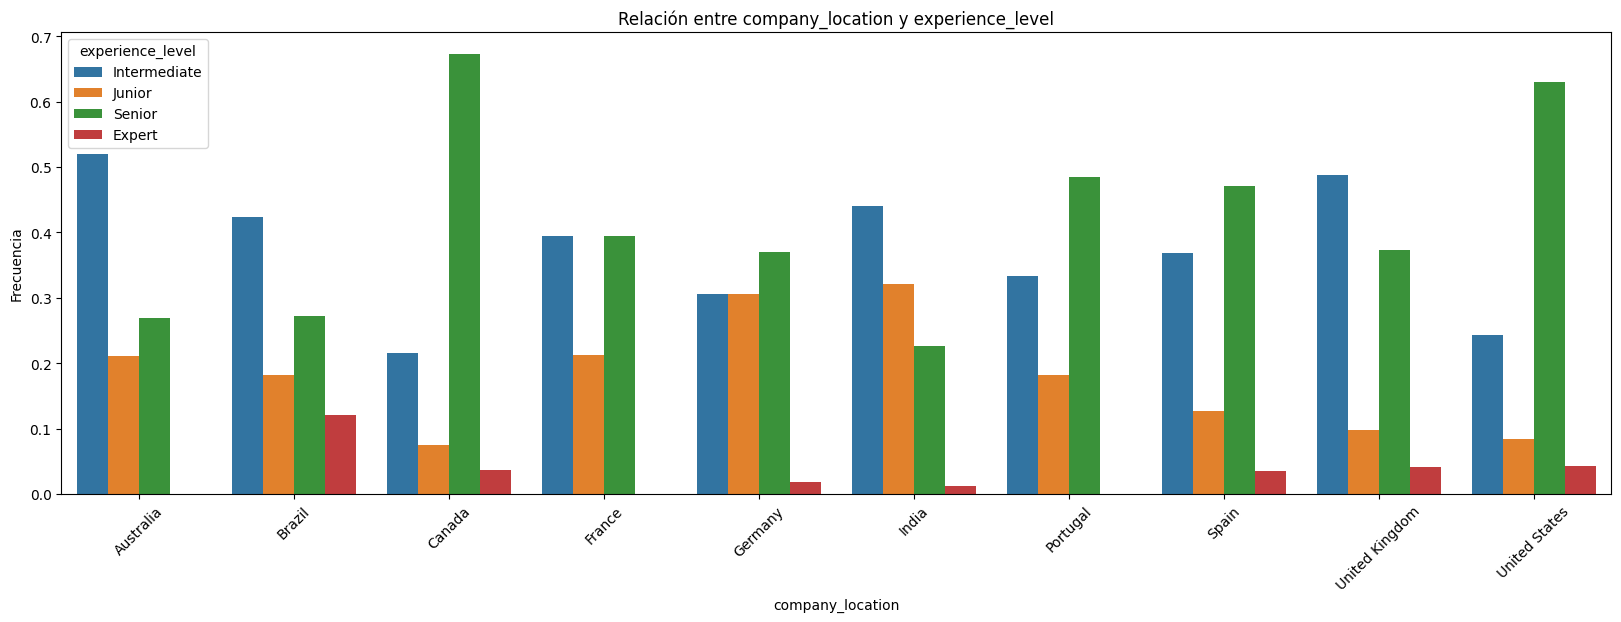

In [163]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'experience_level', relative_freq = True, size_group = 10)

In [164]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['experience_level'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 435.7241837260825
P-Value: 2.531435056376347e-75
Degrees of Freedom: 27
Expected Frequency Table:
 [[2.11966887e+00 1.37860212e+01 4.80603584e+00 3.12882741e+01]
 [1.34517447e+00 8.74882113e+00 3.04998428e+00 1.98560201e+01]
 [1.53268364e+01 9.96835377e+01 3.47513361e+01 2.26238290e+02]
 [2.69034895e+00 1.74976423e+01 6.09996856e+00 3.97120402e+01]
 [4.52467777e+00 2.94278529e+01 1.02590380e+01 6.67884313e+01]
 [3.42408048e+00 2.22697265e+01 7.76359635e+00 5.05425967e+01]
 [1.34517447e+00 8.74882113e+00 3.04998428e+00 1.98560201e+01]
 [3.54636907e+00 2.30650739e+01 8.04086765e+00 5.23476894e+01]
 [2.49061092e+01 1.61985749e+02 5.64709211e+01 3.67637221e+02]
 [3.29771560e+02 2.14478675e+03 7.47708268e+02 4.86773342e+03]]


<font color='yellow'>

- The most demanded profiles in almost all countries are between junior and senior (between 6 and 10 years). The least in demand are expert profiles. Companies may want someone who learns with them and can achieve that level by growing within the company.

</font>

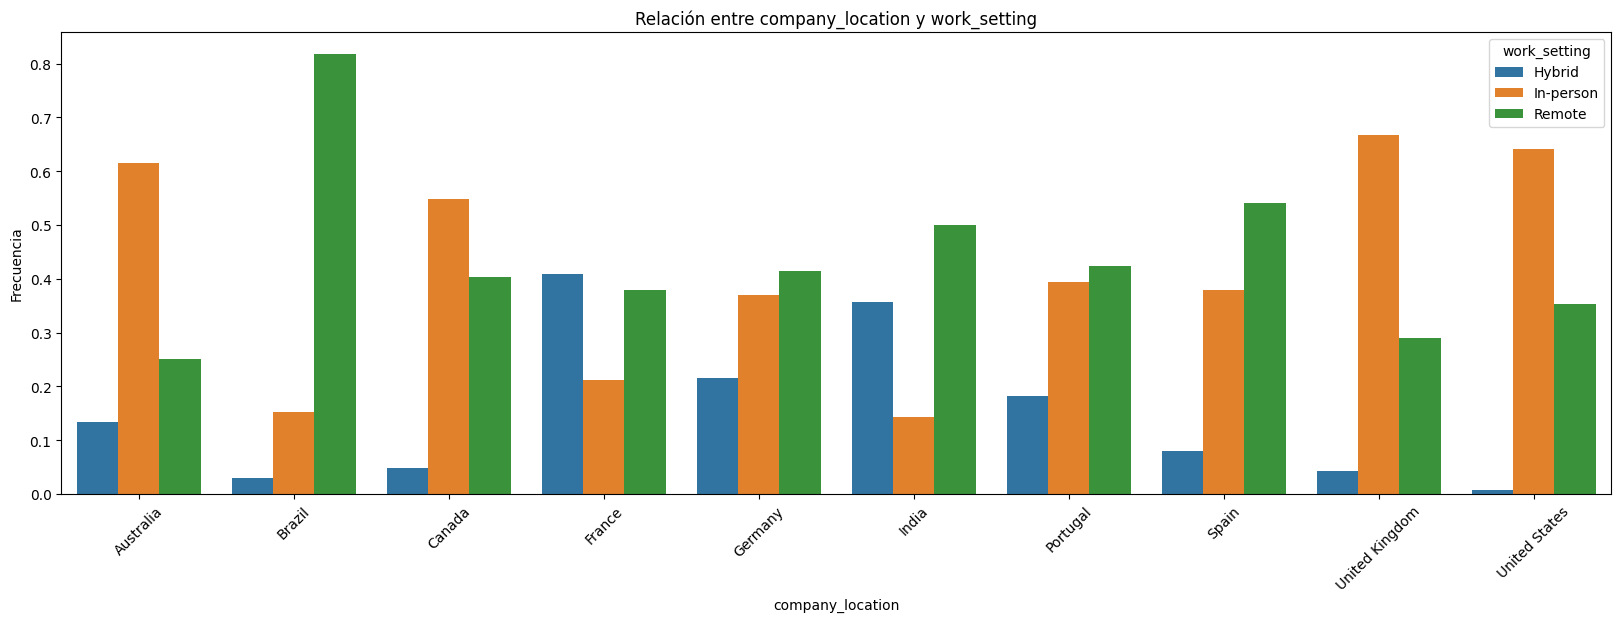

In [165]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'work_setting', relative_freq = True, size_group = 10)

In [166]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['work_setting'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 1477.8268427658052
P-Value: 2.7664800243595528e-303
Degrees of Freedom: 18
Expected Frequency Table:
 [[1.07890600e+00 3.24271194e+01 1.84939746e+01]
 [6.84690349e-01 2.05787488e+01 1.17365608e+01]
 [7.80132034e+00 2.34473017e+02 1.33725663e+02]
 [1.36938070e+00 4.11574976e+01 2.34731217e+01]
 [2.30304936e+00 6.92194279e+01 3.94775228e+01]
 [1.74284816e+00 5.23822697e+01 2.98748821e+01]
 [6.84690349e-01 2.05787488e+01 1.17365608e+01]
 [1.80509274e+00 5.42530651e+01 3.09418422e+01]
 [1.26771456e+01 3.81018652e+02 2.17304202e+02]
 [1.67852876e+02 5.04491145e+03 2.87723567e+03]]


<font color='yellow'>

- In almost all countries, the most sought-after jobs are either face-to-face or online, with a hybrid format being more rare.

</font>

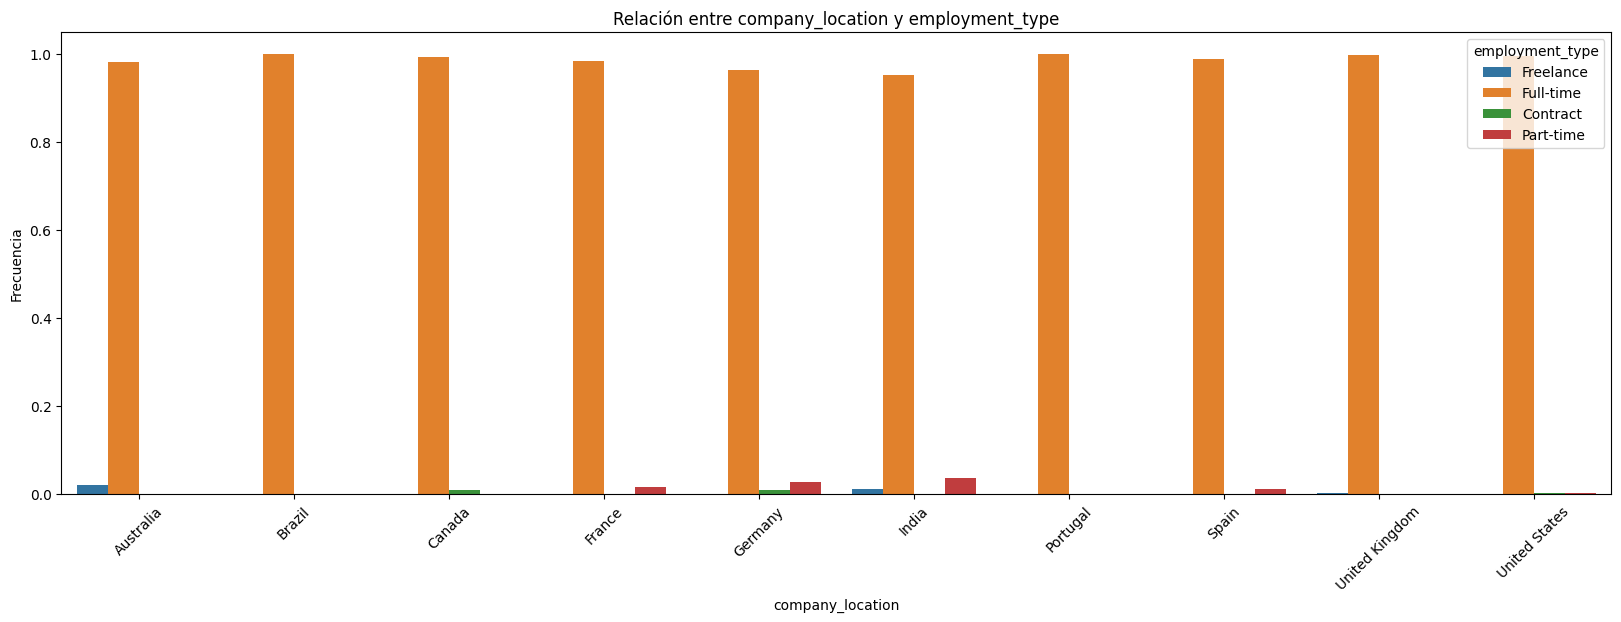

In [167]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'employment_type', relative_freq = True, size_group = 10)

In [168]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['employment_type'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 105.1310336598604
P-Value: 3.6431219624136526e-11
Degrees of Freedom: 27
Expected Frequency Table:
 [[1.19878445e-01 4.90411820e-02 5.16839568e+01 1.47123546e-01]
 [7.60767054e-02 3.11222886e-02 3.27994341e+01 9.33668658e-02]
 [8.66813371e-01 3.54605470e-01 3.73714765e+02 1.06381641e+00]
 [1.52153411e-01 6.22445772e-02 6.55988683e+01 1.86733732e-01]
 [2.55894373e-01 1.04684062e-01 1.10325369e+02 3.14052185e-01]
 [1.93649796e-01 7.92203710e-02 8.34894687e+01 2.37661113e-01]
 [7.60767054e-02 3.11222886e-02 3.27994341e+01 9.33668658e-02]
 [2.00565860e-01 8.20496699e-02 8.64712355e+01 2.46149010e-01]
 [1.40857173e+00 5.76233889e-01 6.07286493e+02 1.72870167e+00]
 [1.86503196e+01 7.62967620e+00 8.04083098e+03 2.28890286e+01]]


<font color='yellow'>

- It can be said that full-time work predominates in all countries, accounting in virtually all cases for almost 100% of contracts.

</font>

In [239]:
# Group the data by 'company_location' and calculate the average wage
job_offers_data = df_combined['company_location'].value_counts().reset_index()
job_offers_data.columns = ['company_location', 'job_offers_count']

# Download the GeoJSON country file
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
geojson_data = requests.get(geojson_url).json()

# Adjust country names
job_offers_data['company_location'] = job_offers_data['company_location'].replace({'United States': 'United States of America'})

# Create the map centred on an initial location
map = folium.Map(location = [0, 0], zoom_start = 1.5)

# Add the layer of choropleths
folium.Choropleth(
    geo_data = geojson_data,
    name = 'Average salary in USD',
    data = salary_data,
    columns = ['company_location', 'salary_in_usd_w'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu',
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = 'Average salary in USD'
).add_to(map)

# Add the layer of choropleths
folium.Choropleth(
    geo_data = geojson_data,
    name = 'Number of job offers',
    data = job_offers_data,
    columns = ['company_location', 'job_offers_count'],
    key_on = 'feature.properties.name',
    fill_color = 'OrRd',
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = 'Number of job offers'
).add_to(map)

# Add control layer
folium.LayerControl().add_to(map)

# Save the map
map.save('../img/job_offers_map3.html')

map

#### 1.2.3.3. Analysis according to work year

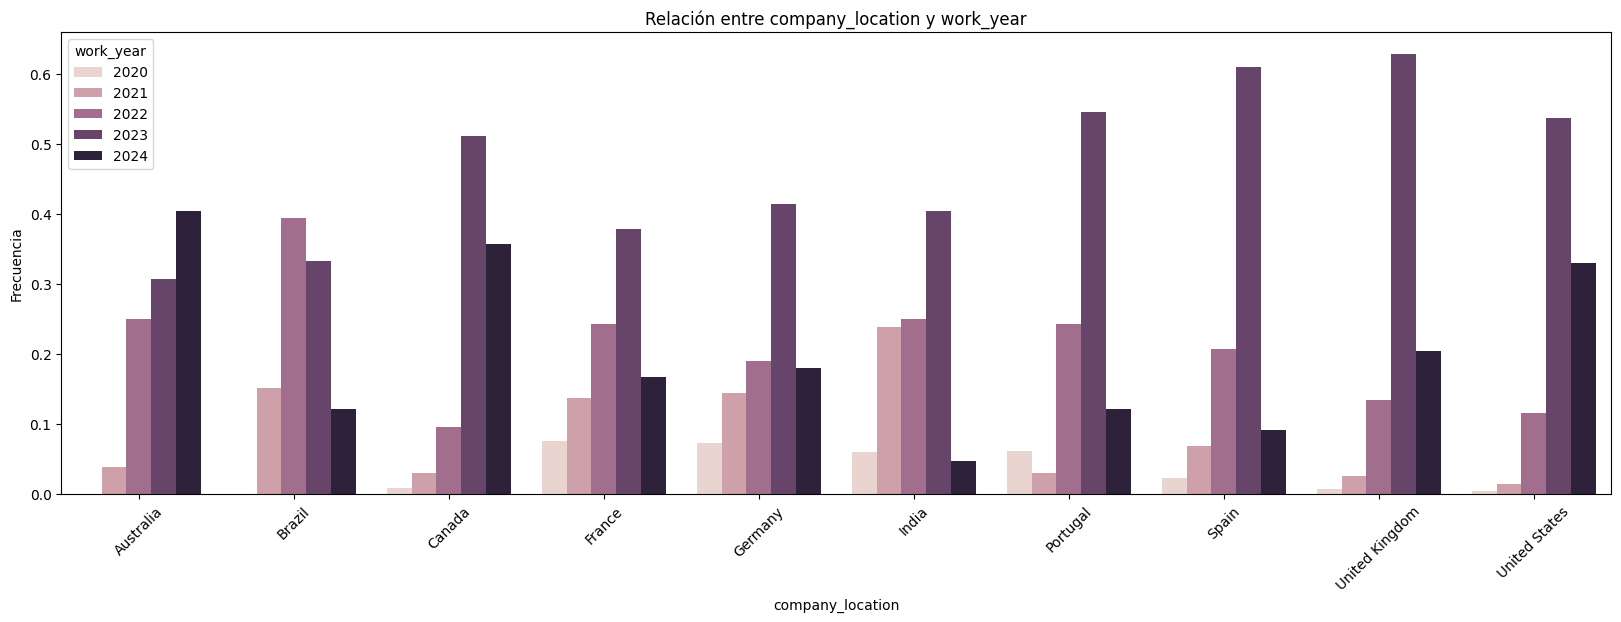

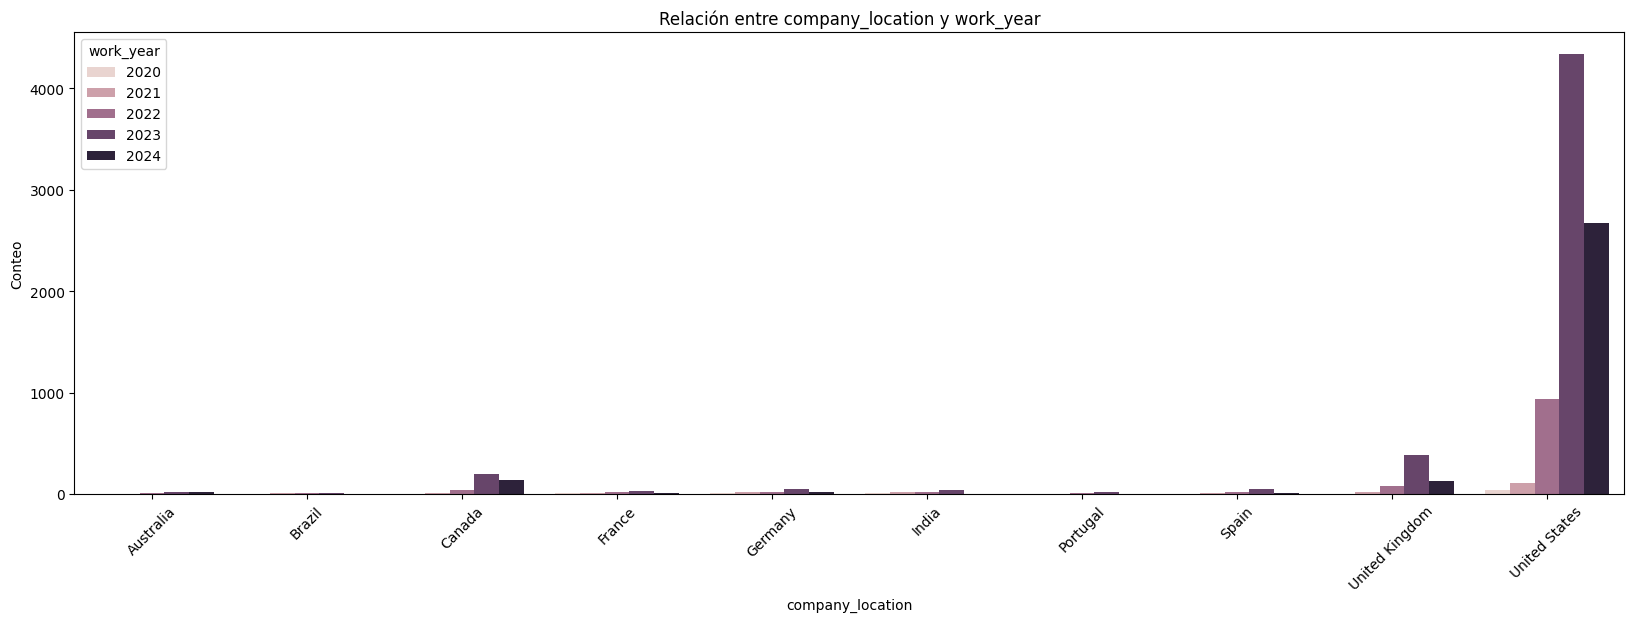

In [170]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'work_year', relative_freq = True, size_group = 10)
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'work_year', size_group = 10)

In [171]:
# ANOVA

groups = df_combined['company_location'].unique() 
loc_for_year = [df_combined[df_combined['company_location'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*loc_for_year)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 11.57145911715038
Valor p: 8.127161875468736e-140


<font color='yellow'>

- 2023 is undoubtedly the boom year for this type of employment. 2024 is on the right track in certain countries such as Australia, Canada and the United States, but lags far behind 2023 in the rest.

    - Does the fall of Silicon Valley Bank last year have anything to do with it?

</font>

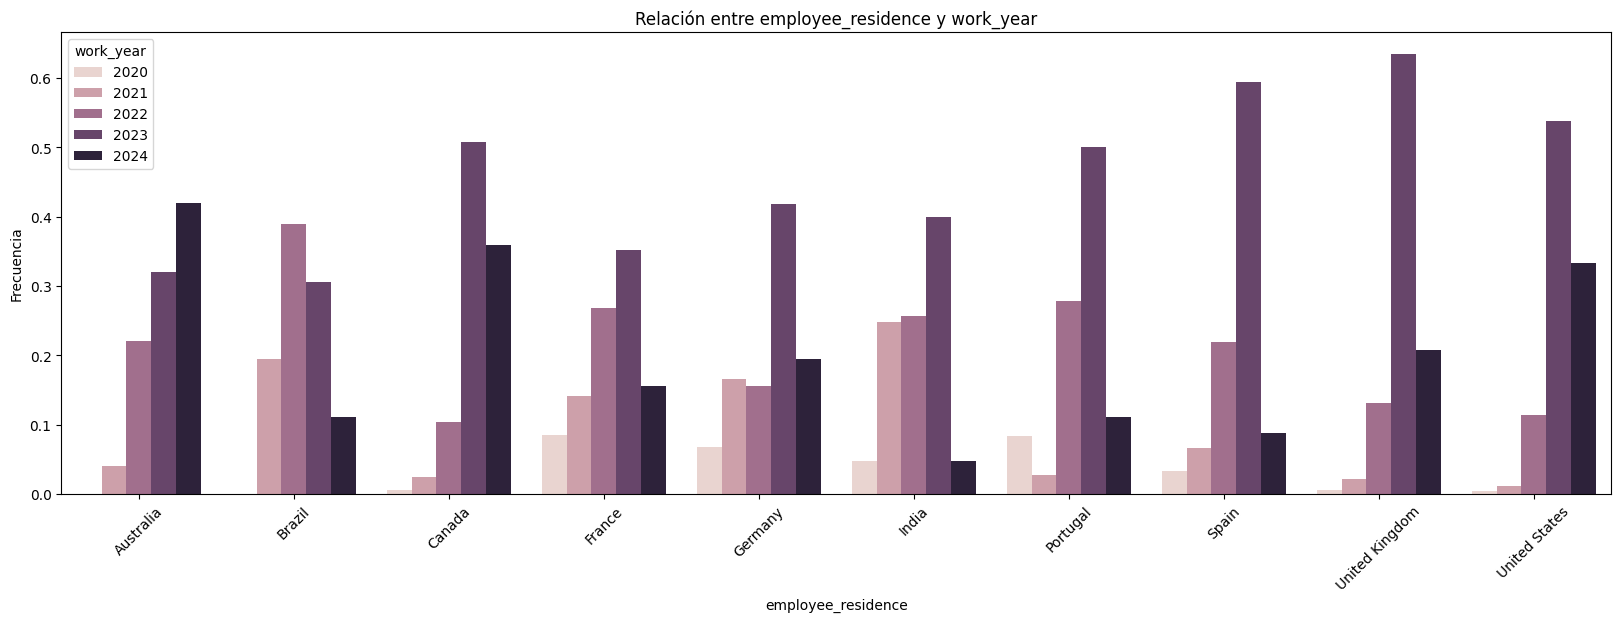

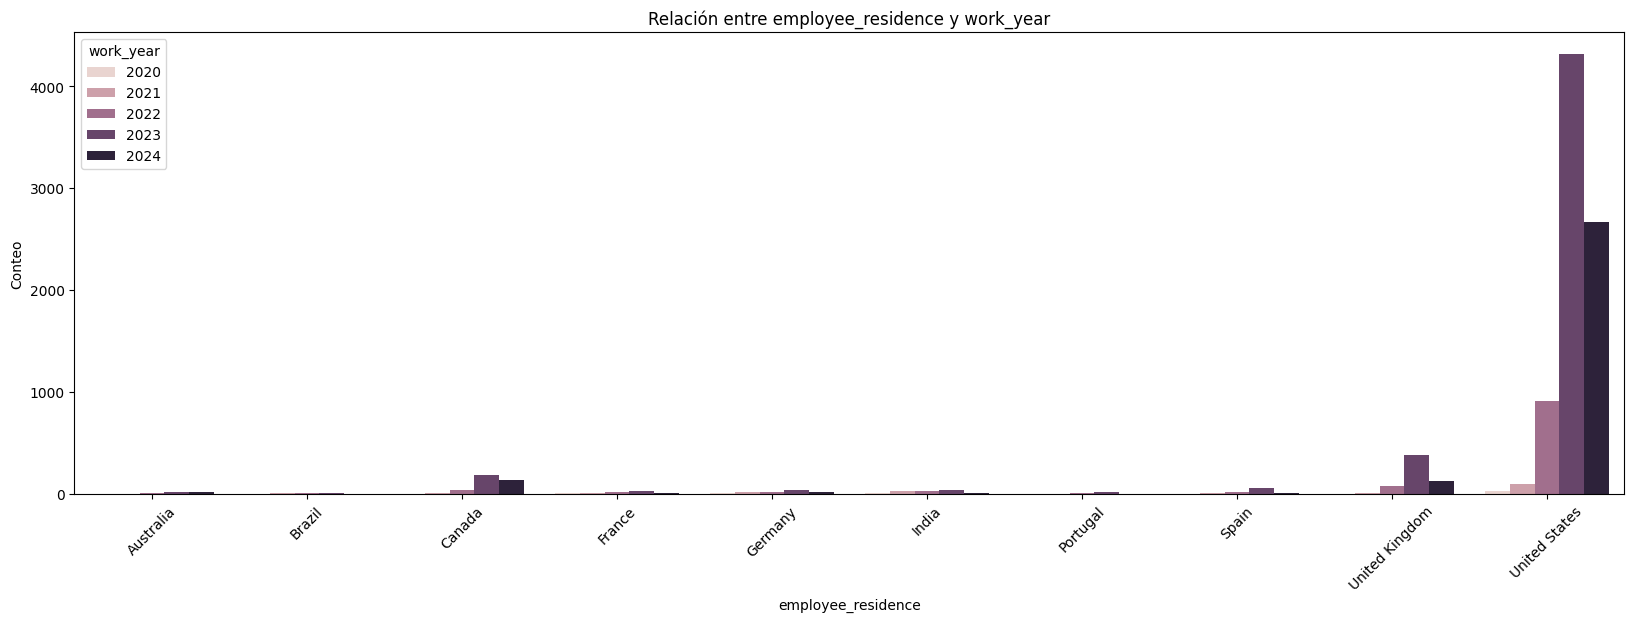

In [172]:
dpf.plot_categorical_relationship_fin(count_data_res, cat_col1 = 'employee_residence', cat_col2 = 'work_year', relative_freq = True, size_group = 10)
dpf.plot_categorical_relationship_fin(count_data_res, cat_col1 = 'employee_residence', cat_col2 = 'work_year', size_group = 10)

In [173]:
groups = df_combined['employee_residence'].unique() 
res_for_year = [df_combined[df_combined['employee_residence'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*res_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 13.42996145969176
P value: 1.8219987633661398e-182


<font color='yellow'>

- The place of residence of the workers is entirely consistent with the location of the headquarters of the companies. This will have a lot to do with the return to face-to-face work after Covid-19.

</font>

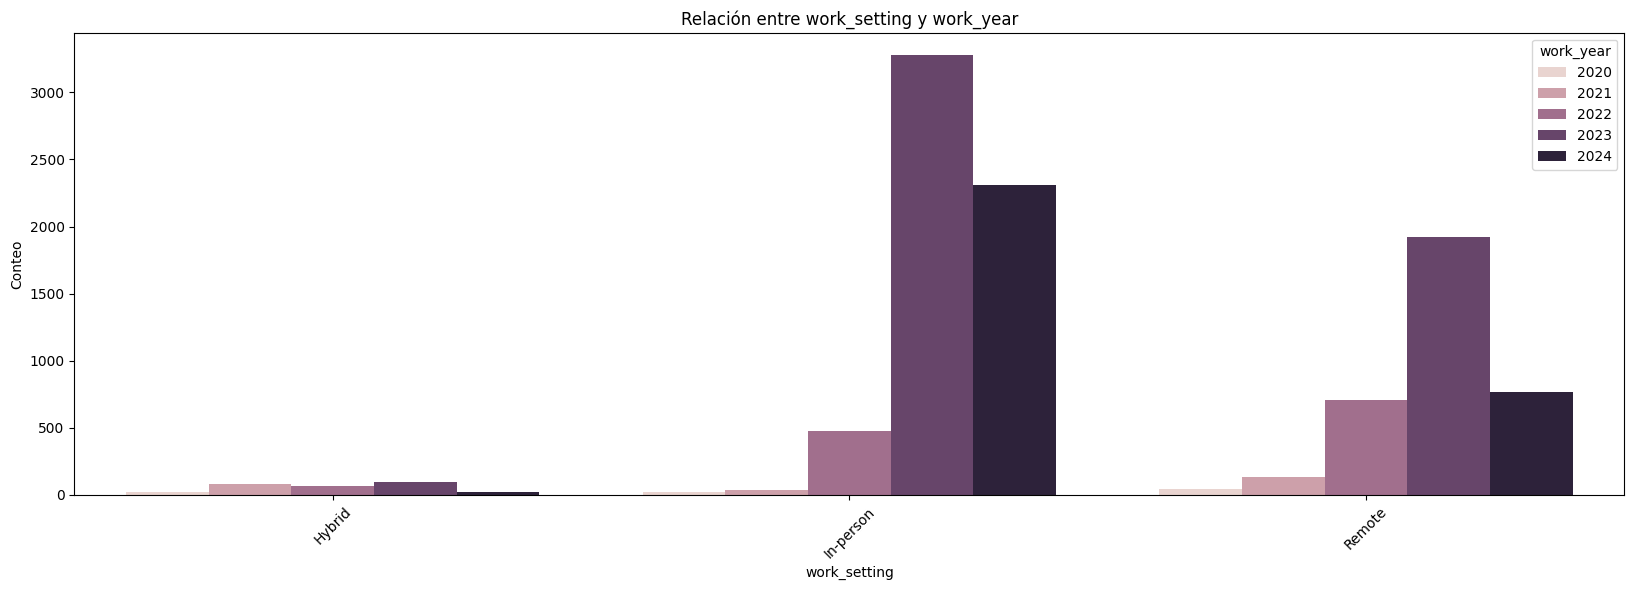

In [174]:
dpf.plot_categorical_relationship_fin(df_combined, cat_col1 = 'work_setting', cat_col2 = 'work_year', size_group = 10)

In [175]:
groups = df_combined['work_setting'].unique() 
ws_for_year = [df_combined[df_combined['work_setting'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*ws_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 617.7451480555538
P value: 1.2332952466427167e-253


<font color='yellow'>

- As anticipated in the graph above, in 2024, face-to-face work is coming back into vogue, with remote work following closely behind, and hybrid work lagging far behind.

- We assume that the companies that used the hybrid mode during Covis-19 have opted to return 100% to the face-to-face mode, or to opt definitively for remote work.

</font>

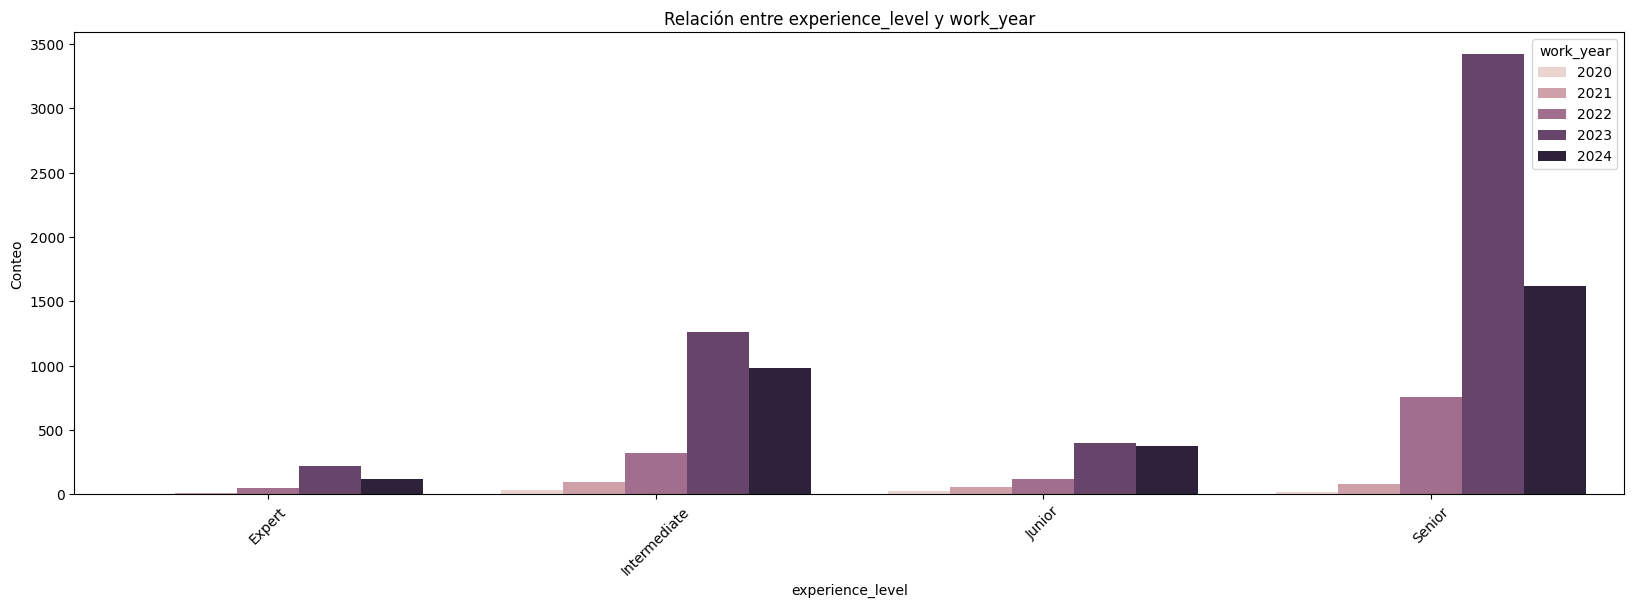

In [176]:
dpf.plot_categorical_relationship_fin(df_combined, cat_col1 = 'experience_level', cat_col2 = 'work_year', size_group = 10)

In [177]:
groups = df_combined['experience_level'].unique() 
el_for_year = [df_combined[df_combined['experience_level'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*el_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 2.567151367586863
P value: 0.052663002487709776


<font color='yellow'>
According to this test, we cannot be sure that the response and the CLV are related. The reaffirms our visual confirmation, but does not confirm.
</font>

<font color='yellow'>

- More and more junior or intermediate profiles are in demand, perhaps with the intention of training this person and helping him or her to grow within the company with a view to the future. Even so, the most in-demand profile is the Senior and far behind the ‘Expert’, perhaps also because a very specific profile will be required that is difficult to find.

</font>

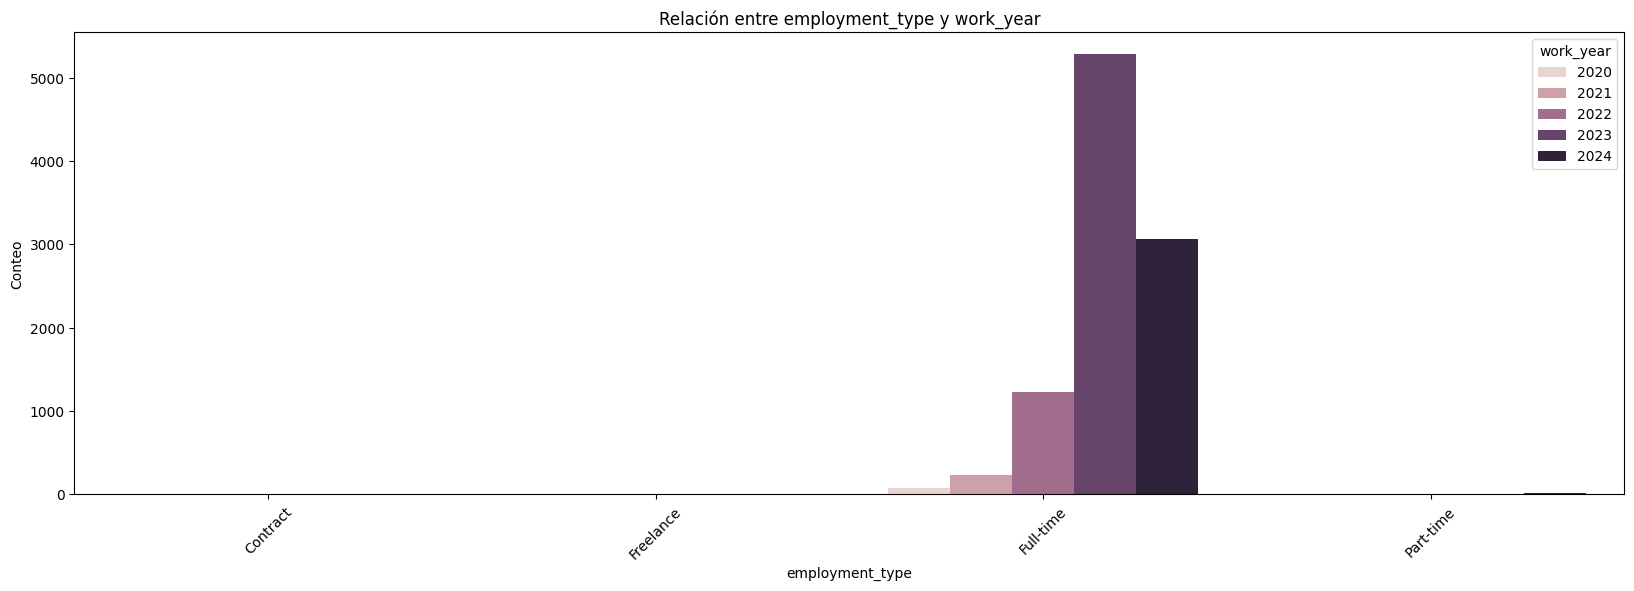

In [178]:
dpf.plot_categorical_relationship_fin(df_combined, cat_col1 = 'employment_type', cat_col2 = 'work_year', size_group = 10)

In [179]:
groups = df_combined['employment_type'].unique() 
et_for_year = [df_combined[df_combined['employment_type'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*et_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 31.87696119230221
P value: 1.6893330595949024e-20


<font color='yellow'>

- Practically the total percentage in all years of the contract type is ‘Full-time’.

</font>

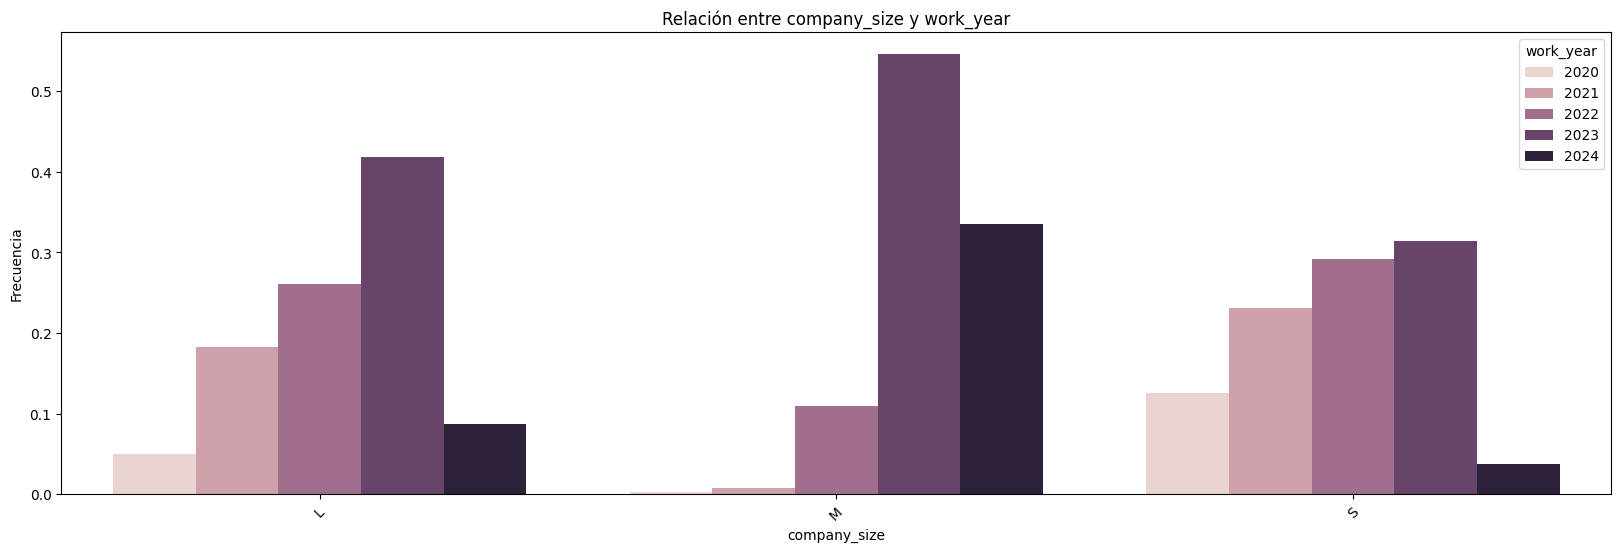

In [180]:
dpf.plot_categorical_relationship_fin(df_combined, cat_col1 = 'company_size', cat_col2 = 'work_year', relative_freq = True, size_group = 10)

In [181]:
groups = df_combined['company_size'].unique() 
cs_for_year = [df_combined[df_combined['company_size'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*cs_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 842.5243648454514
P value: 0.0


<font color='yellow'>

- This sector is growing strongly in the medium-sized company market, with a big difference compared to large and small companies, perhaps the ones that have suffered most from the effects of the fall of the Silicon Valley Bank of 2023.

</font>

## 1.3. Final conclusions (for the moment):

1. **Profiles in demand**:

    - Data Engineer and Data Scientist with experience of at least 5 years (Senior) are the most in demand.

2. **Job offer by country**:

    - The United States is the country with the most job offers in the data environment.

3. **Work modality**:

    - Most jobs are full-time and face-to-face, followed by remote work. Hybrid work is less common.   

4. **Company size**:

    - Medium-sized companies (50-250 employees) have the highest demand for this type of employee and also pay the best on average.

5. **Growth in demand**:

    - Demand for jobs in the data environment has grown exponentially since 2020, possibly influenced by events such as Covid-19 and the collapse of Silicon Valley Bank in 2023.

6. **General salaries**:

    - Most jobs offer salaries between $80k and $180k per year.

7. **International salary comparison**:

    - Israel and Qatar have the highest median salaries, hovering around $300k.   

    - The United States, Puerto Rico and New Zealand offer median salaries around $155k.

    - Salaries in Israel have a large variability, while Qatar shows high salaries with less dispersion, possibly due to low labour supply.

    - Other countries with medium-high salaries include Australia and Saudi Arabia.

8. **Wages by residence and mode of work**:

    - Employees who work 100% face-to-face or remotely have higher median wages than those with a hybrid job type.

    -  Full-time jobs are better paid on average compared to freelance jobs.

9. **Wage growth**:

    - The average wage has increased by almost 60% from 2020 to today.

10. **Demand vs Residency**:

    - Over time, there has been a discrepancy between the 10 countries with the highest number of companies demanding data jobs and the 10 countries where the most employees engaged in these jobs live. This may be due to companies' strategy of hiring in countries with lower cost of living or to the mobility of employees to cheaper countries.

    - However, this year 2024 the residence of workers does coincide more closely with the location of companies' headquarters, probably due to the return to face-to-face work post-Covid.

11. **Highest paid areas and job categories**:

    - Machine Learning and AI, Data Science and Research, and Leadership and Management offer the highest salaries.

    - The Data Analysis and Data Quality and Operations categories tend to offer lower salaries.

    - The Cloud and Database category shows good average compensation with low variability in salaries.

12. **Demand by country and company size**:

    - In most countries, the most in-demand job categories are Data Science and Research, Data Engineering, Machine Learning and AI, and Data Analysis.

    - Medium-sized companies are the most in demand for these types of employees, except in India.

    - The most demanded profiles in almost all countries are junior to senior (6 to 10 years of experience), with less demand for expert profiles.

13. **Impact of the fall of Silicon Valley Bank**:

    - 2023 had the biggest boom in jobs in this sector, with 2024 showing growth in countries such as Australia, Canada and the United States, but little growth or even decline in supply in the rest. The fall of Silicon Valley Bank in 2023 may have played a role.


## 1.4. Evaluation of the Hypothesis: 'The United States is the best country to work in the data environment'.

The hypothesis that the United States is the best country to work in the data environment is evident but not conclusive based on these findings:

- **Pros**:

    - The United States has the **largest labour supply** in the data environment.
    - It offers high median **salaries ($155k)** and a relatively even wage distribution.
    - There is **exponential growth in demand** for these jobs from 2020.

- **Cons**:

    - Countries such as **Israel** and **Qatar** have higher median salaries **(around $300k)**.
    - Other countries also offer competitive salaries and may have **lower living costs**.
    - The mode of work in the US is mostly face-to-face, which could be a disadvantage compared to the flexibility in other countries.


**Therefore, while the US is a prominent place to work in the data environment due to high labour supply and good salaries, other countries may offer superior salary conditions, which makes the statement true but nuanced.**

# 2. Second part

In [182]:
# Loads the DataFrame we are going to work with.
df4 = pd.read_csv("../data/5_glassdoor_jobs.csv")

## 2.1. Data cleansing

### 2.1.1. Dataset visualisation

#### DF4

In [183]:
print(df4.info()) # Shows if there are nulls and the type of data in each column
df4.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB
None


Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  
0                                                 -1  
1                                                 -1  
2                                                 -1  
3  Oak Ridge National Laboratory, National Renewa...  
4               Commerce Signals, Cardlytics, Yodlee

### 2.1.2. DataFrame adaptation

I make some modifications to the DataFrame.

First of all, I think about the columns I am interested in.

#### DF4

In [184]:
df4['Founded'] = df4['Founded'].replace(-1, 'Unknown')
df4['Sector'] = df4['Sector'].replace('-1', df4['Sector'].mode()[0])
df4['Size'] = df4['Size'].replace('Unknown', df4['Size'].mode()[0])

mode_rating = df4[df4['Rating'] >= 0]['Rating'].mode()[0] # Calculate the mode of the 'Rating' column (ignoring negative values)
df4['Rating'] = df4['Rating'].apply(lambda x: mode_rating if x < 0 else x) # Replace negative numbers in the 'Rating' column with the mode

In [185]:
# Modify the columns that I think are convenient for a better understanding and create new ones.

# Delete column 'Unnamed: 0'
df4.drop('Unnamed: 0', axis = 1, inplace = True)


# Rename column 'Job Title'
df4.rename(columns = {'Job Tiltle': 'Job_title'}, inplace = True)

In [186]:
df4['Salary Estimate'].value_counts()

Salary Estimate
-1                                  214
$21-$34 Per Hour(Glassdoor est.)      6
$49K-$113K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$86K-$143K (Glassdoor est.)           6
                                   ... 
$105K-$173K (Glassdoor est.)          1
$46K-$85K (Glassdoor est.)            1
$71K-$134K (Glassdoor est.)           1
$102K-$190K (Glassdoor est.)          1
$27-$47 Per Hour(Glassdoor est.)      1
Name: count, Length: 417, dtype: int64

In [187]:
# Edit column 'Salary Estimate'

# Function to convert salary to an annual figure
def convert_to_annual_salary(salary_str):
    salary_str = salary_str.strip()
    
    # Delete '(Glassdoor est.)' if present
    if '(Glassdoor est.)' in salary_str:
        salary_str = salary_str.replace('(Glassdoor est.)', '')
        return salary_str
    
    # If it is a special value (-1), we return NaN
    if salary_str == '-1':
        return np.nan

    # Handling hourly estimates
    if 'Per Hour' in salary_str:
        try:
            low, high = salary_str.split('$')[1].split('-')
            low = float(low.strip().replace(',', ''))
            high = float(high.strip().replace(',', ''))
            # Convert to annual salary
            return ((low + high) / 2) * 2080  # 2080 hours in a working year
        except:
            return np.nan

# Apply the function to the DataFrame
df4['Salary'] = df4['Salary Estimate'].apply(convert_to_annual_salary)

df4.Salary.value_counts()

Salary
$86K-$143K          6
$21-$34 Per Hour    6
$54K-$115K          6
$49K-$113K          6
$81K-$167K          5
                   ..
$171K-$272K         1
$136K-$208K         1
$57K-$109K          1
$74K-$137K          1
$72K-$142K          1
Name: count, Length: 400, dtype: int64

In [188]:
def convert_to_annual_mean(salary_range):
    if pd.isna(salary_range):
        return None
    
    try:
        # Identify whether hourly or annual
        if 'Per Hour' in salary_range:
            # Remove the word 'Per Hour' and split the range
            salary_range = salary_range.replace(' Per Hour', '')
            low, high = salary_range.split('-')
            # Convert to numerical values
            low = float(low.replace('$', ''))
            high = float(high.replace('$', ''))
            # Calculate the average hourly wage
            mean_hourly = (low + high) / 2
            # Convert to annual salary (we assume 40 hours per week and 52 weeks per year)
            annual_mean = mean_hourly * 40 * 52
        else:
            # Split the range
            low, high = salary_range.split('-')
            # Convert to numerical values
            low = float(low.replace('$', '').replace('K', '000'))
            high = float(high.replace('$', '').replace('K', '000'))
            # Calculate the average annual salary
            annual_mean = (low + high) / 2
        
        return round(int(annual_mean), 0)
    
    except Exception as e:
        print(f"Error processing salary range '{salary_range}': {e}")
        return None

# Apply the function to each row of the DataFrame
df4['Average_salary'] = df4['Salary'].apply(convert_to_annual_mean)

In [189]:
# Delete rows with NaN values in the column 'Average_salary'
df4.dropna(subset = ['Average_salary'], inplace = True)
df4.Average_salary.info()

<class 'pandas.core.series.Series'>
Index: 713 entries, 0 to 955
Series name: Average_salary
Non-Null Count  Dtype  
--------------  -----  
713 non-null    float64
dtypes: float64(1)
memory usage: 11.1 KB


In [190]:
# Create column 'Satate'

# Dictionary for mapping state abbreviations to their full names
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Mapping states to regions
regions = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
    'Southeast': ['AL', 'FL', 'GA', 'KY', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'Southwest': ['AZ', 'NM', 'OK', 'TX'],
    'West': ['CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'OR', 'UT', 'WA', 'WY']
}

region_mapping = {state: region for region, states in regions.items() for state in states}

# Extract abbreviations from the column 'Location'
def extract_state(location):
    parts = location.split(', ')
    if len(parts) > 1:
        return parts[1]
    return None

df4['State Abbreviation'] = df4['Location'].apply(extract_state)
df4['State'] = df4['State Abbreviation'].map(state_abbreviations)

# Assign regions to states
df4['Region'] = df4['State Abbreviation'].map(region_mapping)
df4.drop('State Abbreviation', axis = 1, inplace = True)

df4.head(5)

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees    1973   Company - Private   
1   Baltimore, MD        10000+ employees    1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees    2010   Company - Private   
3    Richland, WA  1001 to 5000 employees    1965          Government   
4    New York, NY     51 to 200 employees    1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors       Salary  \
0                                                 -1   $53K-$91K    
1                                                 -1  $63K-$112K    
2                                                 -1   $80K-$90K    
3  Oak Ridge National Laboratory, National Renewa...   $56K-$97K    
4               Commerce Signals, Cardlytics, Yodlee  $86K-$143K    

   Average_salary       State     Region  
0         72000.0  New Mexico  Southwest  
1         87500.0    Maryland        NaN  
2         85000.0     Florida  Southeast  
3         76500.0  Washington       West  
4        114500.0    New York  Northeast

In [191]:
df4.Size.value_counts()

Size
1001 to 5000 employees     146
501 to 1000 employees      130
10000+ employees           130
201 to 500 employees       116
51 to 200 employees         87
5001 to 10000 employees     76
1 to 50 employees           28
Name: count, dtype: int64

In [192]:
# Define a function to classify the size in categories
def categorize_size(size):
    if '10000+' in size or '5001 to 10000' in size:
        return 'L'  # Large
    elif '1 to 50' in size or '51 to 200' in size:
        return 'S'  # Small
    elif '201 to 500' in size or '501 to 1000' in size or '1001 to 5000' in size:
        return 'M'  # Medium
    else:
        return 'Unknown'

df4['Size_cat'] = df4['Size'].apply(categorize_size)
df4.head(5)

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees    1973   Company - Private   
1   Baltimore, MD        10000+ employees    1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees    2010   Company - Private   
3    Richland, WA  1001 to 5000 employees    1965          Government   
4    New York, NY     51 to 200 employees    1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors       Salary  \
0                                                 -1   $53K-$91K    
1                                                 -1  $63K-$112K    
2                                                 -1   $80K-$90K    
3  Oak Ridge National Laboratory, National Renewa...   $56K-$97K    
4               Commerce Signals, Cardlytics, Yodlee  $86K-$143K    

   Average_salary       State     Region Size_cat  
0         72000.0  New Mexico  Southwest        M  
1         87500.0    Maryland        NaN        L  
2         85000.0     Florida  Southeast        M  
3         76500.0  Washington       West        S  
4        114500.0    New York  Northeast        S

In [193]:
df4['Job Title'].value_counts()

Job Title
Data Scientist                                                       128
Data Engineer                                                         51
Senior Data Scientist                                                 30
Data Analyst                                                          15
Senior Data Engineer                                                  14
                                                                    ... 
Data Scientist (Warehouse Automation)                                  1
Jr. Data Scientist                                                     1
Data Architect / Data Modeler                                          1
Associate Scientist / Sr. Associate Scientist, Antibody Discovery      1
Machine Learning Engineer (NLP)                                        1
Name: count, Length: 254, dtype: int64

In [194]:
def classify_job_title(title): # Sort 'job_category' according to the column 'Job Title'
    
    title = title.lower() # Convert title to lowercase to make search case insensitive
    
    # Specific categories based on title patterns
    if re.search(r'\bdata scientist\b|\bdata science\b|\bresearch\b', title):
        return 'Data Science and Research'
    elif re.search(r'\bmachine learning\b|\bml\b|\bai\b|\bdeep learning\b', title):
        return 'Machine Learning and AI'
    elif re.search(r'\bbi\b|\bvisualization\b|\breporting\b|\bpower bi\b', title):
        return 'BI and Visualization'
    elif re.search(r'\bdata engineer\b|\bengineer\b|\bengineering\b|\bdata platform\b', title):
        return 'Data Engineering'
    elif re.search(r'\bdata analysis\b|\bdata analyst\b|\banalyst\b|\banalyst\b|\banalysis\b', title):
        return 'Data Analysis'
    elif re.search(r'\bcloud\b|\bdatabase\b|\bdevops\b|\baws\b|\bazure\b', title):
        return 'Cloud and Database'
    elif re.search(r'\bleadership\b|\bmanager\b|\bmanagement\b|\bdirector\b', title):
        return 'Leadership and Management'
    elif re.search(r'\bdata quality\b|\boperations\b|\bdata governance\b', title):
        return 'Data Quality and Operations'
    elif re.search(r'\bdata architecture\b||\bdata architect\b\bmodeling\b|\bdata modeller\b', title):
        return 'Data Architecture and Modeling'
    elif re.search(r'\bstrategy\b|\bdata management\b|\bdata strategy\b', title):
        return 'Data Management and Strategy'
    else:
        return 'Unknown'  # Default category if it does not match any

# Applies the function to fill the NaNs in job_category
df4['job_category'] = df4['Job Title'].apply(classify_job_title)

df4.head(5)

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees    1973   Company - Private   
1   Baltimore, MD        10000+ employees    1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees    2010   Company - Private   
3    Richland, WA  1001 to 5000 employees    1965          Government   
4    New York, NY     51 to 200 employees    1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors       Salary  \
0                                                 -1   $53K-$91K    
1                                                 -1  $63K-$112K    
2                                                 -1   $80K-$90K    
3  Oak Ridge National Laboratory, National Renewa...   $56K-$97K    
4               Commerce Signals, Cardlytics, Yodlee  $86K-$143K    

   Average_salary       State     Region Size_cat               job_category  
0         72000.0  New Mexico  Southwest        M  Data Science and Research  
1         87500.0    Maryland        NaN        L  Data Science and Research  
2         85000.0     Florida  Southeast        M  Data Science and Research  
3         76500.0  Washington       West        S  Data Science and Research  
4        114500.0    New York  Northeast        S  Data Science and Research

In [195]:
df4.Region.info()

<class 'pandas.core.series.Series'>
Index: 713 entries, 0 to 955
Series name: Region
Non-Null Count  Dtype 
--------------  ----- 
659 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [196]:
state_to_region = {
    'Alabama': 'south-east', 'Alaska': 'west', 'Arizona': 'south-west', 'Arkansas': 'south-east', 'California': 'west',
    'Colorado': 'west', 'Connecticut': 'north-east', 'Delaware': 'north-east', 'Florida': 'south-east', 'Georgia': 'south-east',
    'Hawaii': 'west', 'Idaho': 'west', 'Illinois': 'mid-west', 'Indiana': 'mid-west', 'Iowa': 'mid-west',
    'Kansas': 'mid-west', 'Kentucky': 'south-east', 'Louisiana': 'south-east', 'Maine': 'north-east', 'Maryland': 'north-east',
    'Massachusetts': 'north-east', 'Michigan': 'mid-west', 'Minnesota': 'mid-west', 'Mississippi': 'south-east',
    'Missouri': 'mid-west', 'Montana': 'west', 'Nebraska': 'mid-west', 'Nevada': 'west', 'New Hampshire': 'north-east',
    'New Jersey': 'north-east', 'New Mexico': 'south-west', 'New York': 'north-east', 'North Carolina': 'south-east',
    'North Dakota': 'mid-west', 'Ohio': 'mid-west', 'Oklahoma': 'south-west', 'Oregon': 'west', 'Pennsylvania': 'north-east',
    'Rhode Island': 'north-east', 'South Carolina': 'south-east', 'South Dakota': 'mid-west', 'Tennessee': 'south-east',
    'Texas': 'south-west', 'Utah': 'west', 'Vermont': 'north-east', 'Virginia': 'south-east', 'Washington': 'west',
    'West Virginia': 'south-east', 'Wisconsin': 'mid-west', 'Wyoming': 'west'
}

# Extract the state from the format 'City, State'
def extract_state(location):
    try:
        return location.split(', ')[1]
    except IndexError:
        return 'Unknown'

df4['State_abbr'] = df4['Location'].apply(extract_state)

# Convert state abbreviations to full names
df4['State'] = df4['State_abbr'].map(lambda abbr: state_abbreviations.get(abbr, 'Unknown'))

# Dividing states into regions
df4['Region'] = df4['State'].map(lambda state: state_to_region.get(state, 'Unknown'))

# Identify rows with 'Region' like 'Unknown'
unknown_region_df = df4[df4['Region'] == 'Unknown']

# Show the states that are generating 'Unknown'
print("Estados con regiones desconocidas:")
print(unknown_region_df[['State_abbr', 'State', 'Location']])

# List of unique states with unknown regions
unique_states_with_unknown_region = unknown_region_df['State'].unique()

# Manually adding regions for states that are giving 'Unknown'
manual_region_updates = {
    'Santa Fe Springs, Los Angeles': 'west',
    'Washington': 'west'
}

# Update the column 'Region' with the manual values
df4['Region'] = df4['State'].map(lambda state: manual_region_updates.get(state, state_to_region.get(state, 'Unknown')))

df4 = df4[df4['Region'] != 'Unknown']
df4.Region.value_counts()

Estados con regiones desconocidas:
      State_abbr    State                           Location
140           DC  Unknown                     Washington, DC
145  Los Angeles  Unknown  Santa Fe Springs, Los Angeles, CA
170           DC  Unknown                     Washington, DC
308           DC  Unknown                     Washington, DC
350           DC  Unknown                     Washington, DC
370           DC  Unknown                     Washington, DC
401           DC  Unknown                     Washington, DC
567           DC  Unknown                     Washington, DC
863           DC  Unknown                     Washington, DC


Region
north-east    261
west          193
south-east    115
mid-west       99
south-west     36
Name: count, dtype: int64

In [197]:
df4.Sector.value_counts()

Sector
Information Technology              170
Biotech & Pharmaceuticals           111
Business Services                    92
Insurance                            69
Health Care                          46
Finance                              42
Manufacturing                        33
Aerospace & Defense                  25
Education                            21
Retail                               15
Oil, Gas, Energy & Utilities         14
Government                           11
Non-Profit                            9
Travel & Tourism                      8
Transportation & Logistics            8
Telecommunications                    6
Media                                 6
Real Estate                           5
Consumer Services                     4
Arts, Entertainment & Recreation      4
Mining & Metals                       3
Agriculture & Forestry                1
Accounting & Legal                    1
Name: count, dtype: int64

In [198]:
df4['Sector'] = df4['Sector'].replace(-1, 'Unknown')

In [199]:
# Check for duplicate rows
duplicates = sum(df4.duplicated())
print(f'There are {duplicates} duplicate rows')

# Remove duplicate rows
df4.drop_duplicates(inplace = True)

There are 262 duplicate rows


In [200]:
# Verify that there are no more nulls and how the DataFrame looks like after cleaning it.
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 948
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          442 non-null    object 
 1   Salary Estimate    442 non-null    object 
 2   Job Description    442 non-null    object 
 3   Rating             442 non-null    float64
 4   Company Name       442 non-null    object 
 5   Location           442 non-null    object 
 6   Headquarters       442 non-null    object 
 7   Size               442 non-null    object 
 8   Founded            442 non-null    object 
 9   Type of ownership  442 non-null    object 
 10  Industry           442 non-null    object 
 11  Sector             442 non-null    object 
 12  Revenue            442 non-null    object 
 13  Competitors        442 non-null    object 
 14  Salary             442 non-null    object 
 15  Average_salary     442 non-null    float64
 16  State              442 non-null

In [201]:
# Delete column 'Job Description'
df4.drop('Job Description', axis = 1, inplace = True)
df4

Job Title  \
0                                       Data Scientist   
1                            Healthcare Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
..                                                 ...   
896                      Data Architect / Data Modeler   
901                                     Data Scientist   
928  Associate Scientist / Sr. Associate Scientist,...   
945                    Machine Learning Engineer (NLP)   
948                                      Data Engineer   

                 Salary Estimate  Rating  \
0     $53K-$91K (Glassdoor est.)     3.8   
1    $63K-$112K (Glassdoor est.)     3.4   
2     $80K-$90K (Glassdoor est.)     4.8   
3     $56K-$97K (Glassdoor est.)     3.8   
4    $86K-$143K (Glassdoor est.)     2.9   
..                           ...     ...   
896  $63K-$110K (Glassdoor est.)     4.3   
901  $65K-$113K (Glassdoor est.)     3.4   
928  $59K-$125K (Glassdoor est.)     4.0   
945  $80K-$142K (Glassdoor est.)     4.1   
948  $62K-$113K (Glassdoor est.)     3.9   

                                   Company Name                 Location  \
0                        Tecolote Research\n3.8          Albuquerque, NM   
1    University of Maryland Medical System\n3.4            Linthicum, MD   
2                                  KnowBe4\n4.8           Clearwater, FL   
3                                     PNNL\n3.8             Richland, WA   
4                       Affinity Solutions\n2.9             New York, NY   
..                                          ...                      ...   
896                     Medidata Solutions\n4.3             New York, NY   
901                        DatamanUSA, LLC\n3.4              Olympia, WA   
928                                23andMe\n4.0  South San Francisco, CA   
945                       CK-12 Foundation\n4.1            Palo Alto, CA   
948                              Fivestars\n3.9        San Francisco, CA   

          Headquarters                    Size  Founded   Type of ownership  \
0           Goleta, CA   501 to 1000 employees     1973   Company - Private   
1        Baltimore, MD        10000+ employees     1984  Other Organization   
2       Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3         Richland, WA  1001 to 5000 employees     1965          Government   
4         New York, NY     51 to 200 employees     1998   Company - Private   
..                 ...                     ...      ...                 ...   
896       New York, NY  1001 to 5000 employees     1999    Company - Public   
901     Centennial, CO     51 to 200 employees  Unknown   Company - Private   
928      Sunnyvale, CA   501 to 1000 employees     2006   Company - Private   
945      Palo Alto, CA       1 to 50 employees     2007   Company - Private   
948  San Francisco, CA    201 to 500 employees     2011   Company - Private   

                                    Industry                        Sector  \
0                        Aerospace & Defense           Aerospace & Defense   
1           Health Care Services & Hospitals                   Health Care   
2                          Security Services             Business Services   
3                                     Energy  Oil, Gas, Energy & Utilities   
4                    Advertising & Marketing             Business Services   
..                                       ...                           ...   
896  Enterprise Software & Network Solutions        Information Technology   
901                              IT Services        Information Technology   
928                Biotech & Pharmaceuticals     Biotech & Pharmaceuticals   
945                           K-12 Education                     Education   
948                                 Internet        Information Technology   

                    

In [202]:
df4['Company Name'] = df4['Company Name'].apply(lambda x: x.split('\n')[0])
df4.Revenue.value_counts()

Revenue
Unknown / Non-Applicable            119
$10+ billion (USD)                   69
$100 to $500 million (USD)           54
$1 to $2 billion (USD)               39
$500 million to $1 billion (USD)     34
$50 to $100 million (USD)            29
$2 to $5 billion (USD)               23
$25 to $50 million (USD)             22
$10 to $25 million (USD)             20
$5 to $10 million (USD)              12
$5 to $10 billion (USD)              12
$1 to $5 million (USD)                5
Less than $1 million (USD)            4
Name: count, dtype: int64

In [203]:
# Create a new column by dividing the entries according to the company's annual earnings.

# Define the categories
def categorize_revenue(revenue):
    if revenue == 'Unknown / Non-Applicable':
        return 'Unknown'
    elif revenue in ['$1 to $5 million (USD)', 'Less than $1 million (USD)']:
        return 'XS'
    elif revenue in ['$5 to $10 million (USD)', '$10 to $25 million (USD)', '$25 to $50 million (USD)']:
        return 'S'
    elif revenue in ['$50 to $100 million (USD)', '$100 to $500 million (USD)', '$500 million to $1 billion (USD)']:
        return 'M'
    elif revenue in ['$1 to $2 billion (USD)', '$2 to $5 billion (USD)', '$5 to $10 billion (USD)']:
        return 'L'
    elif revenue == '$10+ billion (USD)':
        return 'XL'
    else:
        return 'Unknown'

# Create the new column 'Revenue_cat'
df4['Revenue_cat'] = df4['Revenue'].apply(categorize_revenue)

df4.head(5)

Job Title              Salary Estimate  Rating  \
0             Data Scientist   $53K-$91K (Glassdoor est.)     3.8   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)     3.4   
2             Data Scientist   $80K-$90K (Glassdoor est.)     4.8   
3             Data Scientist   $56K-$97K (Glassdoor est.)     3.8   
4             Data Scientist  $86K-$143K (Glassdoor est.)     2.9   

                            Company Name         Location    Headquarters  \
0                      Tecolote Research  Albuquerque, NM      Goleta, CA   
1  University of Maryland Medical System    Linthicum, MD   Baltimore, MD   
2                                KnowBe4   Clearwater, FL  Clearwater, FL   
3                                   PNNL     Richland, WA    Richland, WA   
4                     Affinity Solutions     New York, NY    New York, NY   

                     Size Founded   Type of ownership  \
0   501 to 1000 employees    1973   Company - Private   
1        10000+ employees    1984  Other Organization   
2   501 to 1000 employees    2010   Company - Private   
3  1001 to 5000 employees    1965          Government   
4     51 to 200 employees    1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors       Salary  \
0                                                 -1   $53K-$91K    
1                                                 -1  $63K-$112K    
2                                                 -1   $80K-$90K    
3  Oak Ridge National Laboratory, National Renewa...   $56K-$97K    
4               Commerce Signals, Cardlytics, Yodlee  $86K-$143K    

   Average_salary       State      Region Size_cat               job_category  \
0         72000.0  New Mexico  south-west        M  Data Science and Research   
1         87500.0    Maryland  north-east        L  Data Science and Research   
2         85000.0     Florida  south-east        M  Data Science and Research   
3         76500.0  Washington        west        S  Data Science and Research   
4        114500.0    New York  north-east        S  Data Science and Research   

  State_abbr Revenue_cat  
0         NM           M  
1         MD           L  
2         FL           M  
3         WA           M  
4         NY     Unknown

In [204]:
# Create a new, clean data frame with only the columns I am interested in for analysis
columns_to_keep = ['Job Title', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Founded', 'Sector', 'Average_salary', 
                   'State', 'Region', 'Size_cat', 'job_category', 'Revenue_cat']

df_usa = df4[columns_to_keep]

# Rename columns
new_column_names = {
    'Job Title': 'Job_title',
    'Company Name': 'Company_name',
    'job_category': 'Job_category'
}

df_usa.rename(columns = new_column_names, inplace = True)
df_usa.info() # Finally cleaned, the dataset would look like this

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 948
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job_title       442 non-null    object 
 1   Rating          442 non-null    float64
 2   Company_name    442 non-null    object 
 3   Location        442 non-null    object 
 4   Headquarters    442 non-null    object 
 5   Founded         442 non-null    object 
 6   Sector          442 non-null    object 
 7   Average_salary  442 non-null    float64
 8   State           442 non-null    object 
 9   Region          442 non-null    object 
 10  Size_cat        442 non-null    object 
 11  Job_category    442 non-null    object 
 12  Revenue_cat     442 non-null    object 
dtypes: float64(2), object(11)
memory usage: 48.3+ KB


In [205]:
df_usa.head(5)

Job_title  Rating                           Company_name  \
0             Data Scientist     3.8                      Tecolote Research   
1  Healthcare Data Scientist     3.4  University of Maryland Medical System   
2             Data Scientist     4.8                                KnowBe4   
3             Data Scientist     3.8                                   PNNL   
4             Data Scientist     2.9                     Affinity Solutions   

          Location    Headquarters Founded                        Sector  \
0  Albuquerque, NM      Goleta, CA    1973           Aerospace & Defense   
1    Linthicum, MD   Baltimore, MD    1984                   Health Care   
2   Clearwater, FL  Clearwater, FL    2010             Business Services   
3     Richland, WA    Richland, WA    1965  Oil, Gas, Energy & Utilities   
4     New York, NY    New York, NY    1998             Business Services   

   Average_salary       State      Region Size_cat               Job_category  \
0         72000.0  New Mexico  south-west        M  Data Science and Research   
1         87500.0    Maryland  north-east        L  Data Science and Research   
2         85000.0     Florida  south-east        M  Data Science and Research   
3         76500.0  Washington        west        S  Data Science and Research   
4        114500.0    New York  north-east        S  Data Science and Research   

  Revenue_cat  
0           M  
1           L  
2           M  
3           M  
4     Unknown

In [206]:
df_usa.to_csv('../data/usa_data_jobs.csv', sep = ',', index = False, encoding = 'utf-8')

In [207]:
df_usa.Region.value_counts()

Region
north-east    160
west          128
south-east     72
mid-west       59
south-west     23
Name: count, dtype: int64

## 2.2. Data analysis

### 2.2.1. Description of what each column of the dataset represents:

- *Job_title*: Title of the job or position of the employee.    
Example: Data Scientist, Machine Learning Engineer...

- *Rating*: Shows the rating (over 5) of the company, typically based on employee reviews and satisfaction.

- *Company_name*: Name of the companies offering the job positions.

- *Location*: Geographical location of the job, usually indicating the city and state.

- *Headquarters*: Where the company's headquarters are located, usually indicating the city and state.

- *Founded*: Year in which the company was established.

- *Sector*: Industry sector to which the company belongs.
Example: Aerospace & Defense, Business Services...

- *Average_salary*: Average annual salary for the job positions, converted into a common format in $.

- *State*: State where the job is located.

- *Region*: Classifies the location into broader regions.
The 5 regions are:
    - north-east
    - west 
    - south-east
    - mid-west
    - south-west

- *Size_cat*: Categorizes the company size based on the number of employees.
The categories are as follows:
    - S (Small) - 1 to 200 employees.
    - M (Medium) - 201 to 5000 employees.
    - L (Large) - Over 5000 employees.

- *job_category*: Job category.   
Example: Data Science and Research, Data Management and Strategy...

- *Revenue_cat*: Categorizes the company's revenue into different ranges.
The categories are as follows:
    - XS (Very small) - $0 to $5 million
    - S (Small) - $5 million to $25 million
    - M (Medium) - $25 million to $500 million
    - L (Large) - $500 million to $10 billion
    - XL (Very large) - Over $10 billion

### 2.2.2. Univariate analysis

In [208]:
df_typification = pd.DataFrame([df_usa.nunique(), df_usa.nunique()/len(df_usa) * 100, df_usa.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

Card     %_Card     Type
Job_title       251   56.78733   object
Rating           30    6.78733  float64
Company_name    322  72.850679   object
Location        195  44.117647   object
Headquarters    190  42.986425   object
Founded         101  22.850679   object
Sector           23    5.20362   object
Average_salary  219  49.547511  float64
State            36   8.144796   object
Region            5   1.131222   object
Size_cat          3   0.678733   object
Job_category      7    1.58371   object
Revenue_cat       6   1.357466   object

In [209]:
usa_cat_cols = [
    'Job_title',
    'Company_name',
    'Location',
    'Headquarters',
    'Sector',
    'State',
    'Region',
    'Size_cat',
    'Job_category',
    'Revenue_cat'
]

df_usa[usa_cat_cols].mode().T # Get the most common type of job offer.

0
Job_title                Data Scientist
Company_name                 MassMutual
Location                   New York, NY
Headquarters               New York, NY
Sector           Information Technology
State                        California
Region                       north-east
Size_cat                              S
Job_category  Data Science and Research
Revenue_cat                     Unknown

In [210]:
df_usa.describe().round(2)

Rating  Average_salary
count  442.00           442.0
mean     3.72        100814.3
std      0.56         35291.9
min      1.90         28080.0
25%      3.40         75625.0
50%      3.75         97000.0
75%      4.10        121000.0
max      5.00        254000.0

<font color='yellow'>

- 75% of the jobs in the USA are rated above 3.5 out of 5, showing that it is a country where working in this sector is **well valued and has good conditions**.

</font>

##### - Rating

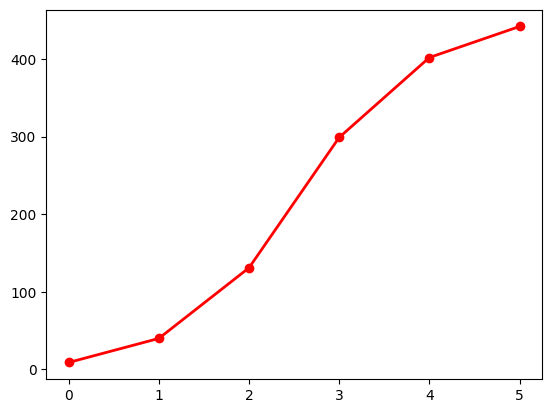

In [211]:
values, base = np.histogram(df_usa['Rating'], bins = 6)
cumulative = np.cumsum(values)

plt.plot(cumulative, color = "red", marker = "o", linewidth = 2)
plt.show()

(2,)


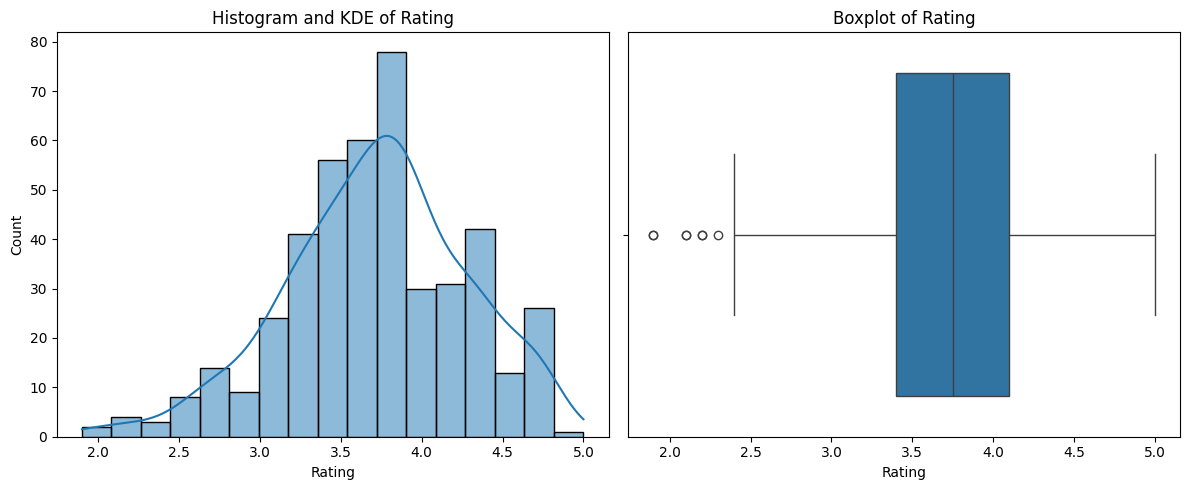

In [212]:
dpf.plot_combined_graphs(df_usa,["Rating"])

(2,)


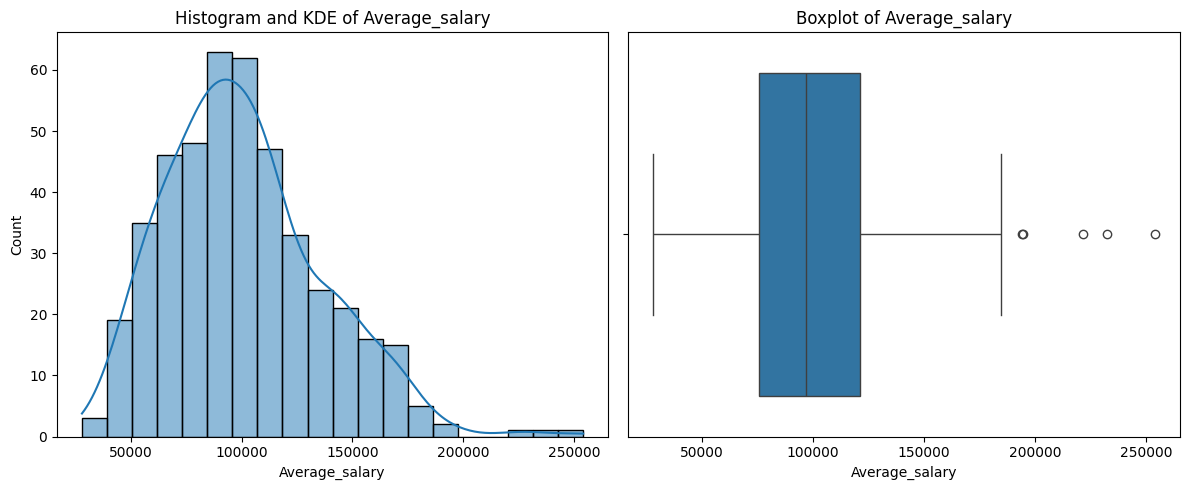

In [213]:
dpf.plot_combined_graphs(df_usa, ['Average_salary'], bins = 20)

##### - Treatment of outliers using the Winsorisation method 

In [214]:
# Define Winsorization limits
limits = [0.0, 0.02]  # 0% lower, as there are no outliers below and 2% higher.

# Apply Winsorization
df_usa['Average_salary'] = mstats.winsorize(df_usa['Average_salary'], limits = limits)

(2,)


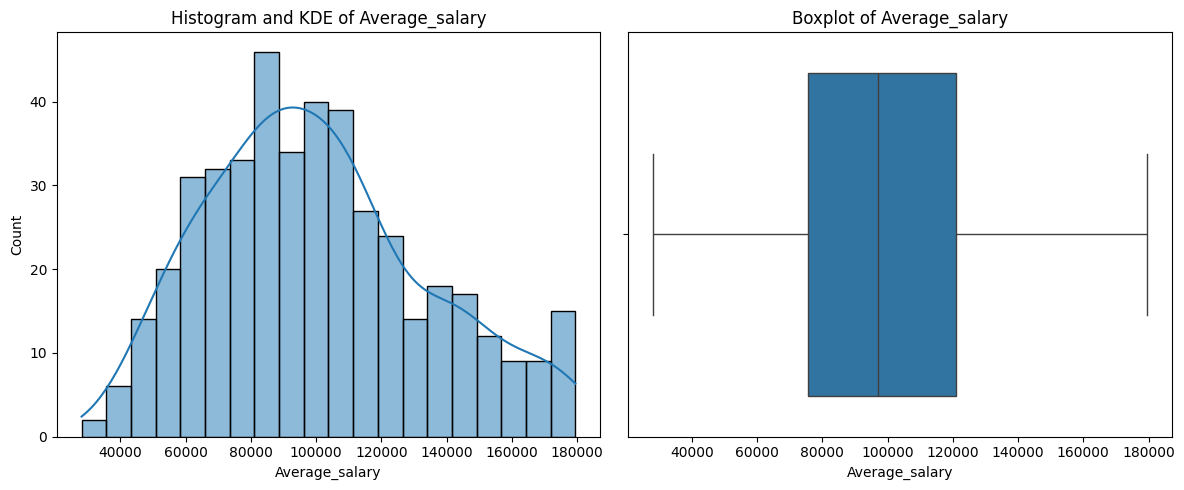

In [215]:
dpf.plot_combined_graphs(df_usa, ['Average_salary'], bins = 20)

<font color='yellow'>

- Most of the jobs pay between **$80k and $120k per year**.

</font>

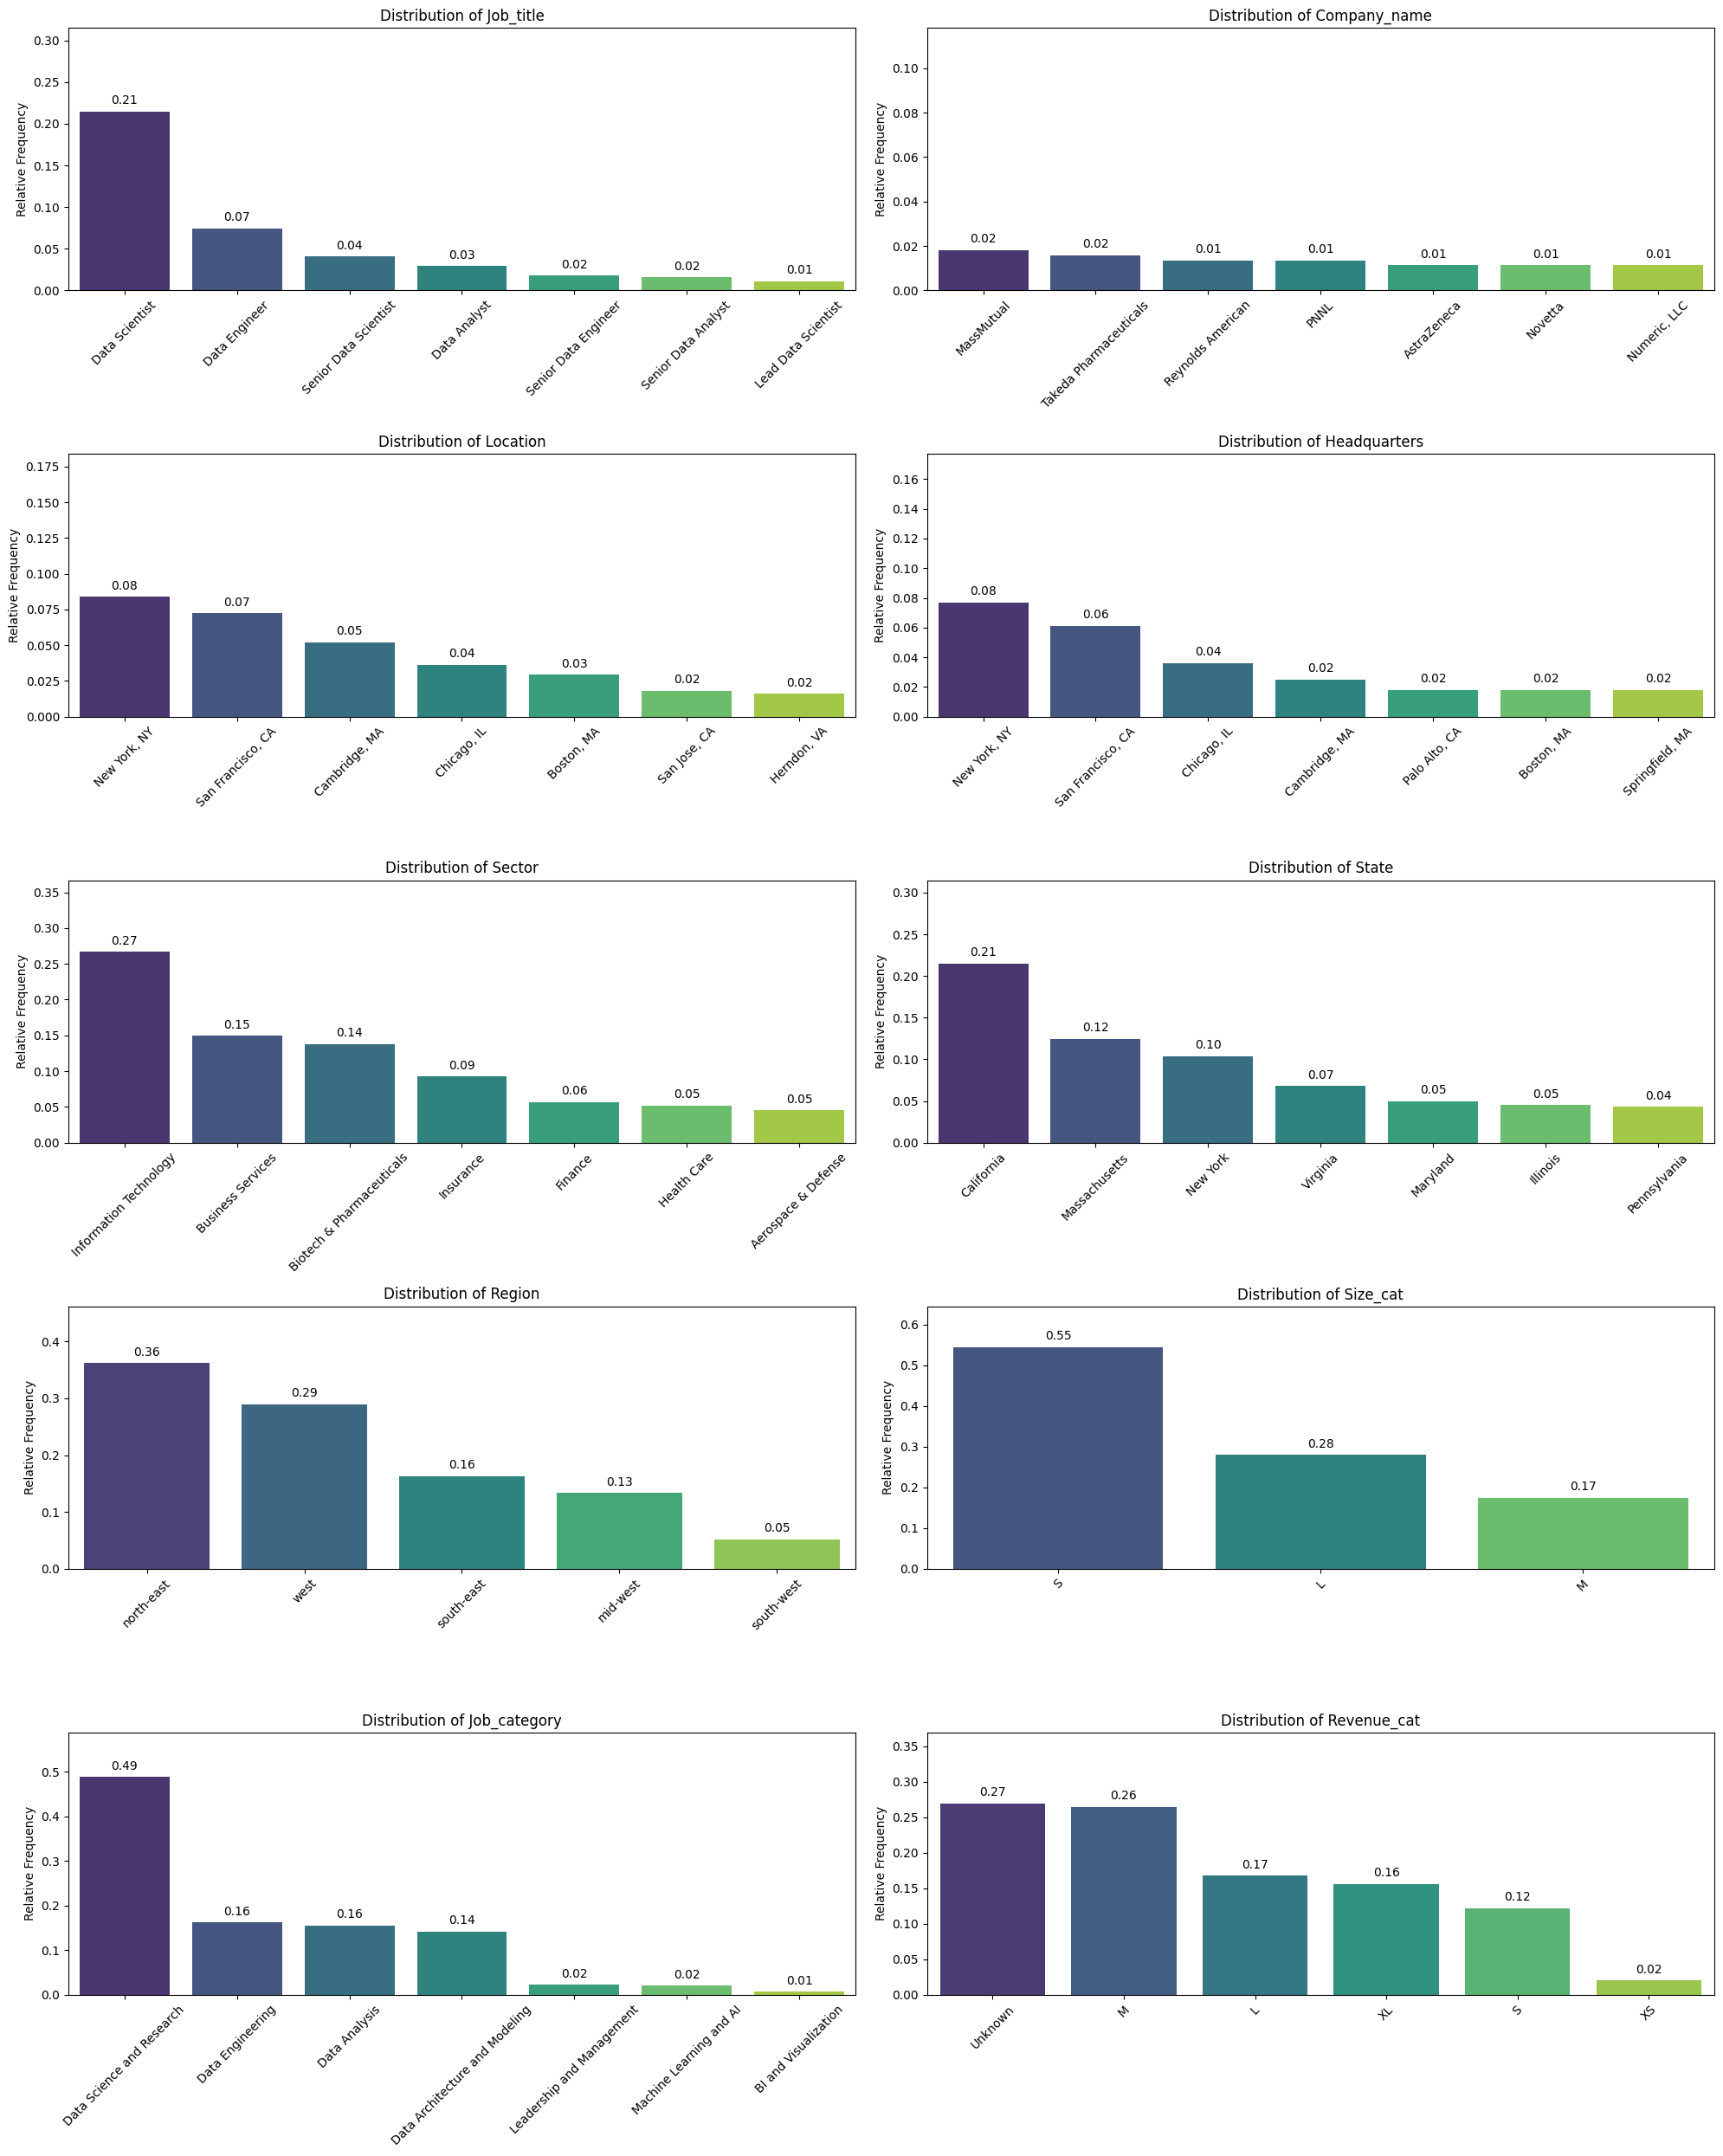

In [216]:
dpf.plot_categorical_distribution(df_usa, usa_cat_cols, relative = True, show_values = True, limit = 7)

<font color='yellow'>

- The most in-demand profiles are **Data Scientists**.

- **New York and San Francisco** are the cities with the most job offers in this sector.

- The state of **California** publishes the most job offers. It probably has something to do with the proximity to Silicon Valley.

- Generally, the **north-east** region has the most job vacancies.

- Most of the companies that require this profile of professionals are **small (less than 200 employees)**.

- Almost half of the job offers are for profiles dedicated to **'Data Science and Research'**.

- More than 25% of the companies that require these professionals earn between $25 million to $500 million annually (**mid-earning companies - M**)

</font>

### 2.2.3. Bivariate analysis

#### 2.2.3.1. Analysis according to salary

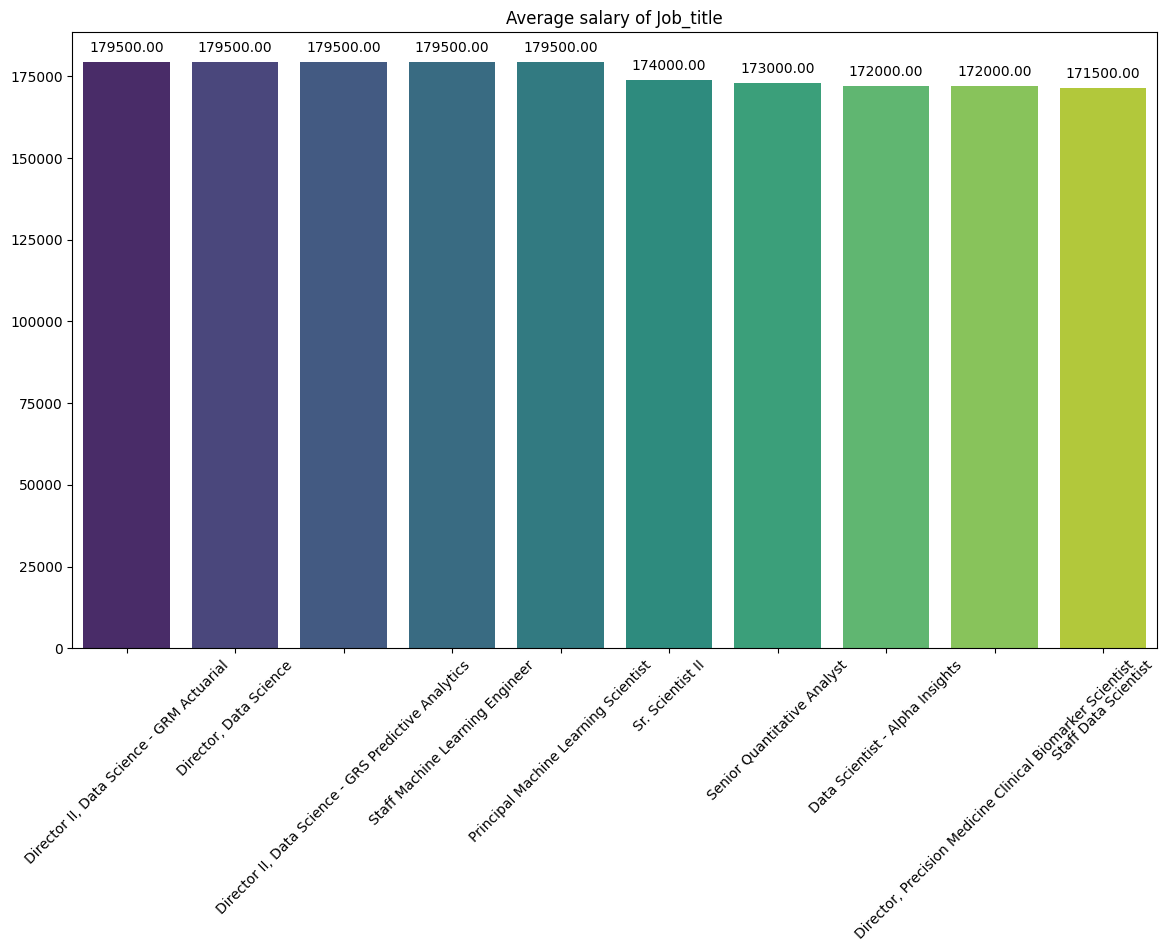

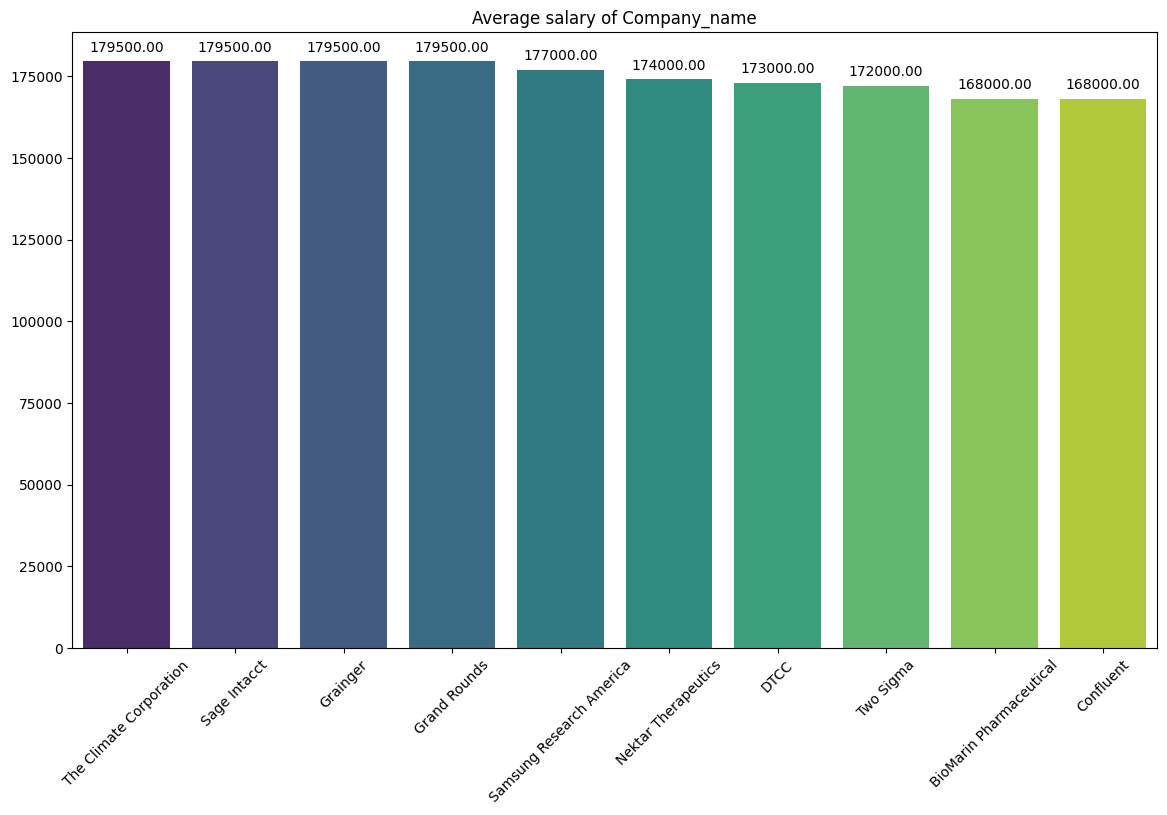

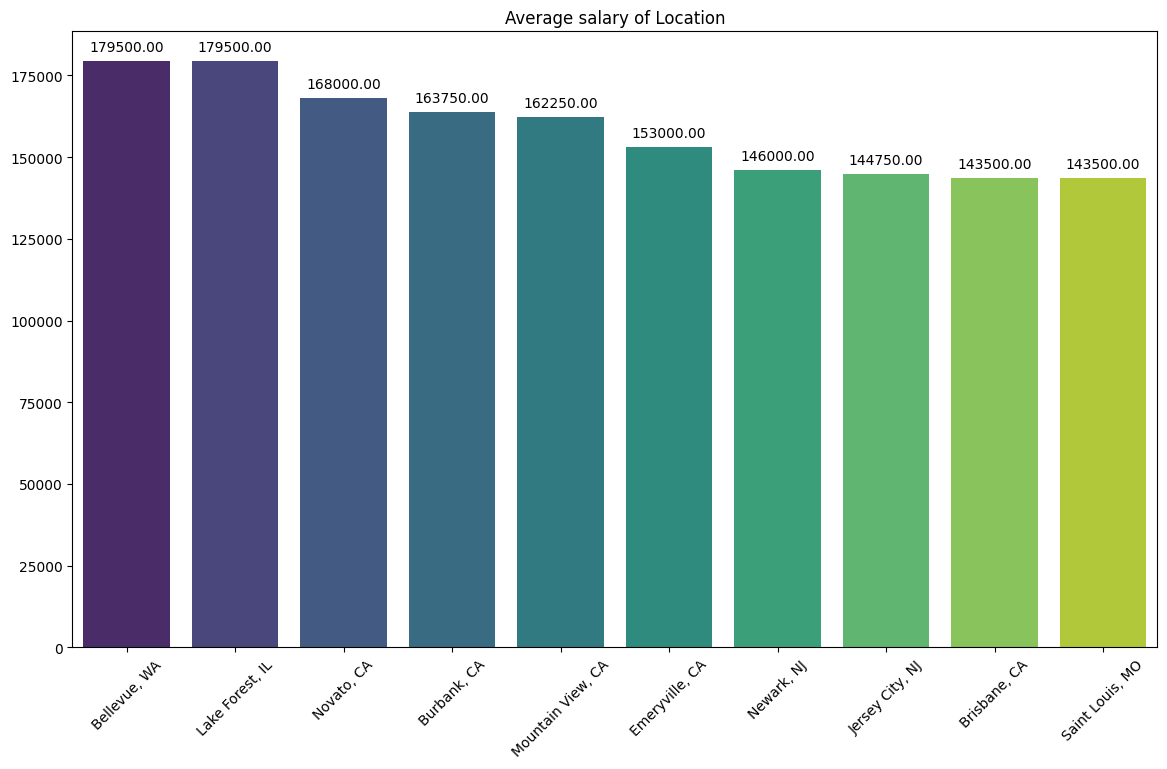

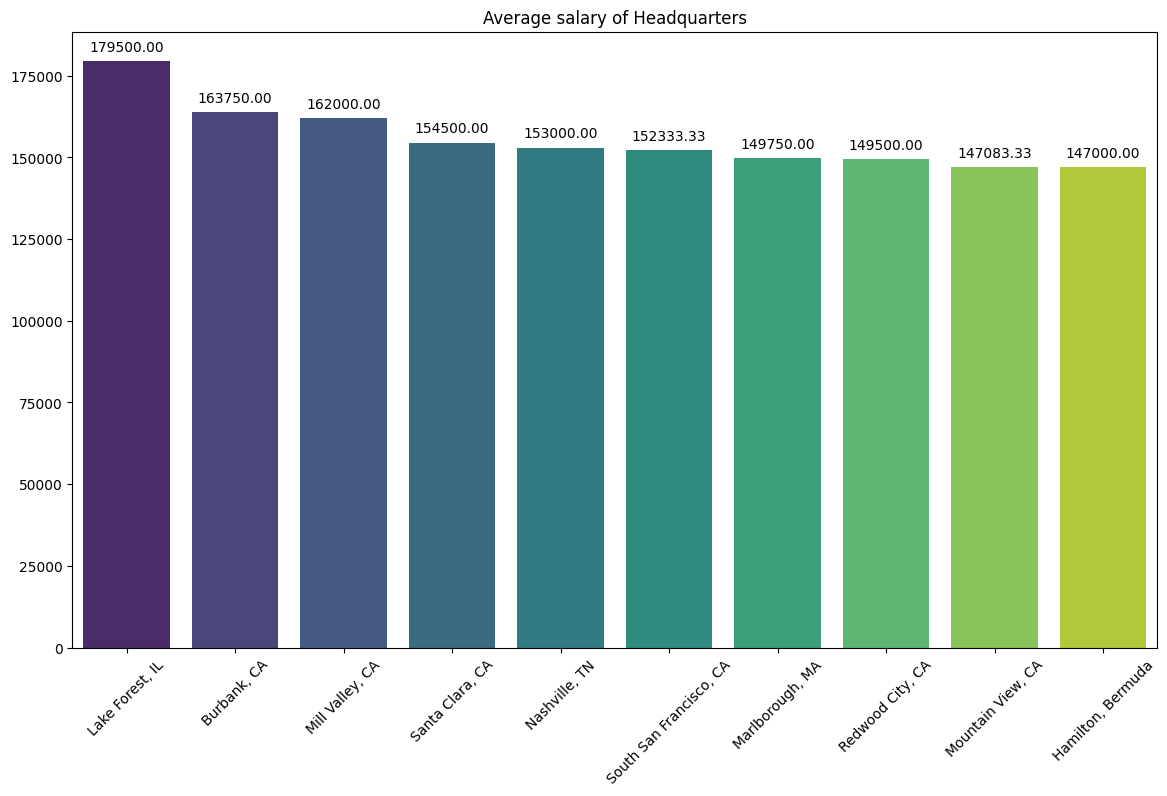

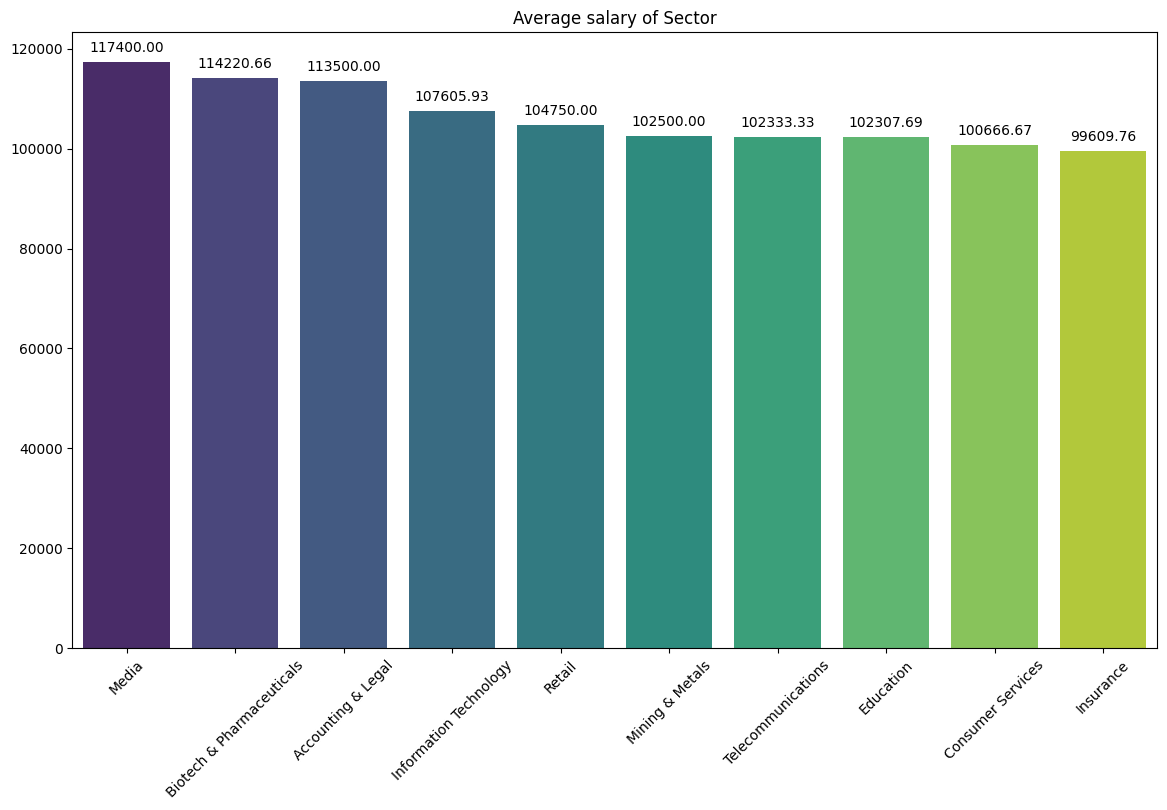

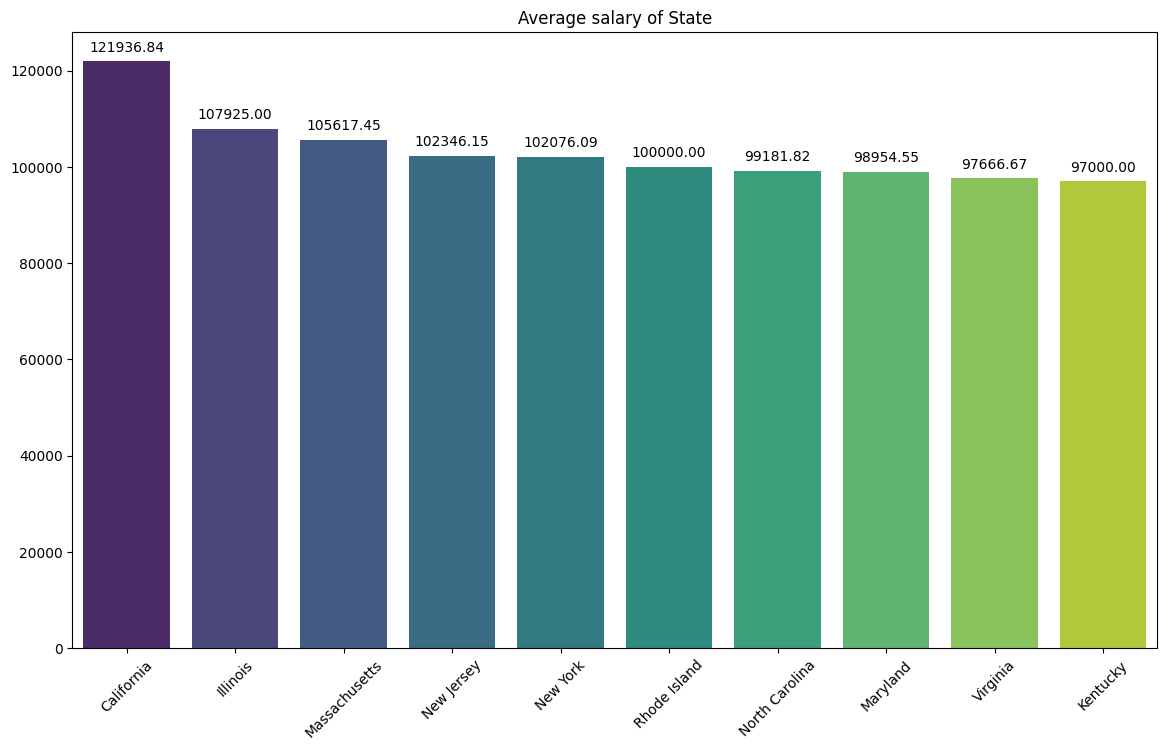

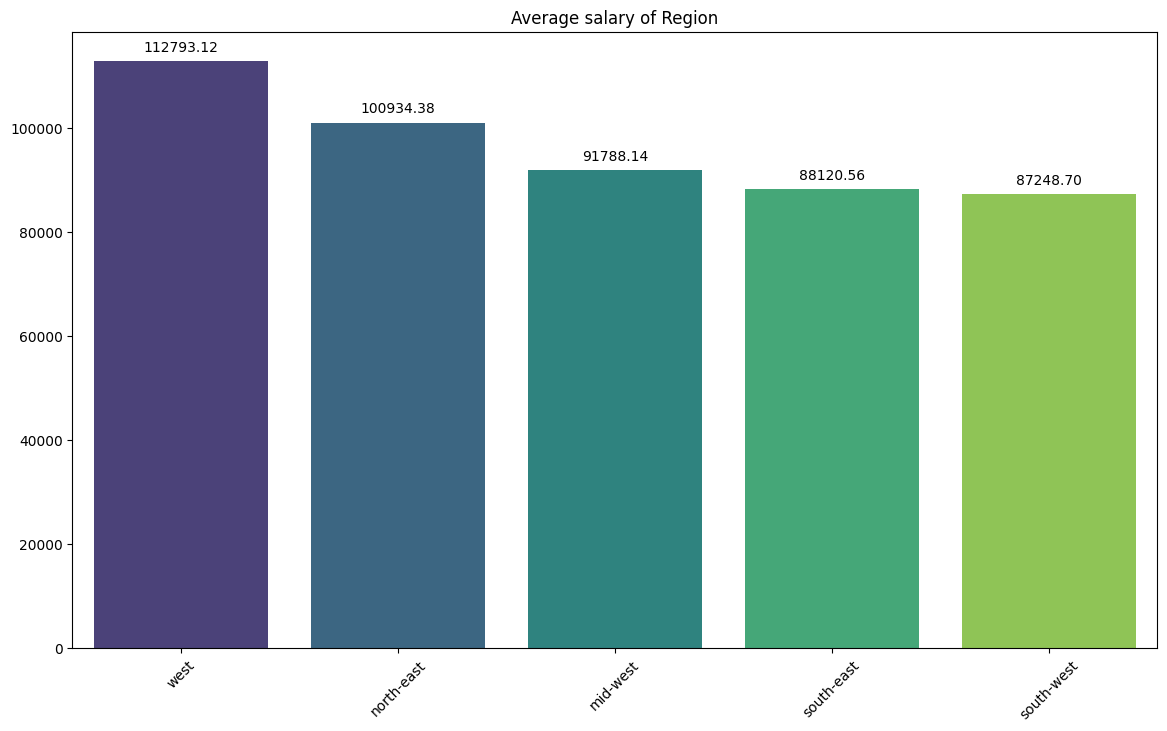

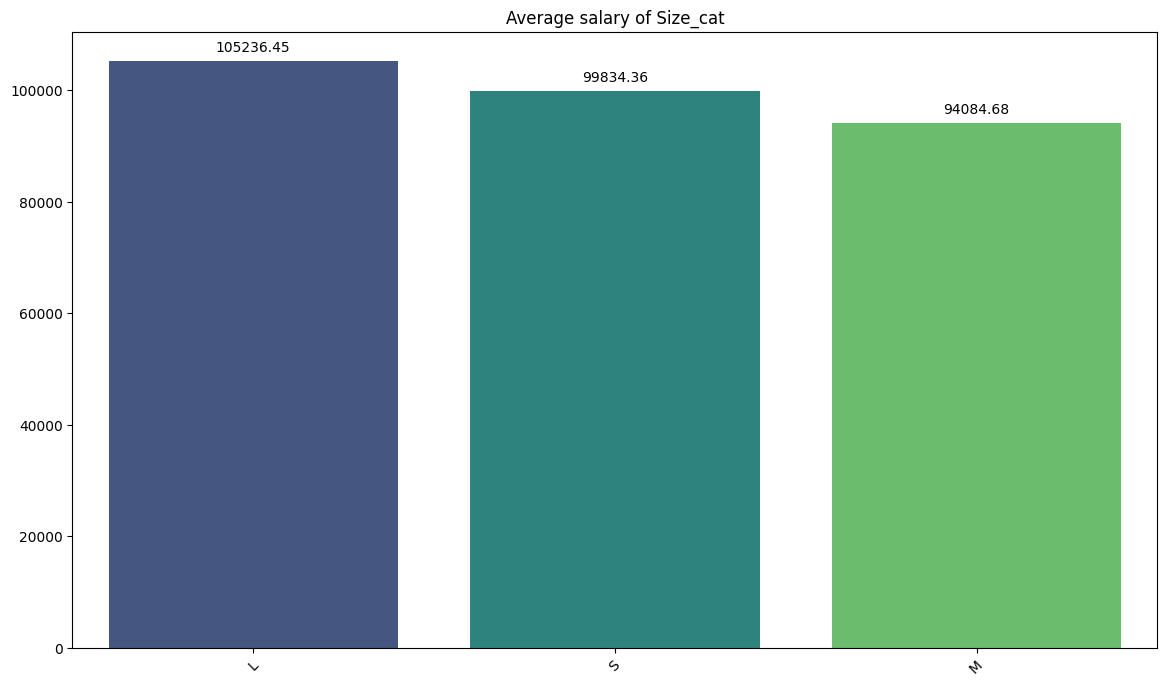

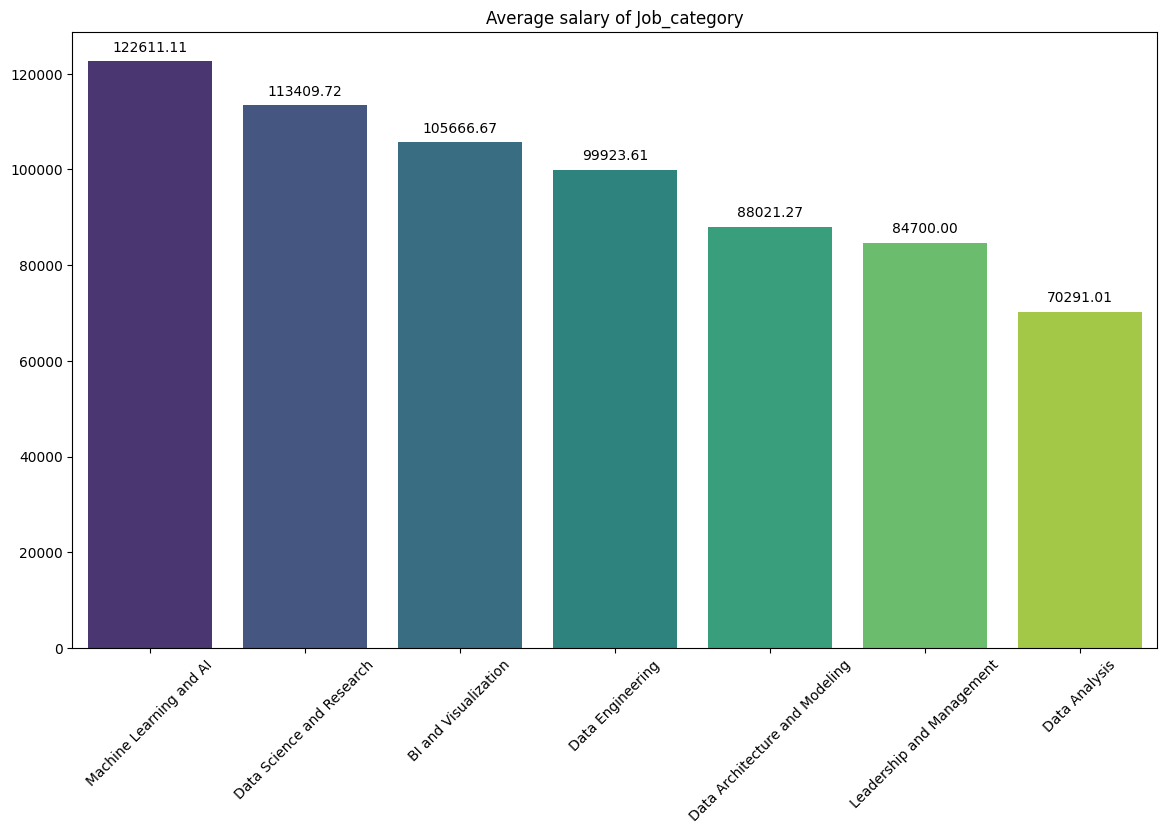

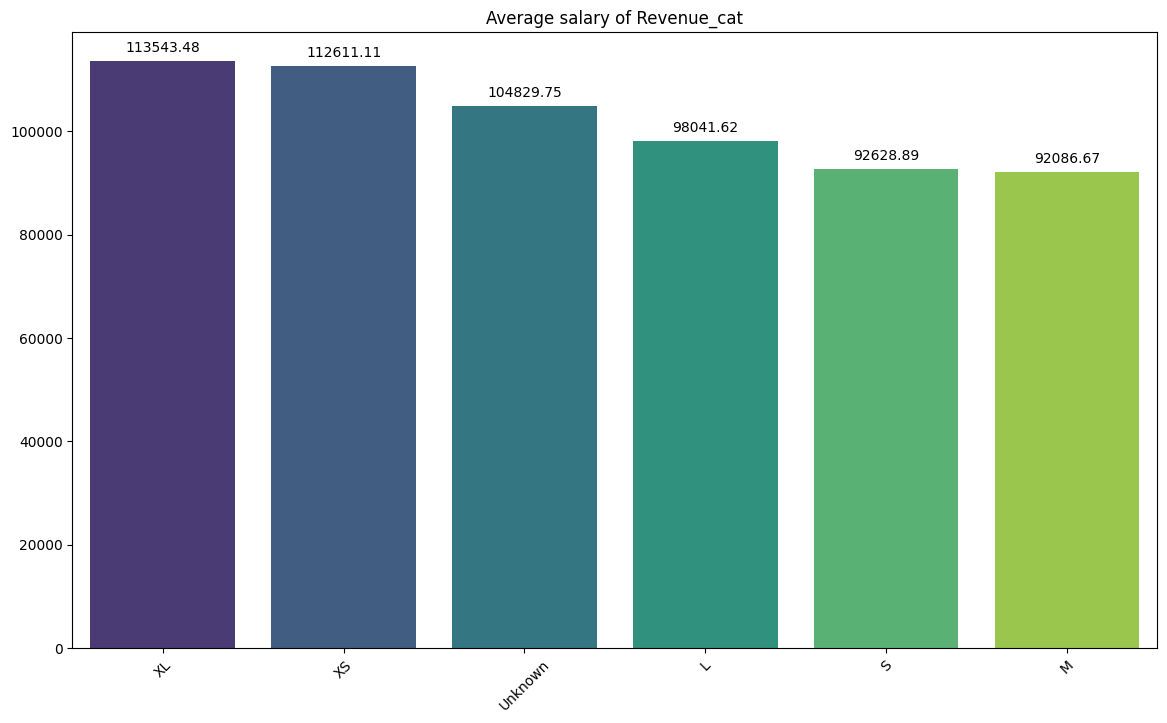

In [217]:
dpf.plot_bar_with_values(data = df_usa, cat_cols = usa_cat_cols, num_col = 'Average_salary', title = 'Average salary of {}', order_func = mean_order);

<font color='yellow'>

- The average salary is highest for employees with a job related to **'Machine Learning and AI', followed by 'Machine Learning and Research'** and those with jobs related to the **'Media', 'Biotech & Pharmaceuticals' and 'Accounting & Legal'** sectors, earning on average around $120K per year.

- The **West** region, specifically the state of **California**, pays the highest salaries to its employees.

- The companies that offer the highest salaries to these professionals are the ones that earn the most (over $10 billion) or, curiously, the least (up to $5 million).

</font>

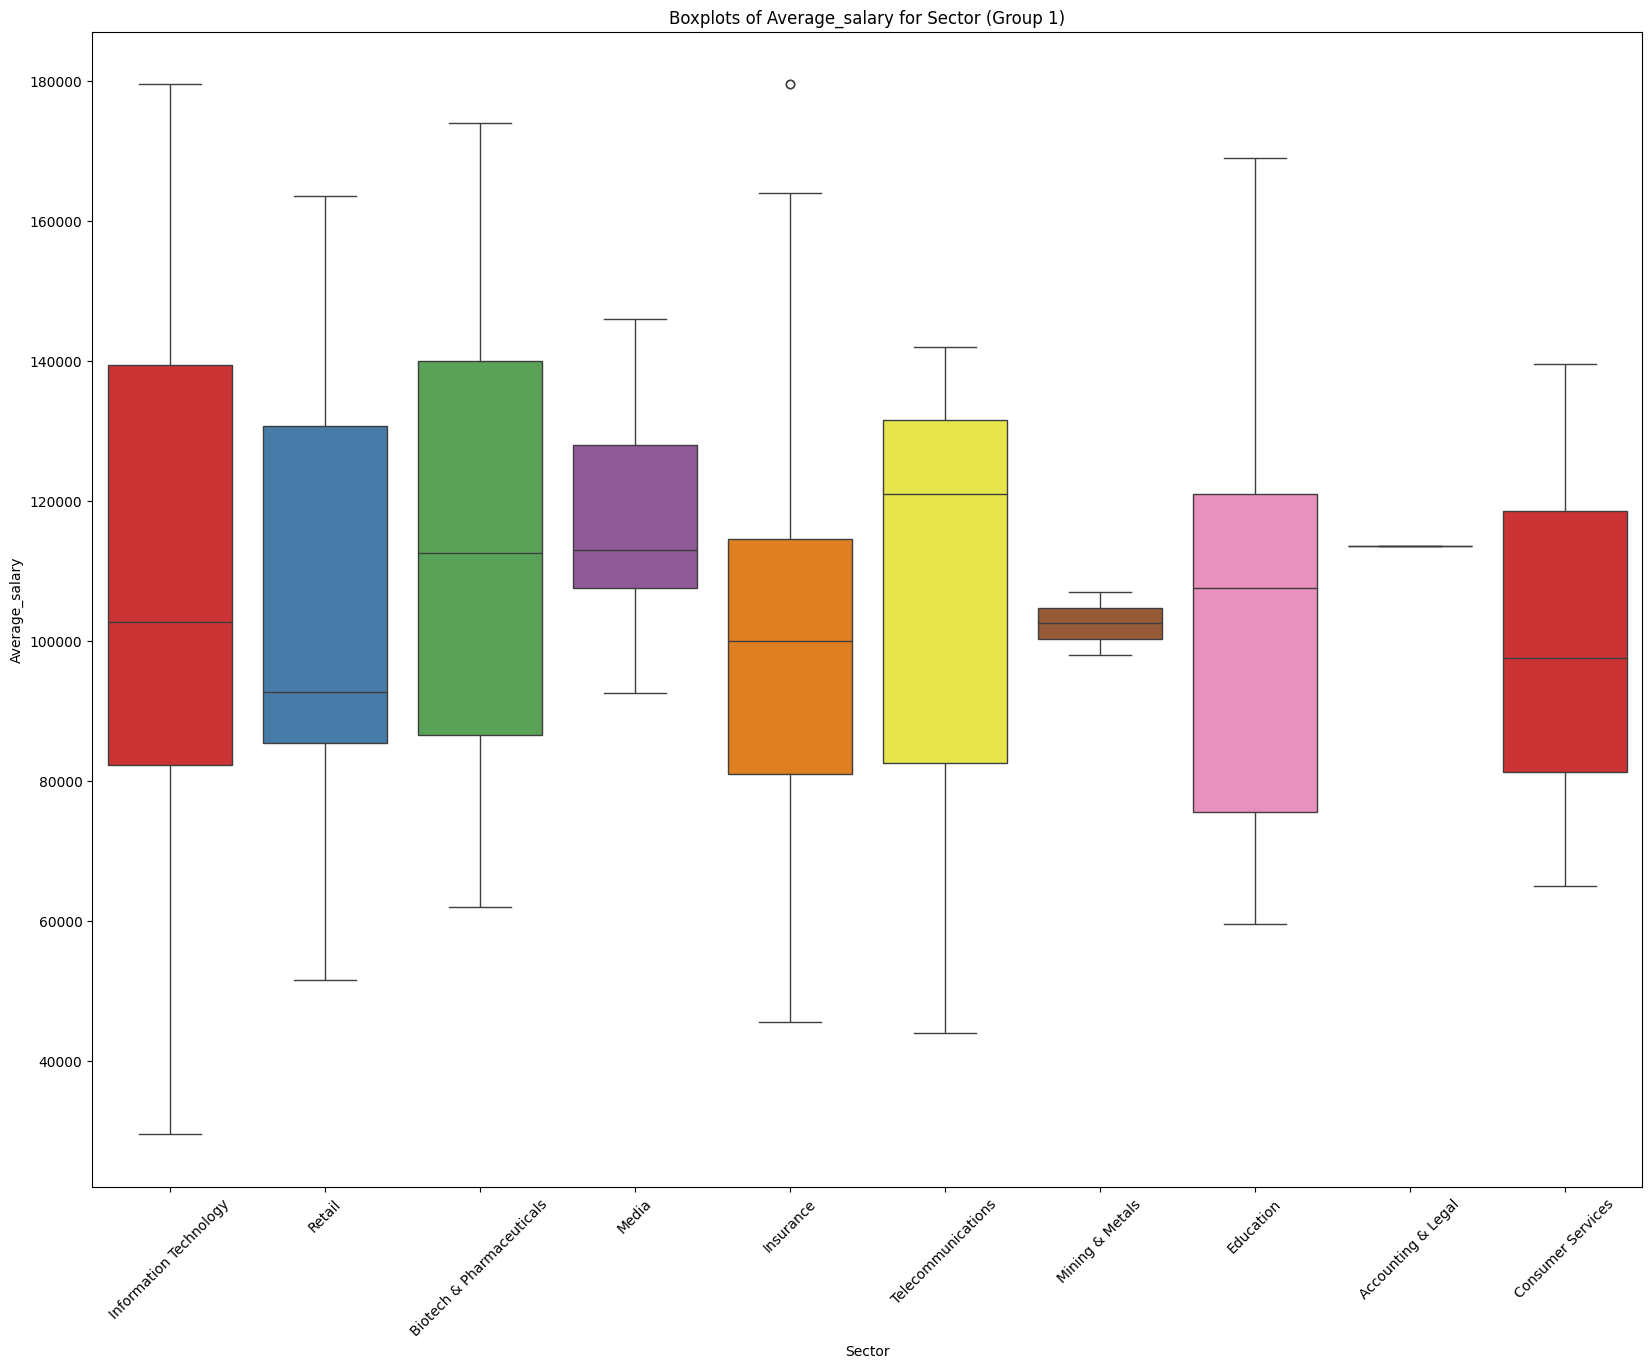

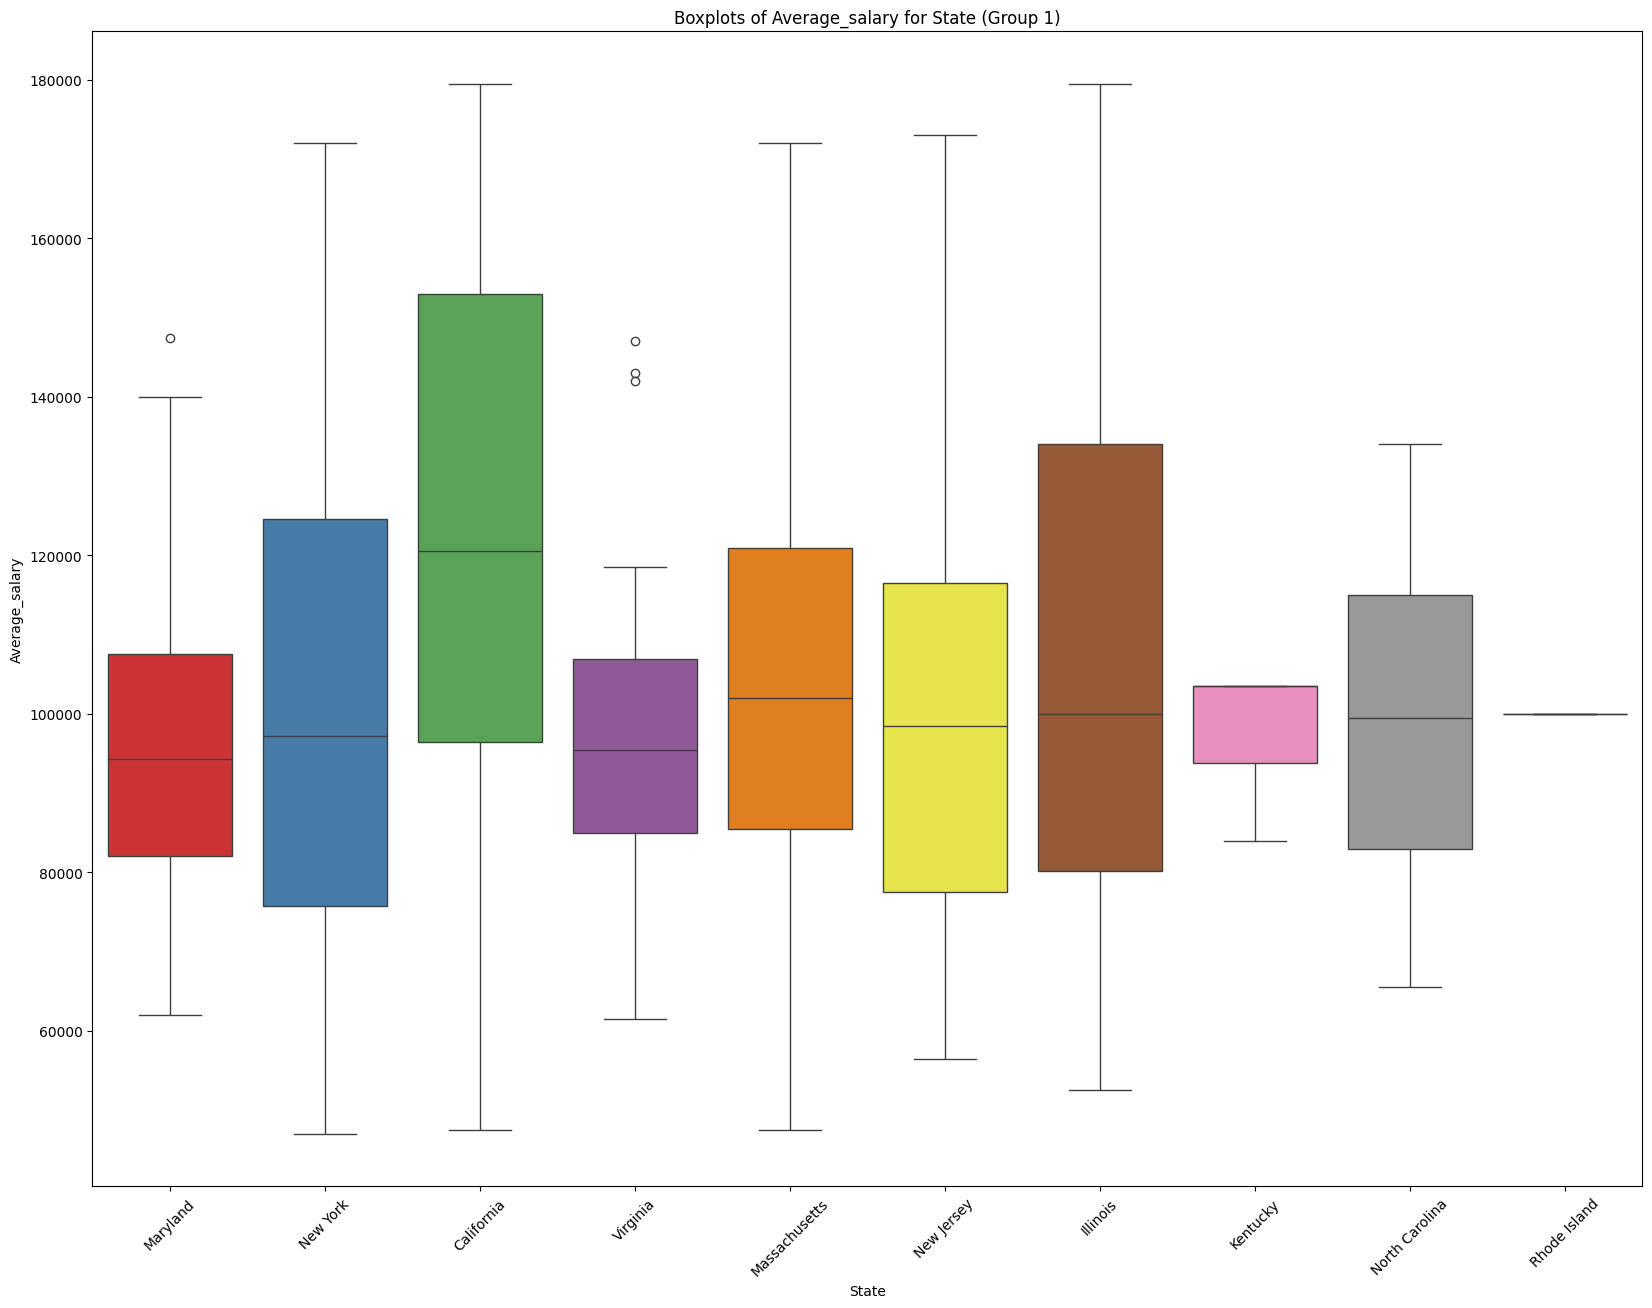

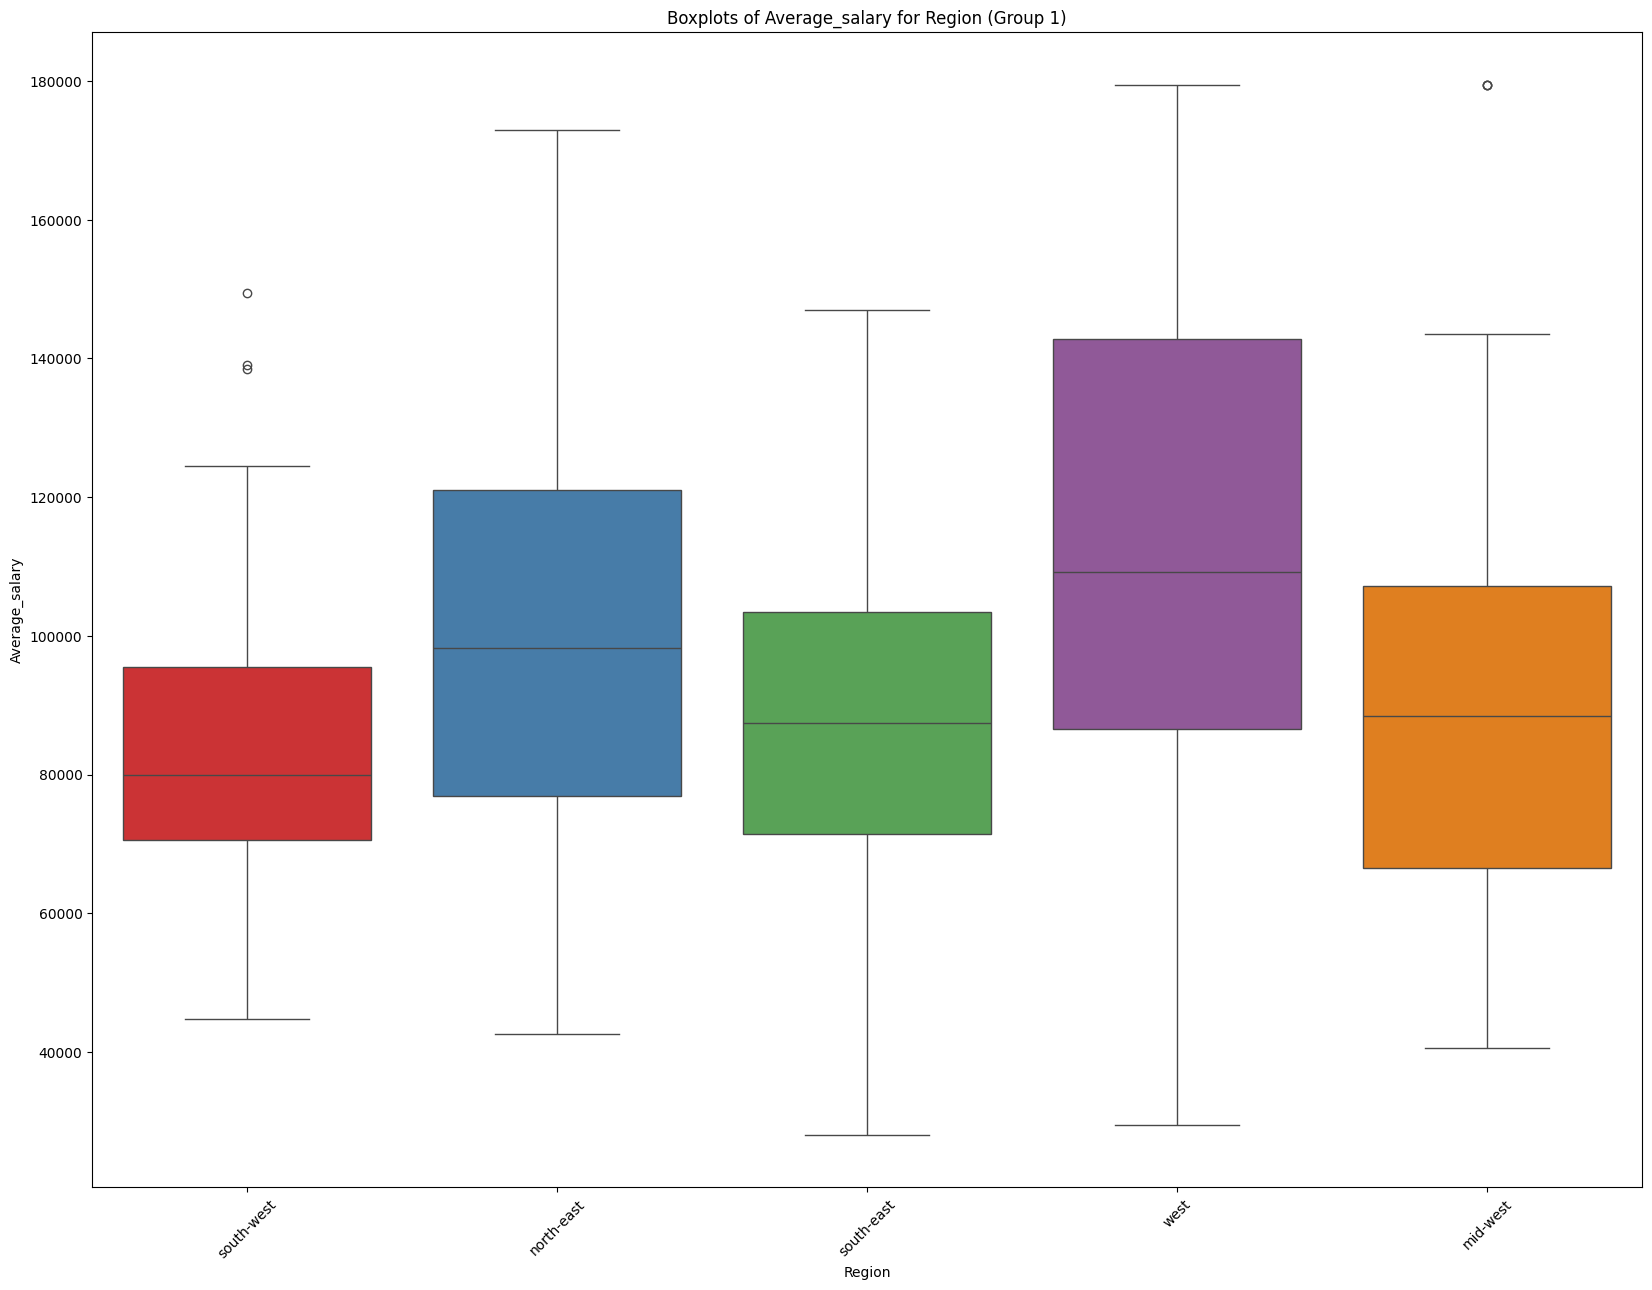

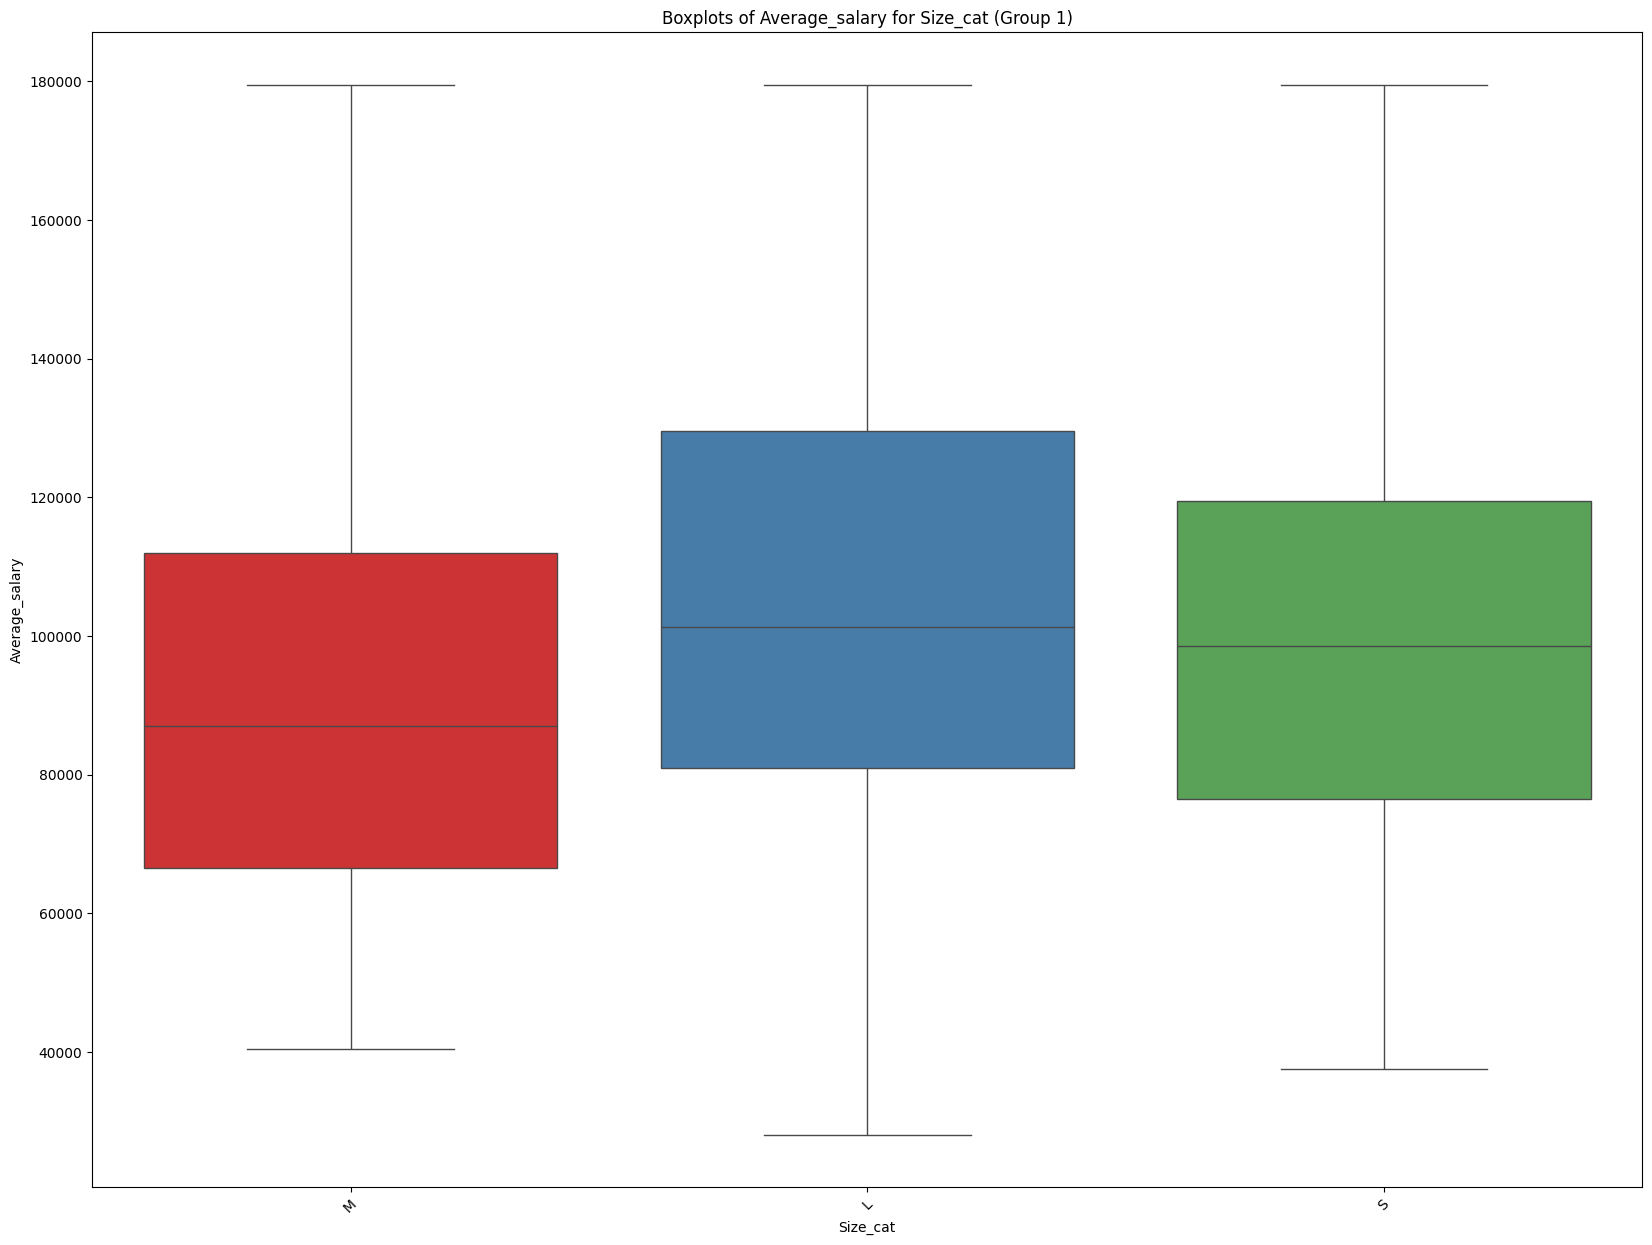

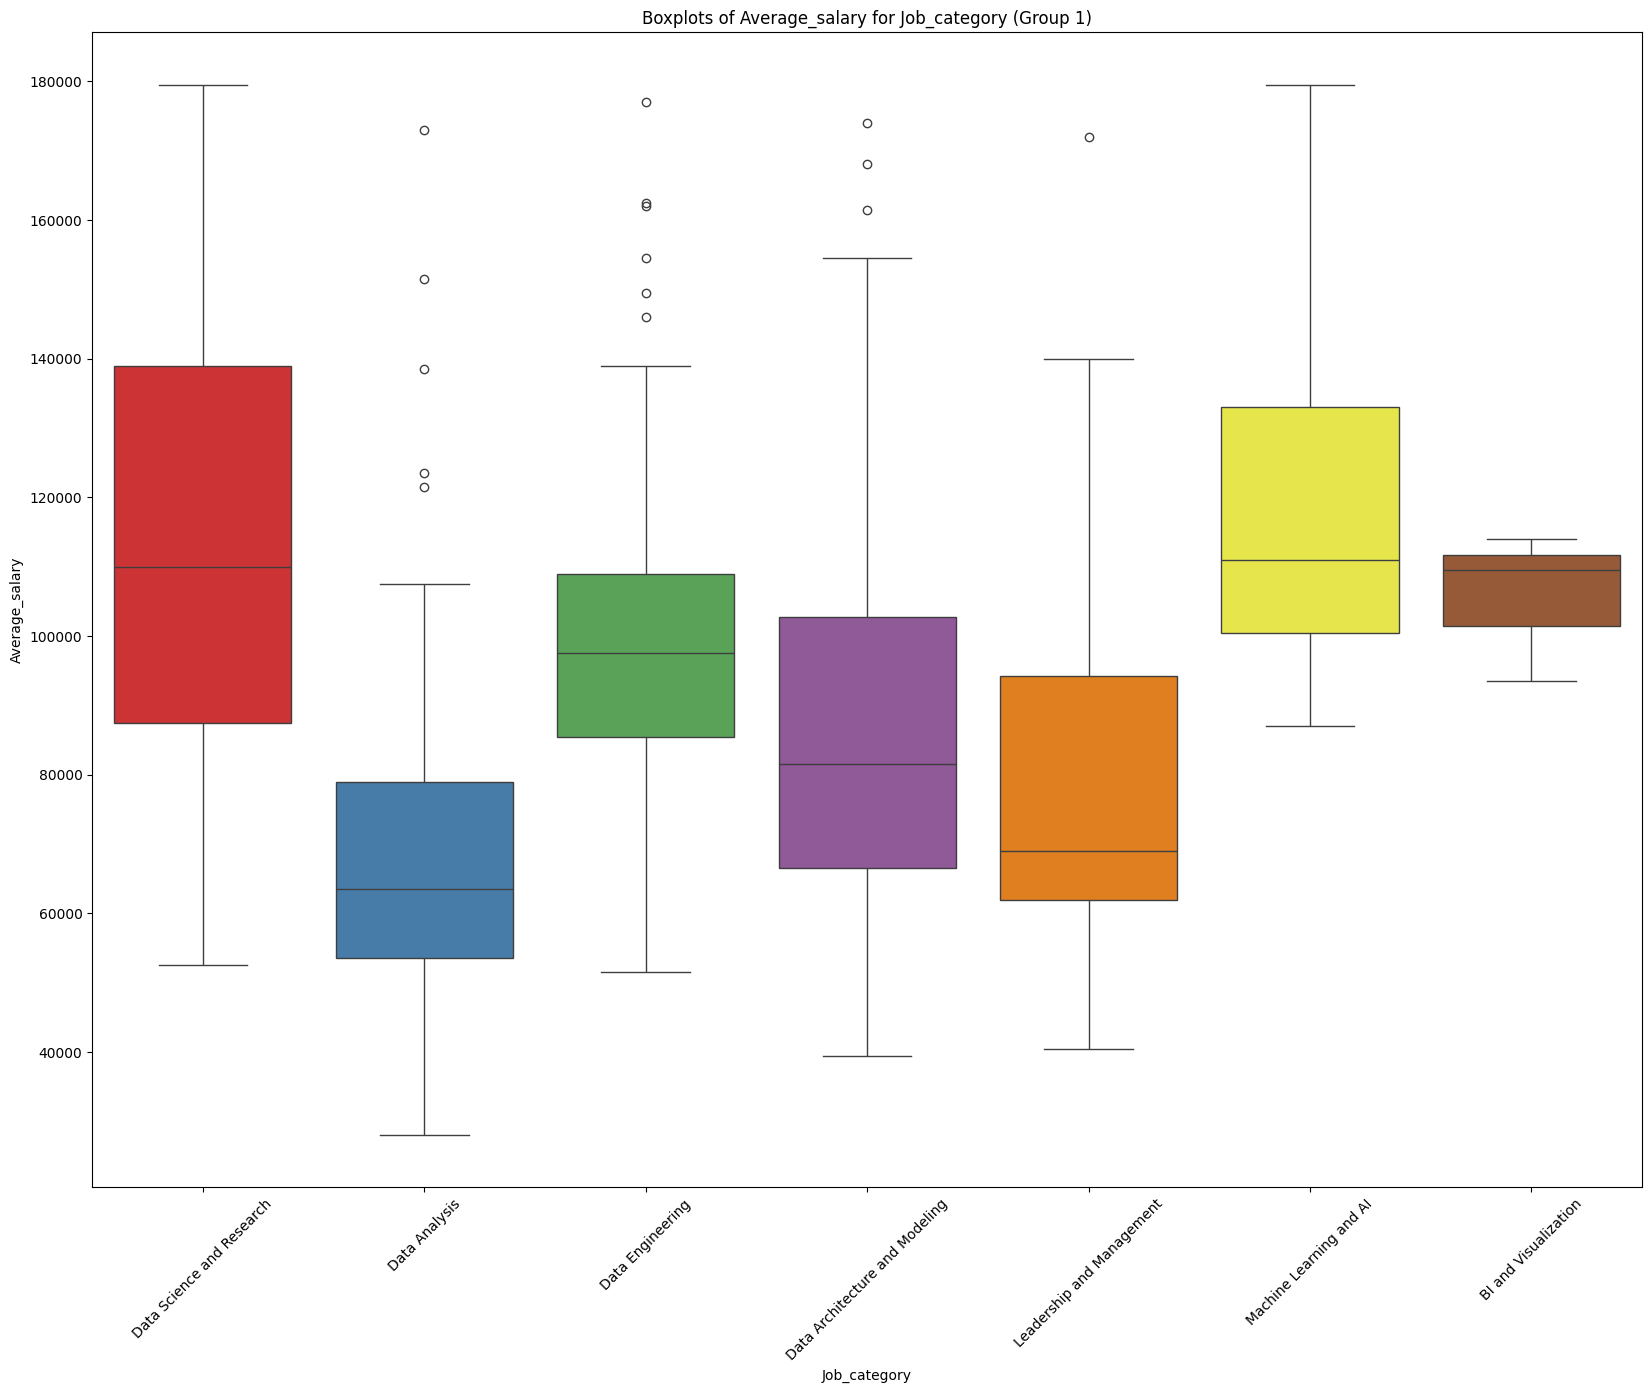

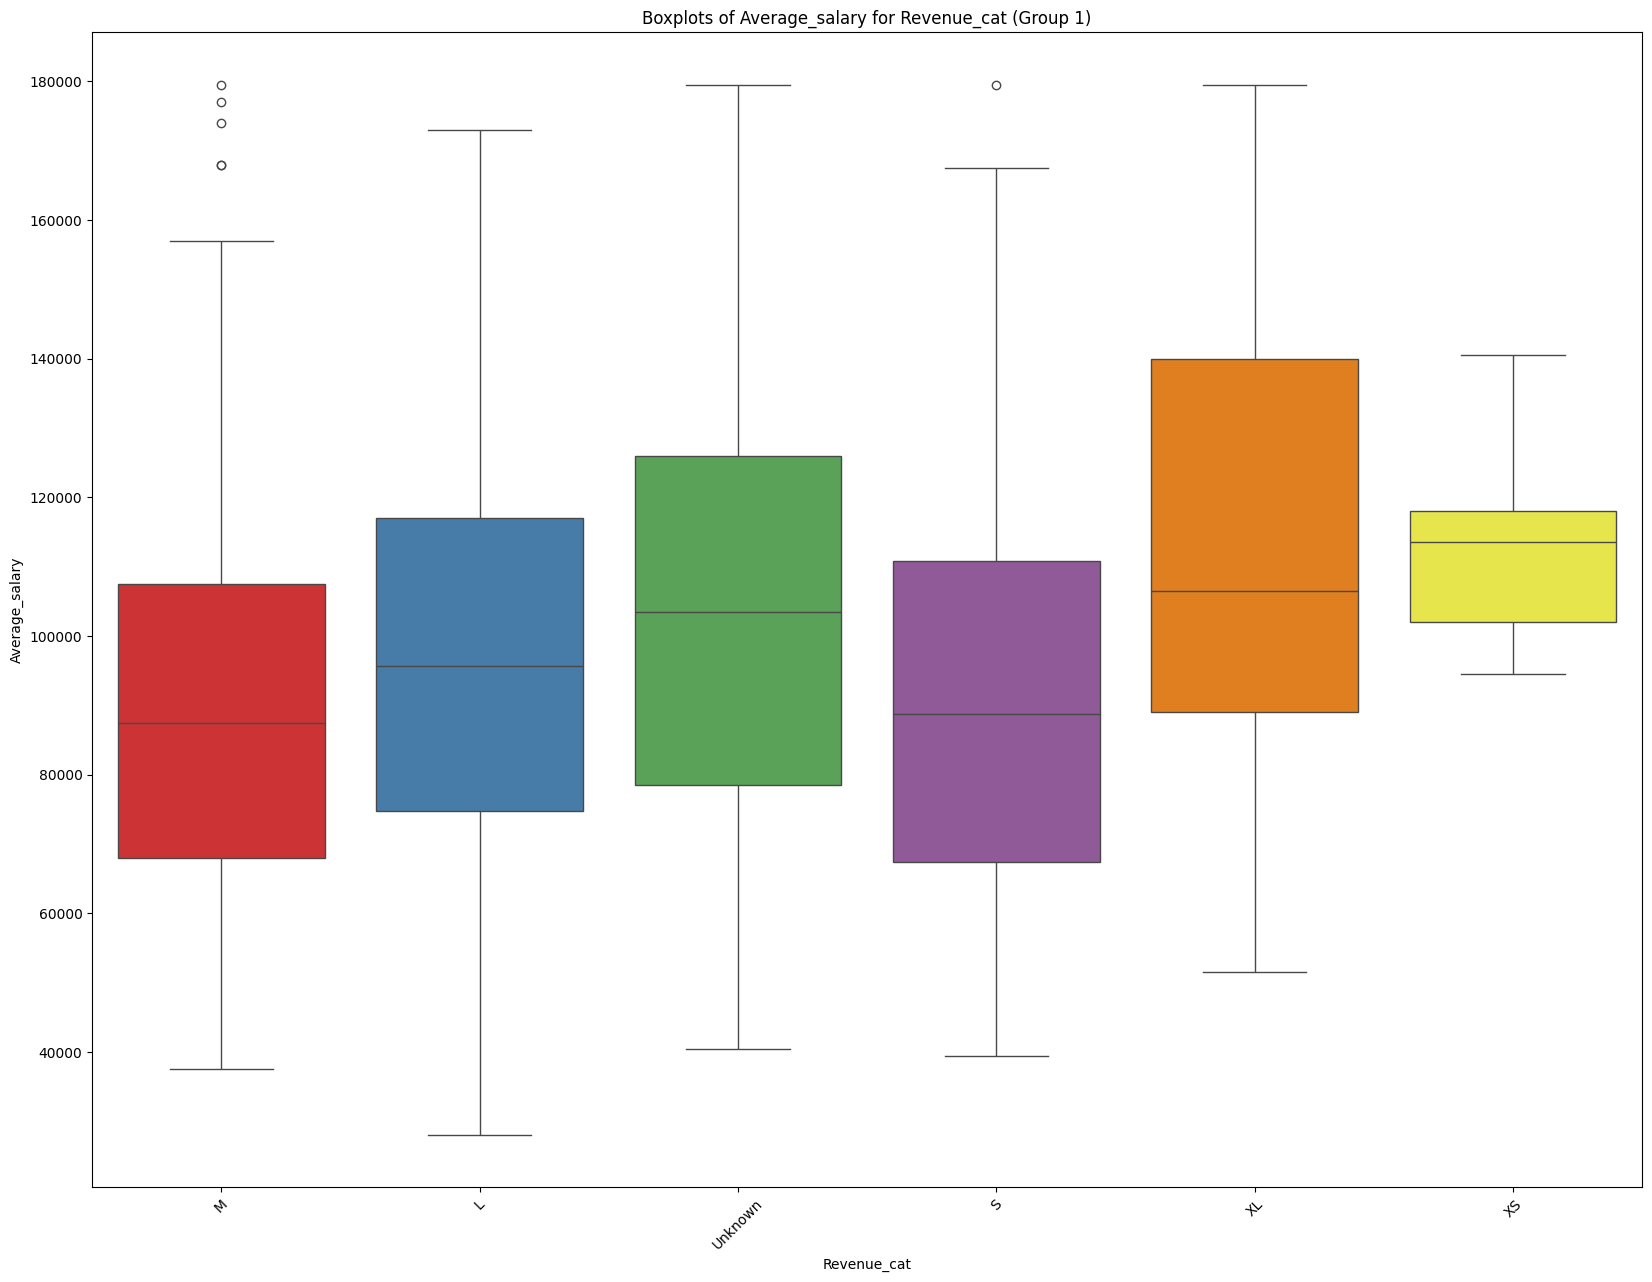

In [218]:
usa_cat_cols2 = [
    'Sector',
    'State',
    'Region',
    'Size_cat',
    'Job_category',
    'Revenue_cat'
]

dpf.plot_grouped_boxplots(df_usa, usa_cat_cols2, num_col = 'Average_salary')

<font color='yellow'>

- **'Information Technology', 'Biotech & Pharmaceuticals', and 'Telecommunications'** are lucrative sectors with **high and varied salaries**, while **'Education' and 'Media' offer lower, but more consistent pay**.

- 'Accounting & Legal' offer a very high salary, but there is little demand for it.

- **California and Illinois** stand out with **high and varied salaries**, while Kentucky and Virginia show lower and more consistent pay. Other states like New York, Massachusetts, and New Jersey offer moderate salaries with varying ranges.

- The **West and Northeast** regions stand out with **high and varied salaries**, while the Southwest and Southeast regions show lower and more consistent pay. The Midwest offers moderate salaries with a fairly wide range.

- **Data Science and Research**, as well as **Machine Learning and AI**, offer the **highest median salaries**. Leadership and Management roles also provide a wide range of salaries, indicating variability based on experience or company. Data Analysis and BI and Visualization roles tend to have lower and more consistent salaries.

</font>

In [240]:
# Group the data by 'company_location' and calculate the average wage
usa_states_salary_data = df_usa.groupby('State')['Average_salary'].mean().reset_index()

# Download the GeoJSON country file
usa_geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
usa_geojson_data = requests.get(usa_geojson_url).json()

# Create the map centred on an initial location
map2 = folium.Map(location = [37.8, -96], zoom_start = 4)

# Add the layer of choropleths
folium.Choropleth(
    geo_data = usa_geojson_data,
    name = 'choropleth',
    data = usa_states_salary_data,
    columns = ['State', 'Average_salary'],
    key_on = 'feature.properties.name',
    fill_color = 'OrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Average salary in USD'
).add_to(map2)

# Add control layer
folium.LayerControl().add_to(map2)

# Save the map
map2.save('../img/usa_salary_map.html')

map2

#### 2.2.3.2. Analysis according to company region

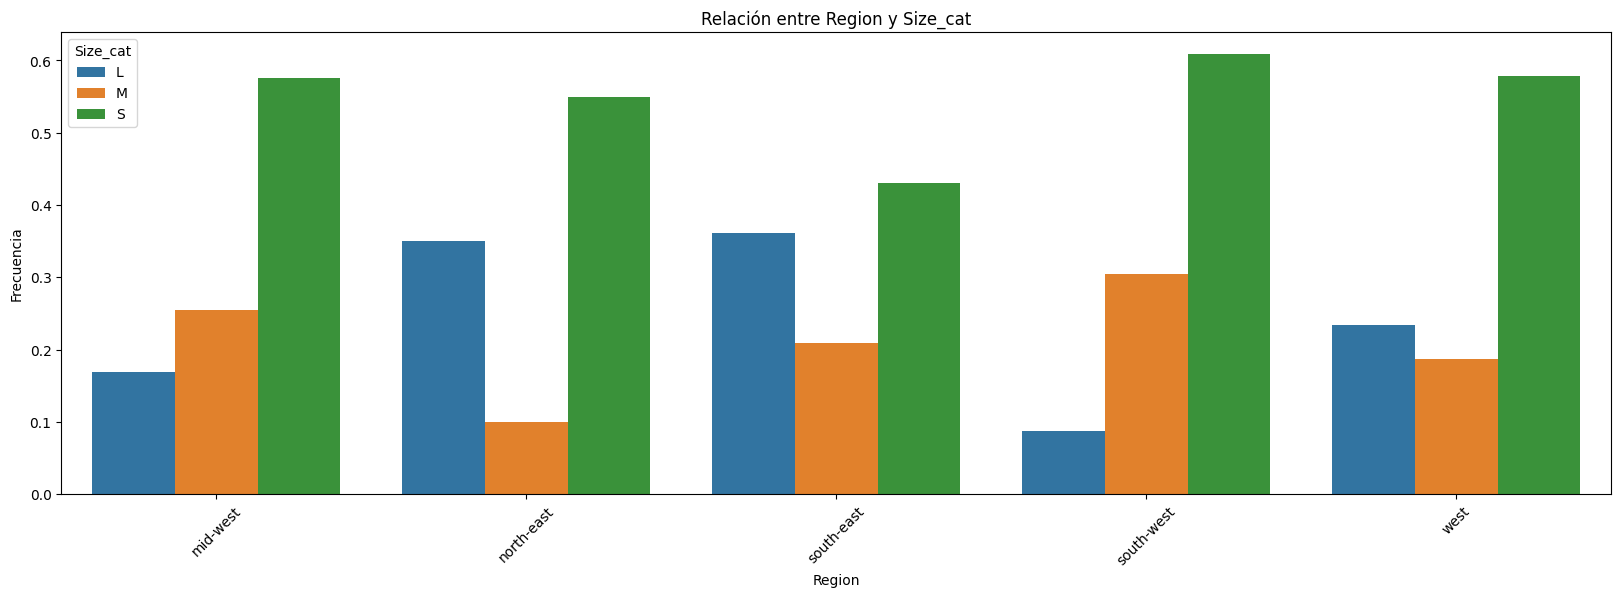

In [220]:
dpf.plot_categorical_relationship_fin(df_usa, cat_col1 = 'Region', cat_col2 = 'Size_cat', relative_freq = True)

In all cases if P-Value < 0.05 we reject the null hypothesis that there is no difference between the means and conclude that there is a significant difference.

In [221]:
contingency_table = pd.crosstab(df_usa['Region'], df_usa['Size_cat'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 23.4011568567108
P-Value: 0.0028856364046715
Degrees of Freedom: 8
Expected Frequency Table:
 [[16.5520362  10.27828054 32.16968326]
 [44.88687783 27.87330317 87.239819  ]
 [20.19909502 12.54298643 39.25791855]
 [ 6.45248869  4.00678733 12.54072398]
 [35.90950226 22.29864253 69.7918552 ]]


<font color='yellow'>

- In all regions, the predominant size of company requiring these professionals is the **small company**.

</font>

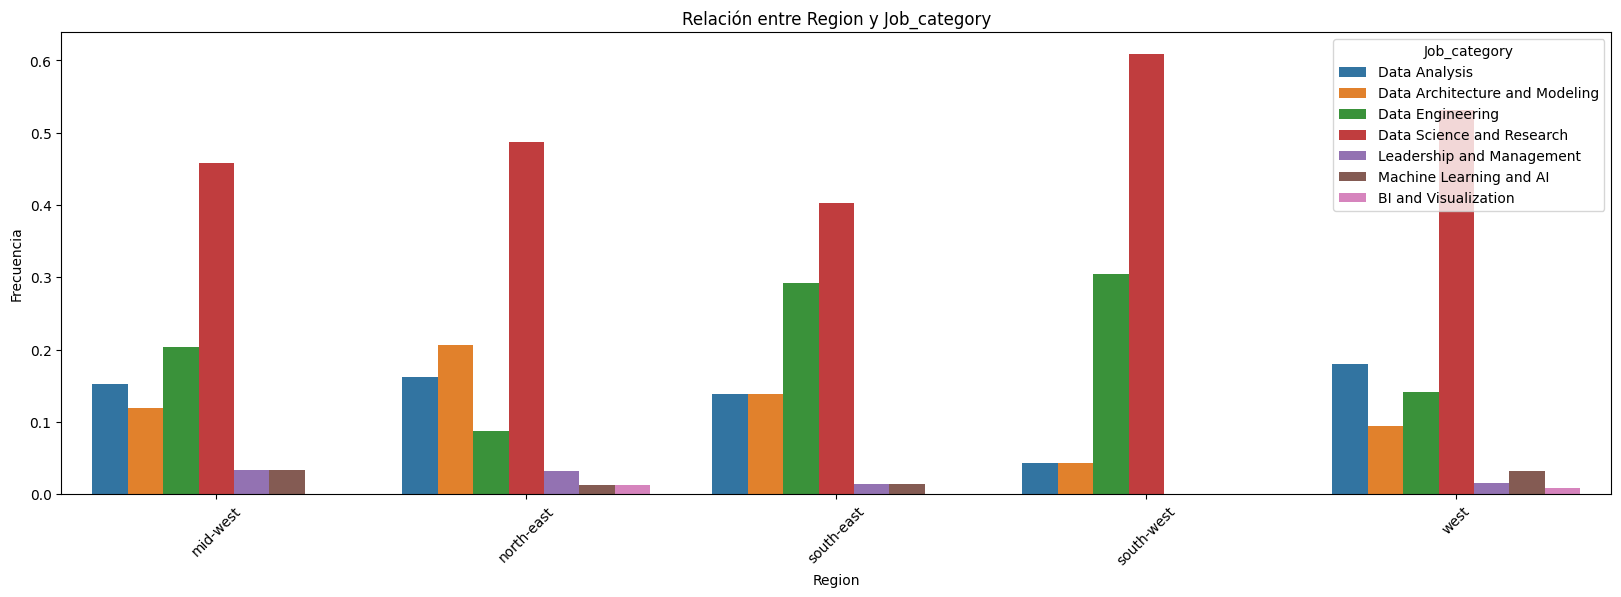

In [222]:
dpf.plot_categorical_relationship_fin(df_usa, cat_col1 = 'Region', cat_col2 = 'Job_category', relative_freq = True, size_group = 10)

In [223]:
contingency_table = pd.crosstab(df_usa['Region'], df_usa['Job_category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 36.21779963154747
P-Value: 0.052273001547642424
Degrees of Freedom: 24
Expected Frequency Table:
 [[ 0.40045249  9.21040724  8.40950226  9.61085973 28.83257919  1.33484163
   1.20135747]
 [ 1.08597285 24.97737557 22.80542986 26.06334842 78.19004525  3.6199095
   3.25791855]
 [ 0.48868778 11.239819   10.26244344 11.72850679 35.18552036  1.62895928
   1.46606335]
 [ 0.1561086   3.59049774  3.27828054  3.74660633 11.239819    0.52036199
   0.46832579]
 [ 0.86877828 19.98190045 18.24434389 20.85067873 62.5520362   2.8959276
   2.60633484]]


<font color='yellow'>

- In all regions the most in-demand job is in the 'Data Science and Research' category, although this conclusion cannot be extrapolated to the whole population.

</font>

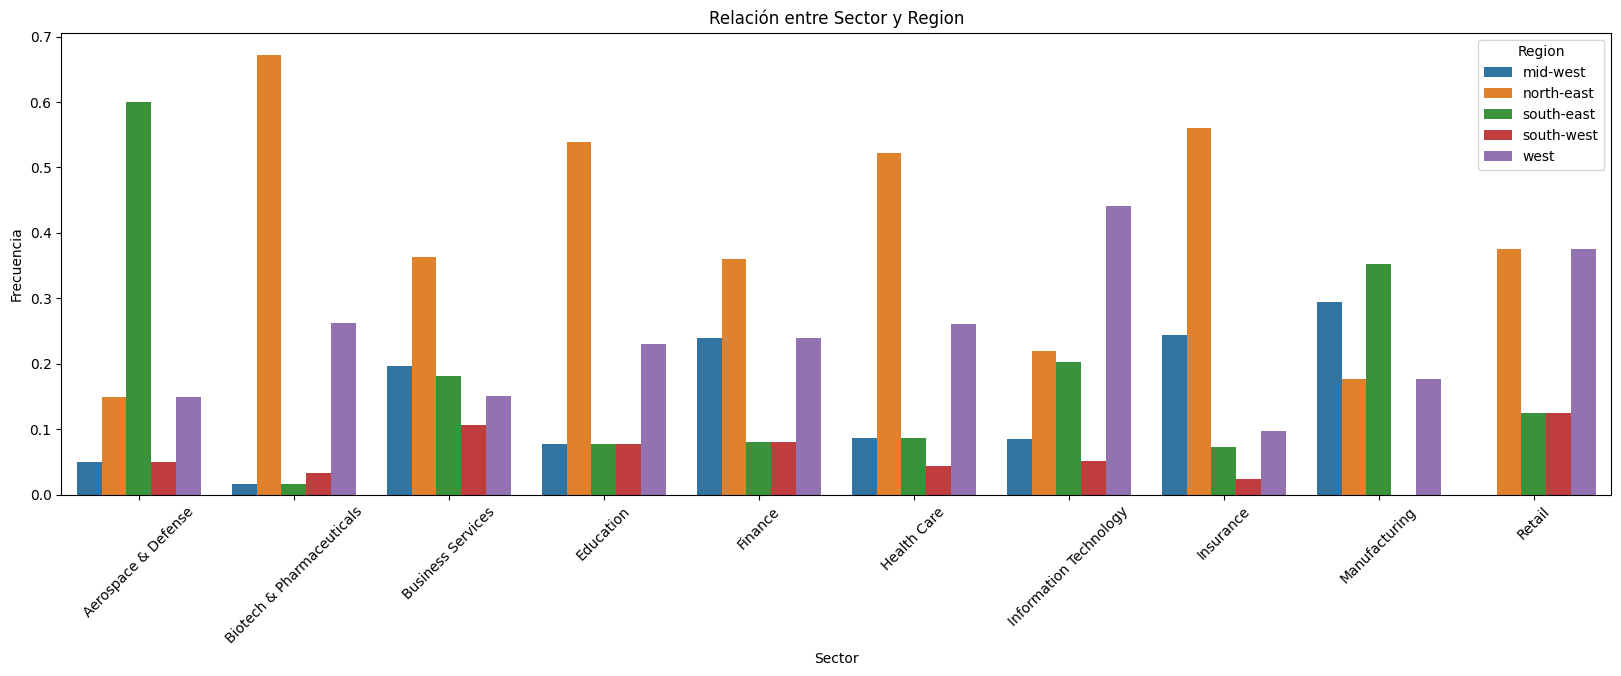

In [224]:
# Filter cat_col2 to include only the top 10 categories if more than 5 exist
usa_top_cat_col2_values_loc = df_usa['Sector'].value_counts().nlargest(10).index
usa_count_data_loc = df_usa[df_usa['Sector'].isin(usa_top_cat_col2_values_loc)]

dpf.plot_categorical_relationship_fin(usa_count_data_loc, cat_col1 = 'Sector', cat_col2 = 'Region', relative_freq = True, size_group = 10)

In [225]:
contingency_table = pd.crosstab(df_usa['Region'], df_usa['Sector'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 215.3511103782694
P-Value: 1.1327479190384407e-12
Degrees of Freedom: 88
Expected Frequency Table:
 [[ 0.13348416  2.66968326  0.13348416  0.13348416  8.14253394  8.80995475
   0.40045249  1.73529412  3.33710407  0.93438914  3.07013575 15.75113122
   5.47285068  2.26923077  0.66742081  0.26696833  0.93438914  1.0678733
   0.40045249  1.0678733   0.40045249  0.53393665  0.66742081]
 [ 0.36199095  7.239819    0.36199095  0.36199095 22.08144796 23.89140271
   1.08597285  4.70588235  9.04977376  2.53393665  8.32579186 42.71493213
  14.84162896  6.15384615  1.80995475  0.7239819   2.53393665  2.8959276
   1.08597285  2.8959276   1.08597285  1.4479638   1.80995475]
 [ 0.16289593  3.25791855  0.16289593  0.16289593  9.93665158 10.75113122
   0.48868778  2.11764706  4.07239819  1.14027149  3.74660633 19.22171946
   6.67873303  2.76923077  0.81447964  0.32579186  1.14027149  1.30316742
   0.48868778  1.30316742  0.48868778  0.65158371  0.81447964]
 [ 0.0520362   1.04072398  

<font color='yellow'>

- The graph shows that the north-east leads in 'Biotech & Pharmaceuticals', the south-east in 'Aerospace & Defence', 'Business Services', 'Education and Manufacturing', while 'Information Technology' and 'Retail' are well distributed but are prominent in the north-east and west.

- These observations indicate that certain industries have a higher concentration in specific regions, which could be **related to economic, educational and logistical factors specific to each region**.

</font>

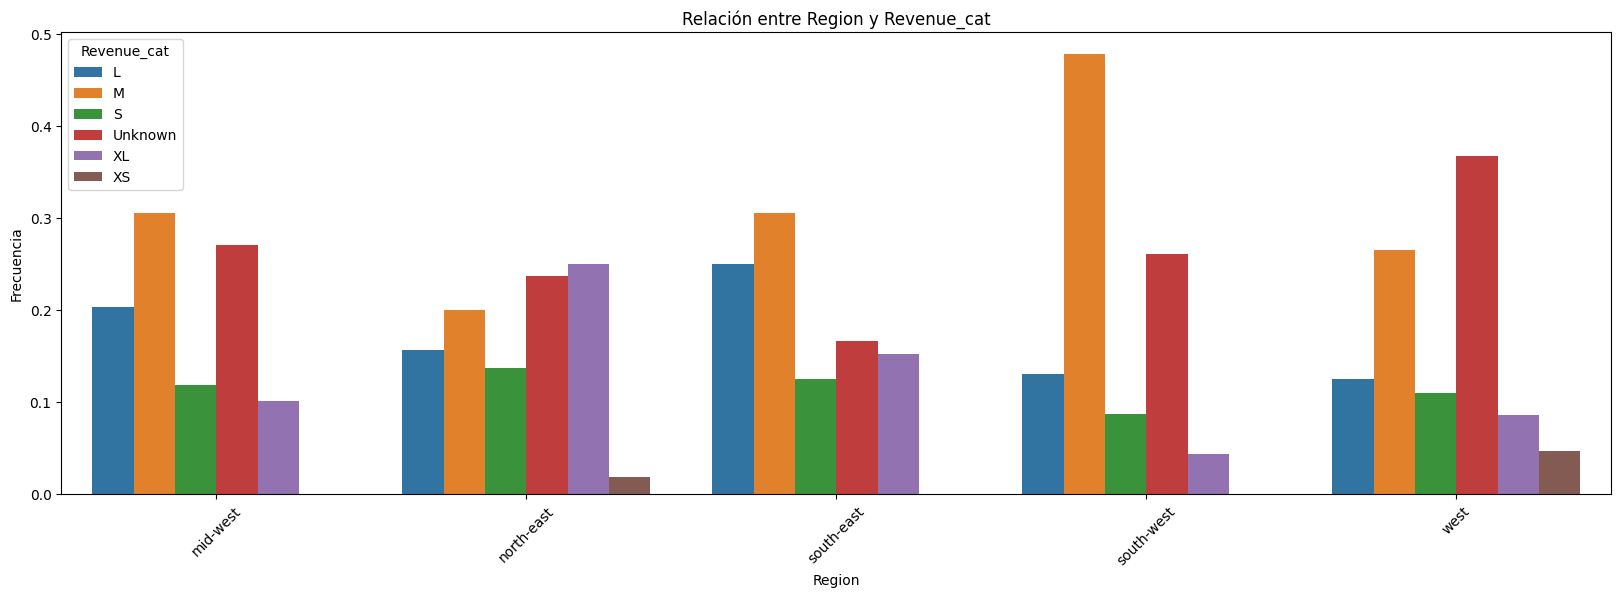

In [226]:
dpf.plot_categorical_relationship_fin(df_usa, cat_col1 = 'Region', cat_col2 = 'Revenue_cat', relative_freq = True, size_group = 10)

In [227]:
contingency_table = pd.crosstab(df_usa['Region'], df_usa['Revenue_cat'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 44.72733484883581
P-Value: 0.001201353436041094
Degrees of Freedom: 20
Expected Frequency Table:
 [[ 9.87782805 15.61764706  7.2081448  15.88461538  9.21040724  1.20135747]
 [26.78733032 42.35294118 19.54751131 43.07692308 24.97737557  3.25791855]
 [12.05429864 19.05882353  8.79638009 19.38461538 11.239819    1.46606335]
 [ 3.85067873  6.08823529  2.80995475  6.19230769  3.59049774  0.46832579]
 [21.42986425 33.88235294 15.63800905 34.46153846 19.98190045  2.60633484]]


<font color='yellow'>

- The graph shows that in all US regions, medium revenue ('M') companies have the highest frequency, while extra small revenue ('XS') companies have the lowest representation.

</font>

#### 2.2.3.3. Analysis according to rating

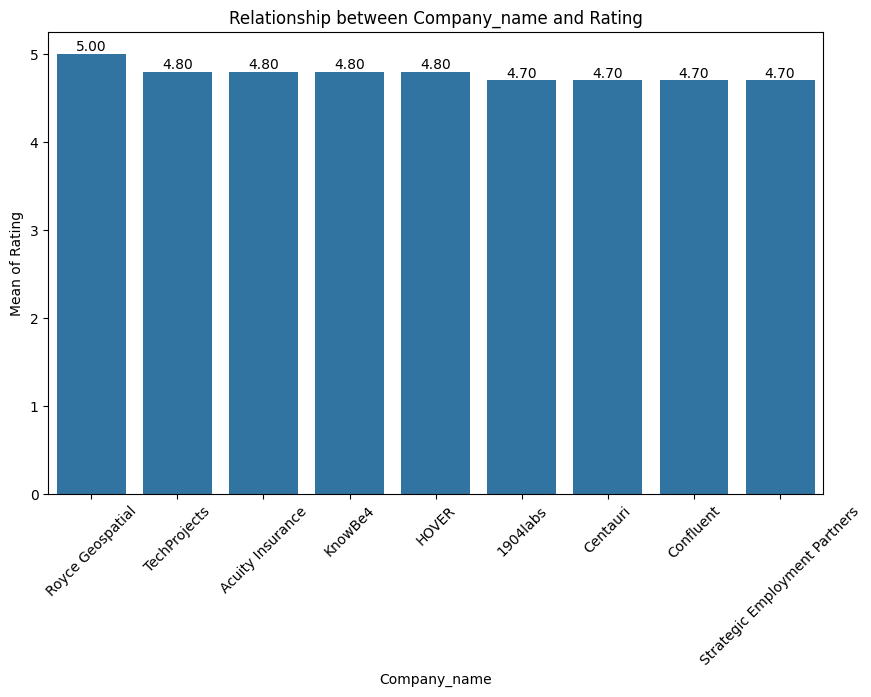

In [228]:
# Filter cat_col2 to include only the top 10 categories if more than 5 exist
usa_top_cat_col_values_loc = df_usa.sort_values(by = 'Rating', ascending = False).head(10)

dpf.plot_categorical_numerical_relationship(usa_top_cat_col_values_loc, categorical_col = 'Company_name', numerical_col = 'Rating', show_values = True)

In [229]:
royce_geospatial_rows = df_usa.loc[df_usa['Company_name'] == 'Royce Geospatial']
royce_geospatial_rows

Job_title  Rating      Company_name         Location   Headquarters  \
542  Data Scientist     5.0  Royce Geospatial  Springfield, VA  Arlington, VA   

    Founded               Sector  Average_salary     State      Region  \
542    2014  Aerospace & Defense        101000.0  Virginia  south-east   

    Size_cat               Job_category Revenue_cat  
542        S  Data Science and Research           S

<font color='yellow'>

- 'Royce Geospatial', stands out as the top-rated company with a perfect 5.0 rating. Founded in 2014, this Aerospace & Defense company offers an average salary of $101,000 for the position of Data Scientist in Virginia. Their excellent rating suggests high employee satisfaction and a positive reputation in the industry.

</font>

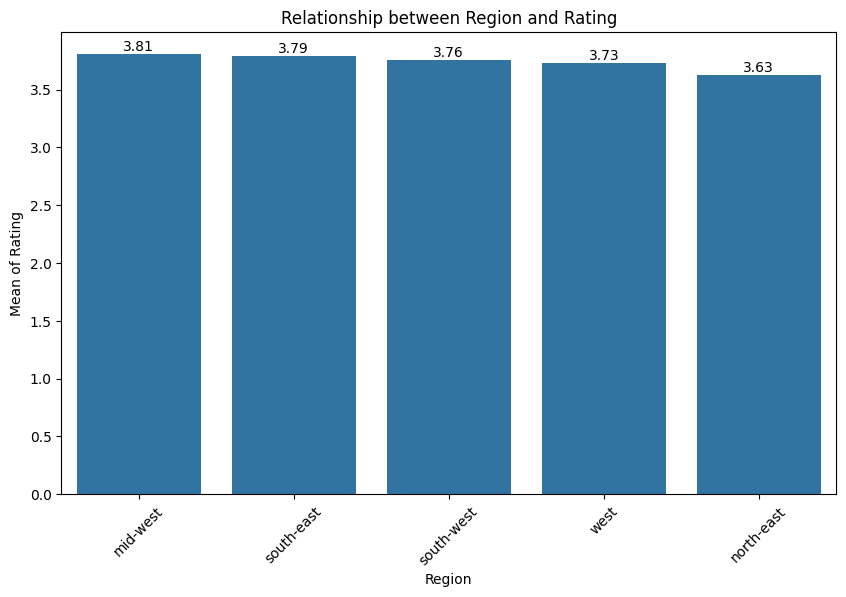

In [230]:
dpf.plot_categorical_numerical_relationship(df_usa, categorical_col = 'Region', numerical_col = 'Rating', show_values = True)

<font color='yellow'>

- The region with the best average rating is mid-west, with the north-east region in last place.

</font>

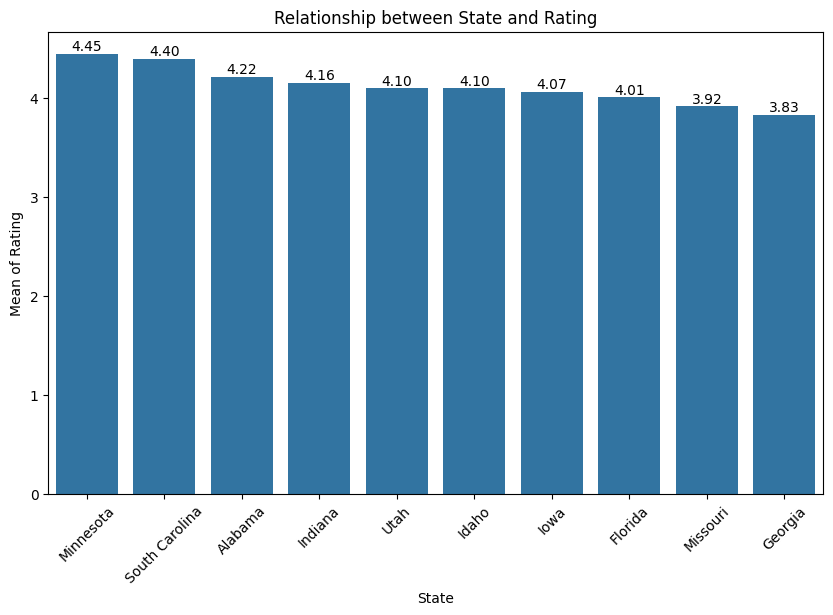

In [231]:
state_ratings = df_usa.groupby('State')['Rating'].mean().reset_index() # Calculate the average 'Rating' per state
top_10_states = state_ratings.sort_values(by = 'Rating', ascending = False).head(10) # Sort the states by average 'Rating' in descending order

dpf.plot_categorical_numerical_relationship(top_10_states, categorical_col = 'State', numerical_col = 'Rating', show_values = True)

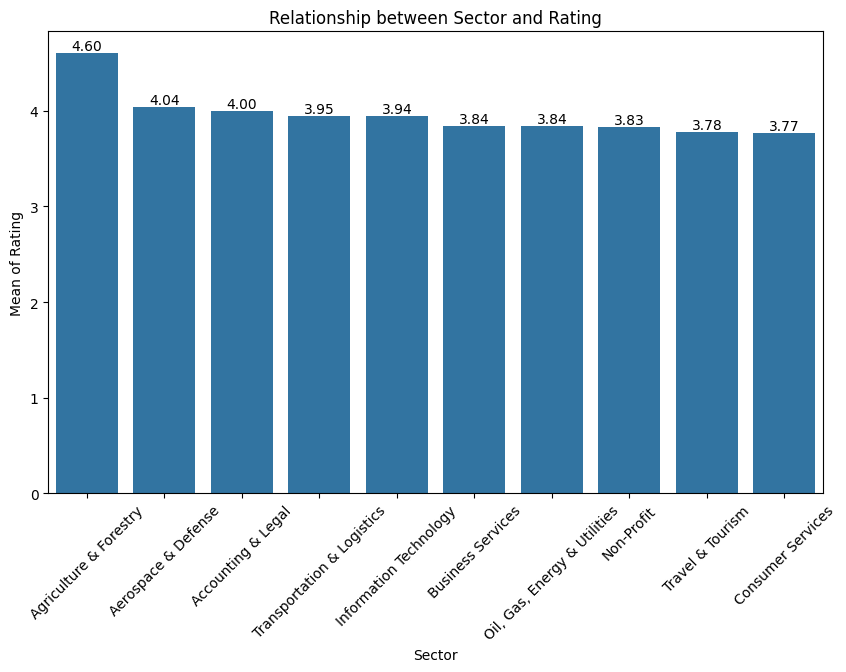

In [232]:
sector_ratings = df_usa.groupby('Sector')['Rating'].mean().reset_index() # Calculate the average 'Rating' per sector
top_10_sectors = sector_ratings.sort_values(by = 'Rating', ascending = False).head(10) # Sort the sectors by average 'Rating' in descending order

dpf.plot_categorical_numerical_relationship(top_10_sectors, categorical_col = 'Sector', numerical_col = 'Rating', show_values = True)

<font color='yellow'>

- The highest rated sector is 'Agriculture & Forestry', surprisingly not coinciding with the highest paid (in fact it is not even in the top 10 highest paid).

</font>

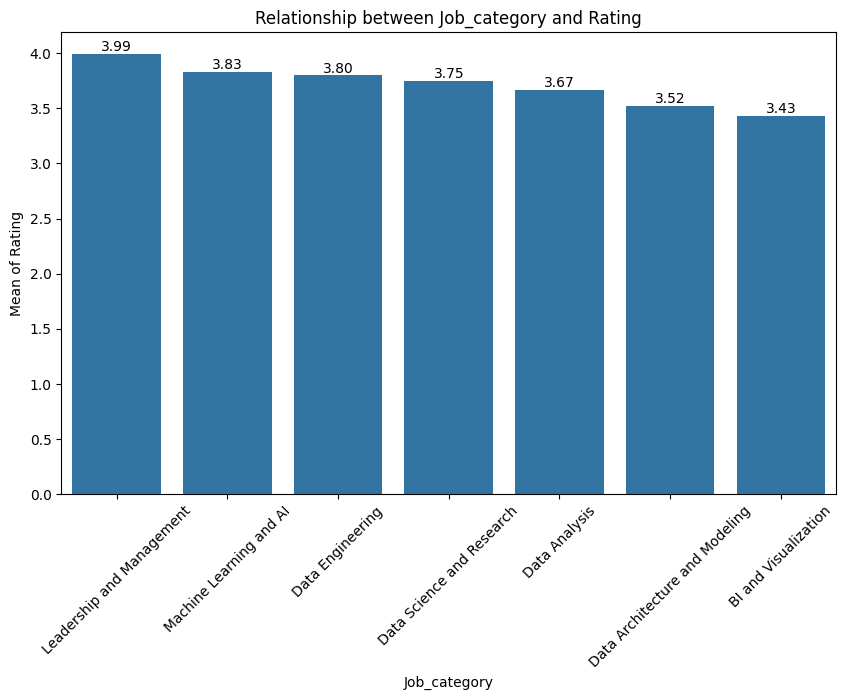

In [233]:
dpf.plot_categorical_numerical_relationship(df_usa, categorical_col = 'Job_category', numerical_col = 'Rating', show_values = True)

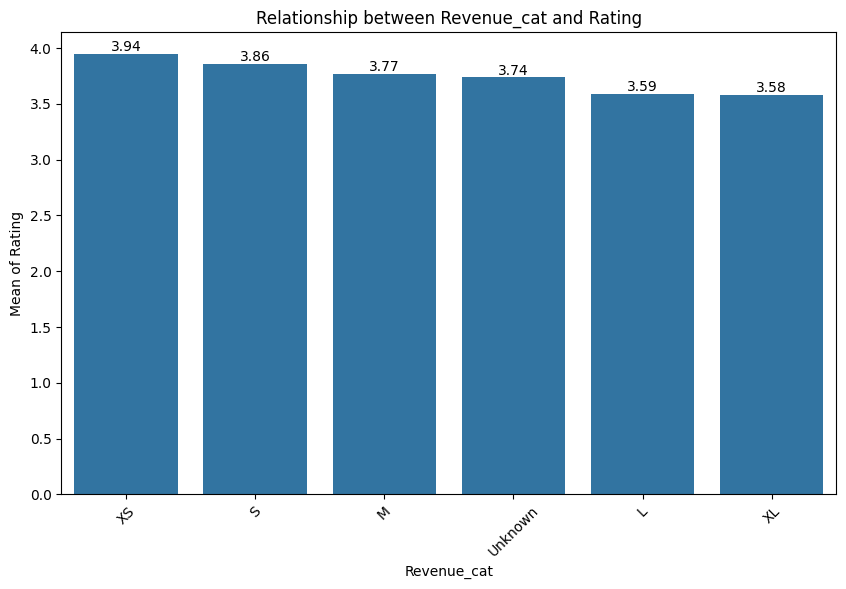

In [234]:
dpf.plot_categorical_numerical_relationship(df_usa, categorical_col = 'Revenue_cat', numerical_col = 'Rating', show_values = True)

<font color='yellow'>

- Top rated companies have the lowest annual profits.

</font>

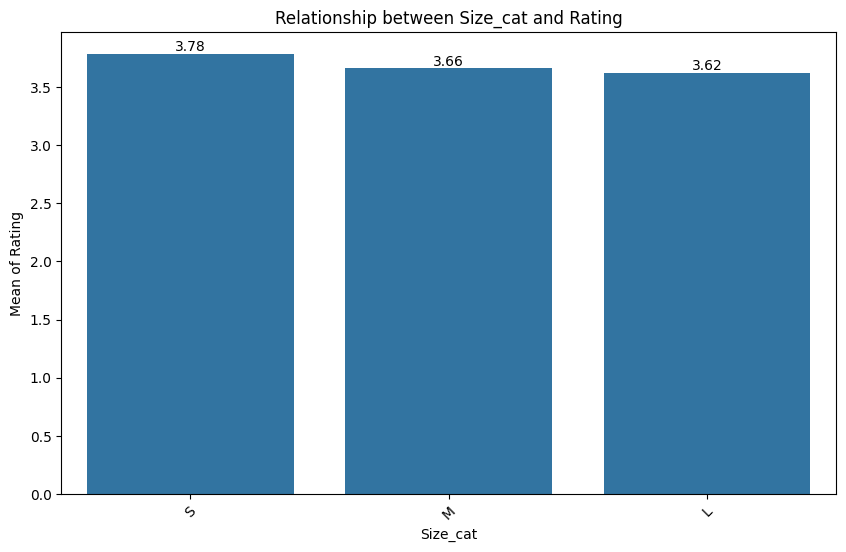

In [235]:
dpf.plot_categorical_numerical_relationship(df_usa, categorical_col = 'Size_cat', numerical_col = 'Rating', show_values = True)

<font color='yellow'>

- The highest rated companies are the smallest, which is consistent with the fact that they also have the lowest annual profits.

</font>

#### 2.2.3.4. Analysis between rating and the average salary

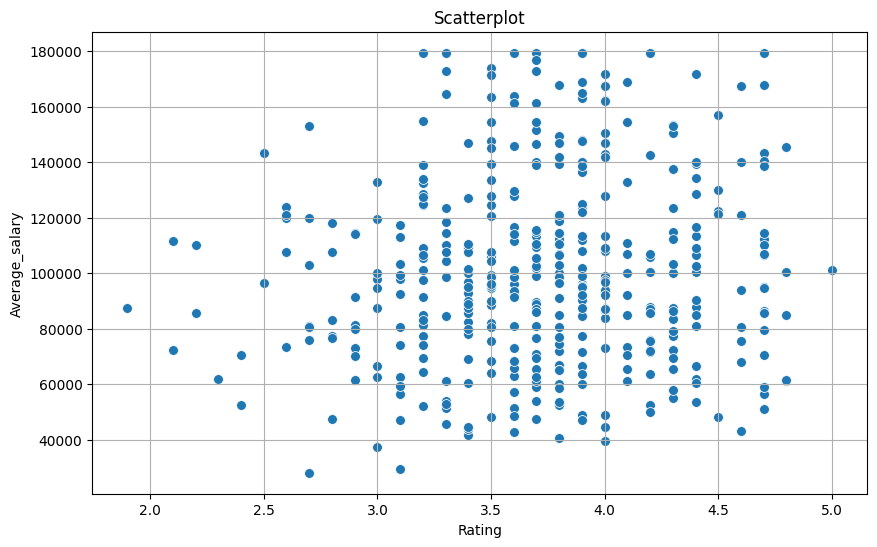

In [236]:
dpf.scatterplot_with_correlation(df_usa, column_x = 'Rating', column_y = 'Average_salary', show_correlation = False)

In [237]:
pearsonr(df_usa["Rating"], df_usa["Average_salary"], alternative= "less")

PearsonRResult(statistic=np.float64(0.08618571953142216), pvalue=np.float64(0.9648667953035408))

<font color='yellow'>

- The highest rated jobs do not correspond to the highest paid jobs. This suggests that employees also value other factors such as perhaps flexible working hours, growth options within the company, and so on.

</font>

## General conclusion

1. **US dominance in the job market**:   

The United States is the country with the highest number of job openings in the data science sector. The exponential growth in demand for these roles since 2020, combined with an overall high valuation of work in this field, underlines the prominence of the US as the top destination for data professionals. In particular, California emerges as the leading region, offering the highest salaries and highest concentration of job opportunities due to its proximity to Silicon Valley.

2. **Wages and job evaluation**:   

Although the salary range in the US for the data sector is between $80,000 and $120,000 per year, it is highlighted that in other countries, such as Israel and Qatar, salaries can be significantly higher. However, the US offers a good combination of high salaries and a positive assessment of the working environment. Jobs related to ‘Machine Learning and AI’ and ‘Data Science and Research’ have the highest salaries, reflecting the importance of these areas in the industry.

3. **Work mode and company size**:   

In the US, full-time, face-to-face work is predominant, while small companies (less than 200 employees) are the most in demand for these profiles. This pattern is repeated, indicating that, despite the increase in the supply of remote work, the preference is still for face-to-face roles. This contrasts with the international trend, where some countries offer greater flexibility in working arrangements.

4. **Regional and sectoral distribution**:   

California, and in particular cities such as San Francisco and Los Angeles, stand out as the most important locations in the US for the data science sector due to the high concentration of technology companies and job supply. The Western region of the US leads in terms of salaries and job opportunities. Although other countries such as Qatar and Israel have higher salaries, California remains preferable due to the combination of high demand, varied opportunities and competitive salaries.

5. **Job evaluation**:   

Despite high salaries, the most highly valued jobs do not always coincide with the best paid ones. In the US, the quality of the work environment and opportunities for growth are valued positively, although the work arrangements in the US are mostly on-site, while other countries may offer more flexibility.

## Final Conclusion:   

California emerges as the top region to work in data science and machine learning, combining high salaries, an abundant supply of jobs and a significant concentration of technology companies. While other countries may offer higher salaries, the combination of factors such as the quantity of vacancies, the quality of the work environment and the presence of major technology hubs **makes California the best place for data scientists and machine learning professionals**.